In [2]:
import numpy as np 
import pyGPs as gp 
import sklearn.metrics as mt
import matplotlib.pyplot as plt
import scipy as sp
import os
os.chdir("/Users/RayneHernandez1/Desktop/NextFlu") 
import pandas as pd 
from scipy import signal
from scipy.stats import norm
from sklearn import mixture
import statsmodels.tsa.arima_model as ar
import pyflux as pf

/Users/RayneHernandez1/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
data_17 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/ILINet_16-17.csv", header = 1)
data_16 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_15-16.csv", header = 1)
data_15 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_14-15.csv", header = 1)
data_14 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_13-14.csv", header = 1)
data_13 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_12-13.csv", header = 1)
data_12 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_11-12.csv", header = 1)
data_11 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_10-11.csv", header = 1)
data_10 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_9-10.csv", header = 1)
data_9 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_8-9.csv", header = 1)
data_8 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_7-8.csv", header = 1)

In [4]:
week_17 = data_17["WEEK"]
week_16 = data_16["WEEK"]
week_15 = data_15["WEEK"]
week_14 = data_14["WEEK"]
week_13 = data_13["WEEK"]
week_12 = data_12["WEEK"]
week_11 = data_11["WEEK"]
week_10 = data_10["WEEK"]
week_9 = data_9["WEEK"]
week_8 = data_8["WEEK"]

In [6]:
ILI_17 = data_17['% WEIGHTED ILI']
ILI_16 = data_16['% Weighted ILI ']
ILI_15 = data_15['% Weighted ILI ']
ILI_14 = data_14['% Weighted ILI ']
ILI_13 = data_13['% Weighted ILI ']
ILI_12 = data_12['% Weighted ILI ']
ILI_11 = data_11['% Weighted ILI ']
ILI_10 = data_10['% Weighted ILI ']
ILI_9 = data_9['% Weighted ILI ']
ILI_8 = data_8['% Weighted ILI ']
ILI = np.concatenate((ILI_8, ILI_9, ILI_10, ILI_11, ILI_12))

In [7]:
data_phyl = pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/USCanada_Effpop_1998-2012.csv", header = 0)


In [8]:
time_phyl = data_phyl["time"]
time_phyl = np.array(time_phyl)
effPop = data_phyl["effPop"]
effPop = np.array(effPop)

In [9]:
time_8 = np.concatenate((np.arange(start = 2007 + (1/52)*39, stop = 2007 + (1/52)*51, step = (1/52)), \
                         np.arange(start = 2008, stop = 2008 + (1/53)*38, step = (1/53))))
time_9 = np.concatenate((np.arange(start = 2008 + (1/53)*39, stop = 2008 + (1/53)*52, step = (1/53)), \
                         np.arange(start = 2009, stop = 2009 + (1/52)*33, step = (1/52))))
time_10 = np.concatenate((np.arange(start = 2009 + (1/52)*34, stop = 2009 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2010, stop = 2010 + (1/52)*38, step = (1/52))))
time_11 = np.concatenate((np.arange(start = 2010 + (1/52)*39, stop = 2010 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2011, stop = 2011 + (1/52)*38, step = (1/52))))
time_12 = np.concatenate((np.arange(start = 2011 + (1/52)*39, stop = 2011 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2012, stop = 2012 + (1/52)*38, step = (1/52))))
time_13 = np.concatenate((np.arange(start = 2012 + (1/52)*39, stop = 2012 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2013, stop = 2013 + (1/52)*38, step = (1/52))))
time_14 = np.concatenate((np.arange(start = 2013 + (1/52)*39, stop = 2013 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2014, stop = 2014 + (1/53)*38, step = (1/53))))
time_15 = np.concatenate((np.arange(start = 2014 + (1/53)*39, stop = 2014 + (1/53)*52, step = (1/53)), \
                          np.arange(start = 2015, stop = 2015 + (1/52)*38, step = (1/52))))
time_16 = np.concatenate((np.arange(start = 2015 + (1/52)*39, stop = 2015 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2016, stop = 2016 + (1/52)*38, step = (1/52))))
time = np.concatenate((time_8, time_9, time_10, time_11, time_12)) 

In [10]:
def SMReg(Q, D, x, y, x_test) :
    k = gp.Core.cov.SM(Q = Q, D = D)
    k.hyp = k.hyp.tolist()
    print(k.hyp)
    model = gp.Core.gp.GPR() 
    model.setPrior(kernel=k)
    model.setData(x, y) 
    model.getPosterior()
    model.setOptimizer("Minimize")
    model.optimize(x, y)
    ym, ys2, fm, fs2, lp = model.predict(x_test)
    #model.plot()
    print(k.hyp)
    print(model.nlZ)
    return model

In [11]:
#iterates GP regression 10 times and returns the model with the highest marginal likelihood 
def SMRegIter(Q, D, x, y, x_test) :
    k = gp.Core.cov.SM(Q = Q, D = D)
    k.hyp = k.hyp.tolist()
    model = gp.Core.gp.GPR() 
    model.setNoise( log_sigma = np.log(0.5) )
    model.setPrior(kernel=k)
    model.setData(x, y) 
    model.getPosterior()
    model.setOptimizer("Minimize")
    model.optimize(x, y)
    ym, ys2, fm, fs2, lp = model.predict(x_test)
    #model.plot()
    lik = model.nlZ
    ret_mod = model
    #for i in range(0, 5) :
        #k = gp.Core.cov.SM(Q = Q, D = D)
        #k.hyp = k.hyp.tolist()
        #model = gp.Core.gp.GPR() 
        #model.setPrior(kernel=k)
        #model.setData(x, y) 
        #model.getPosterior()
        #model.setOptimizer("Minimize")
        #model.optimize(x, y)
        #ym, ys2, fm, fs2, lp = model.predict(x_test)
        #if (model.nlZ < lik) :
        #    ret_mod = model
    return ret_mod

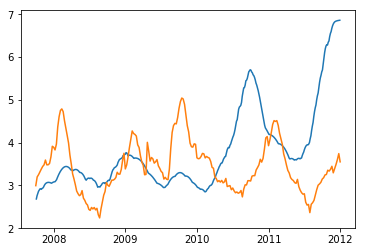

In [12]:
time_phyl_range = time_phyl[np.logical_and(time_phyl >= 2007.75, time_phyl <= 2012)]
effPop_range = effPop[np.logical_and(time_phyl >= 2007.75, time_phyl <= 2012)]

time_range = time[np.logical_and(time >= 2007.75, time <= 2012)]
ILI_range = 3 + np.log(ILI[np.logical_and(time >= 2007.75, time <= 2012)])

plt.plot(time_phyl_range, effPop_range)
plt.plot(time_range, ILI_range)
plt.show()

In [13]:
y_ILI = ILI_range
test_indices = np.argwhere(np.logical_and(time_range >= (2010 + (1/52)*39), time_range <= 2011 + (1/52)*38))
train_indices = np.argwhere(time_range <= (2010 + (1/52)*38))
x_train = time_range[train_indices]
y_train = y_ILI[train_indices]
x_test = time_range[test_indices]
y_test = y_ILI[test_indices]

In [14]:
trend_data = pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/correlate-CDC_ILI.csv", header = 0)

In [15]:
word_1 = np.array(trend_data.iloc[195:418,2])
word_2 = np.array(trend_data.iloc[195:418,3])
word_3 = np.array(trend_data.iloc[195:418,4])
word_4 = np.array(trend_data.iloc[195:418,5])
word_5 = np.array(trend_data.iloc[195:418,6])
word_6 = np.array(trend_data.iloc[195:418,7])
word_7 = np.array(trend_data.iloc[195:418,8])
word_8 = np.array(trend_data.iloc[195:418,9])
word_9 = np.array(trend_data.iloc[195:418,10])
word_10 = np.array(trend_data.iloc[195:418,11])
word_11 = np.array(trend_data.iloc[195:418,12])
word_12 = np.array(trend_data.iloc[195:418,13])
word_13 = np.array(trend_data.iloc[195:418,14])
word_14 = np.array(trend_data.iloc[195:418,15])
word_15 = np.array(trend_data.iloc[195:418,16])
word_16 = np.array(trend_data.iloc[195:418,17])
word_17 = np.array(trend_data.iloc[195:418,18])
word_18 = np.array(trend_data.iloc[195:418,19])

In [16]:
word_1_train = word_1[train_indices]
word_2_train = word_2[train_indices]
word_3_train = word_3[train_indices]
word_4_train = word_4[train_indices]
word_5_train = word_5[train_indices]
word_6_train = word_6[train_indices]
word_7_train = word_7[train_indices]
word_8_train = word_8[train_indices]
word_9_train = word_9[train_indices]
word_10_train = word_10[train_indices]
word_11_train = word_11[train_indices]
word_12_train = word_12[train_indices]
word_13_train = word_13[train_indices]
word_14_train = word_14[train_indices]
word_15_train = word_15[train_indices]
word_16_train = word_16[train_indices]
word_17_train = word_17[train_indices]
word_18_train = word_18[train_indices]

word_1_test = word_1[test_indices]
word_2_test = word_2[test_indices]
word_3_test = word_3[test_indices]
word_4_test = word_4[test_indices]
word_5_test = word_5[test_indices]
word_6_test = word_6[test_indices]
word_7_test = word_7[test_indices]
word_8_test = word_8[test_indices]
word_9_test = word_9[test_indices]
word_10_test = word_10[test_indices]
word_11_test = word_11[test_indices]
word_12_test = word_12[test_indices]
word_13_test = word_13[test_indices]
word_14_test = word_14[test_indices]
word_15_test = word_15[test_indices]
word_16_test = word_16[test_indices]
word_17_test = word_17[test_indices]
word_18_test = word_18[test_indices]

In [17]:
def SMRoll(x_train, y_train, x_test, y_test): 
    x_train_curr = x_train.reshape(x_train.size)
    x_train_curr = x_train_curr[0:-3]
    y_train_curr = y_train.reshape(y_train.size)
    y_train_curr = y_train_curr[0:-3]
    x_test_curr = x_test.reshape(x_test.size) 
    x_test_curr = np.concatenate((x_train_curr[-3:], x_test_curr))
    y_test_curr = y_test.reshape(y_test.size)
    y_test_curr = np.concatenate((y_train_curr[-3:], y_test_curr))
    model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:4])
    #plt.plot(x_test_curr, y_test_curr)
    #plt.scatter(x_test_curr[0:4], model.ym)
    #plt.show()
    results_gp = np.array(model.ym.reshape(1, model.ym.size))
    for i in range(1, y_test.size) :
        x_train_curr = np.append(x_train_curr, x_test_curr[0])
        x_train_curr = x_train_curr[-200:]
        x_test_curr = x_test_curr[1:]
        y_train_curr = np.append(y_train_curr, y_test_curr[0])
        y_train_curr = y_train_curr[-200:]
        y_test_curr = y_test_curr[1:]
        while True:
            try: 
                model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:4])
                break
            except: 
                pass
        #plt.plot(x_test_curr, y_test_curr)
        #plt.scatter(x_test_curr[0:4], model.ym)
        #plt.show()
        results_gp = np.vstack((results_gp, model.ym.reshape(1, model.ym.size))) 

    x_train_curr = np.append(x_train_curr, x_test_curr[0])
    x_train_curr = x_train_curr[-200:]
    x_test_curr = x_test_curr[1:]
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    while True:
        try: 
            model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:3])
            break
        except: 
            pass
    results_gp = np.vstack((results_gp, np.append(model.ym.reshape(1, model.ym.size), 0)))

    x_train_curr = np.append(x_train_curr, x_test_curr[0])
    x_train_curr = x_train_curr[-200:]
    x_test_curr = x_test_curr[1:]
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    while True:
        try: 
            model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:2])
            break
        except: 
            pass
    results_gp = np.vstack((results_gp, np.append(model.ym.reshape(1, model.ym.size), np.array([0, 0]))))

    x_train_curr = np.append(x_train_curr, x_test_curr[0])
    x_train_curr = x_train_curr[-200:]
    x_test_curr = x_test_curr[1:]
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    while True:
        try: 
            model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:1])
            break
        except: 
            pass
    results_gp = np.vstack((results_gp, np.append(model.ym.reshape(1, model.ym.size), np.array([0, 0, 0]))))
    return results_gp 

In [18]:
def plotGraphs(label, results_gp):
    plt.subplot(2, 2, 1)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC ILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[3:,0] - 3), label = label, color = "red")
    plt.title("0 Week Forecast")
    plt.legend(loc='upper left')

    plt.subplot(2, 2, 2)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[2:-1,1] - 3), label = label, color = "red")
    plt.title("1 Week Forecast")
    plt.legend(loc='upper left')

    plt.subplot(2, 2, 3)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[1:-2,2] - 3), label = label, color = "red")
    plt.title("2 Week Forecast")
    plt.legend(loc='upper left')

    plt.subplot(2, 2, 4)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[0:-3,3] - 3), label = label, color = "red")
    plt.title("3 Week Forecast")
    plt.legend(loc='upper left')

    plt.show()
    plt.figure(figsize = (16, 12))


    correlation_gp = np.array([np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[3:,0] - 3))[0][1], 
                           np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[2:-1,1] - 3))[0][1],
                           np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[1:-2,2] - 3))[0][1],
                           np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[0:-3,3] - 3))[0][1]])
    rmse_gp = np.sqrt(np.array([mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[3:,0] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[2:-1,1] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[1:-2,2] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[0:-3,3] - 3))]))
    mse_gp = np.array([mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[3:,0] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[2:-1,1] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[1:-2,2] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[0:-3,3] - 3))])
    mae_gp = np.array([mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[3:,0] - 3)),
                     mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[2:-1,1] - 3)),
                     mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[1:-2,2] - 3)),
                     mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[0:-3,3] - 3))])

    d_gp = {"Correlation": correlation_gp, "RMSE": rmse_gp, "MSE": mse_gp, "MAE": mae_gp}
    df_gp = pd.DataFrame(data=d_gp, index = ["0 wk", "1 wk", "2 wk", "3 wk"])
    print(df_gp)

Number of line searches 40


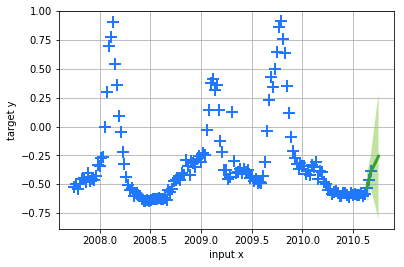

Number of line searches 40


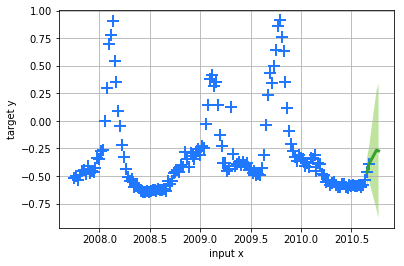

Number of line searches 40


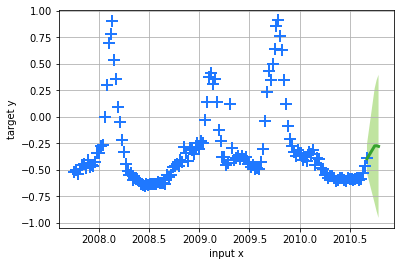

Number of line searches 40


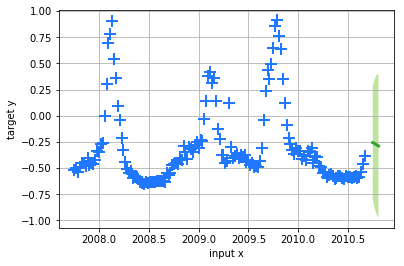

Number of line searches 40


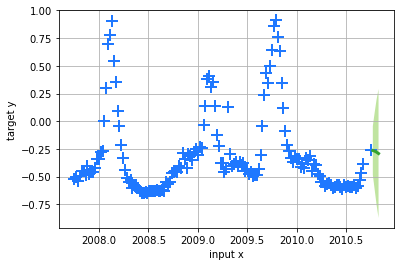

Number of line searches 40


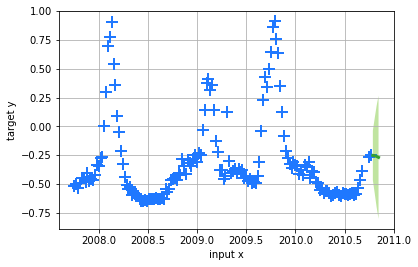

Number of line searches 40


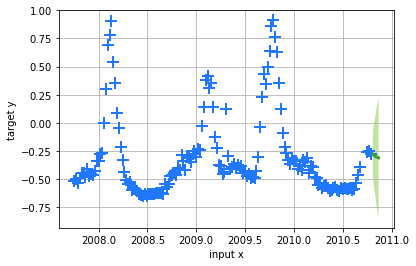

Number of line searches 40


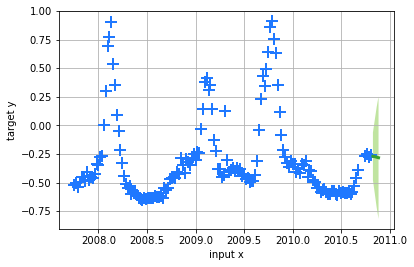

Number of line searches 40


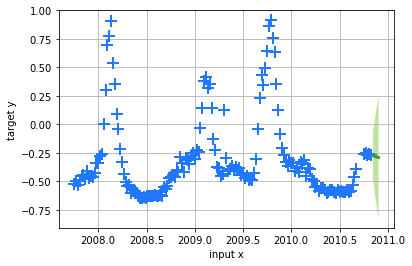

Number of line searches 40


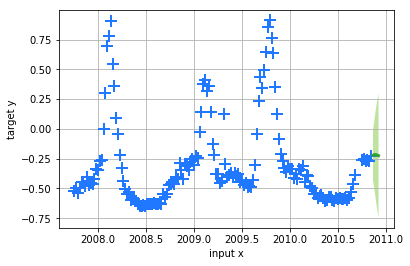

Number of line searches 40


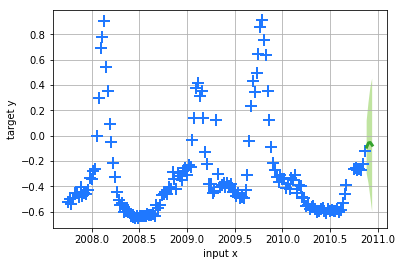

Number of line searches 40


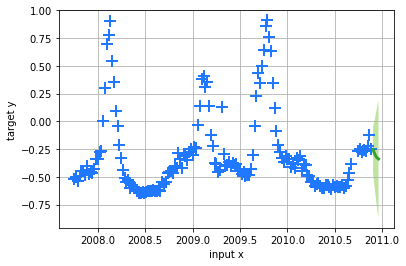

Number of line searches 40


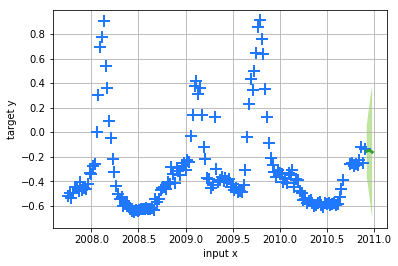

Number of line searches 40


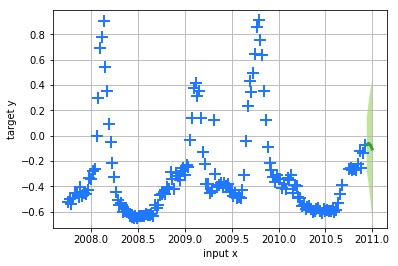

Number of line searches 40


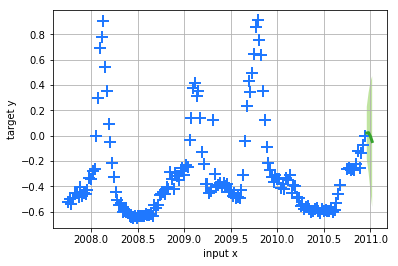

Number of line searches 40


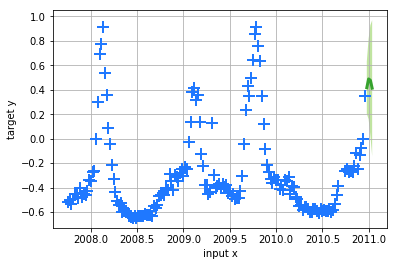

Number of line searches 40


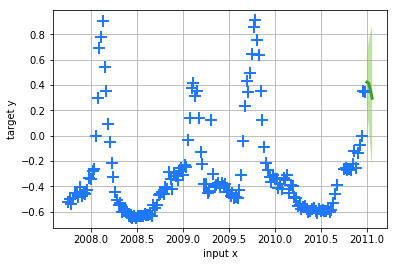

Number of line searches 40


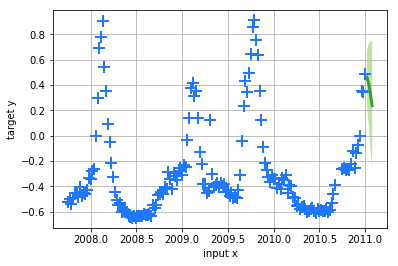

Number of line searches 40


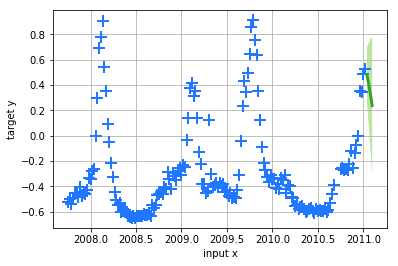

Number of line searches 40


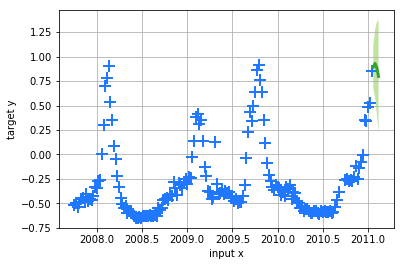

Number of line searches 40


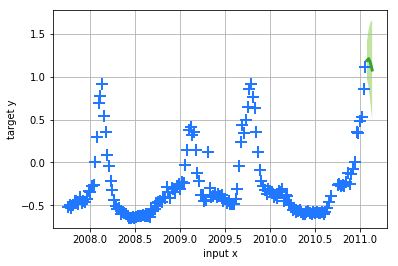

Number of line searches 40


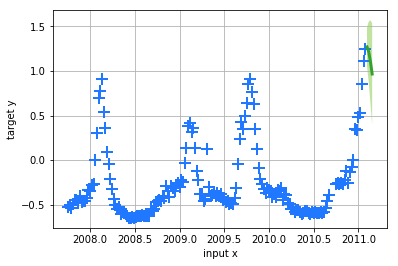

Number of line searches 40


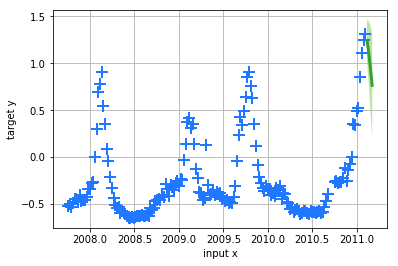

Number of line searches 40


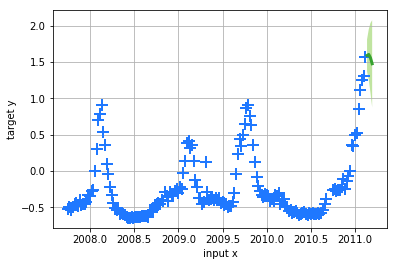

Number of line searches 40


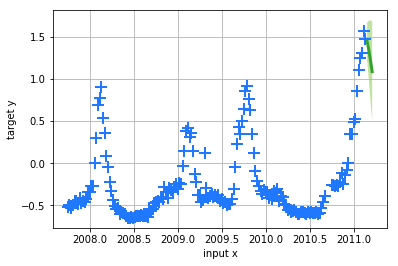

Number of line searches 40


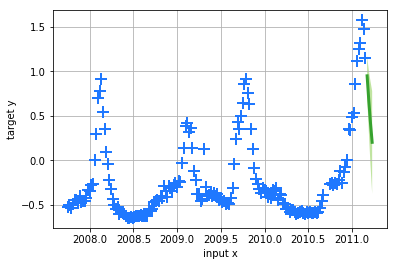

Number of line searches 40


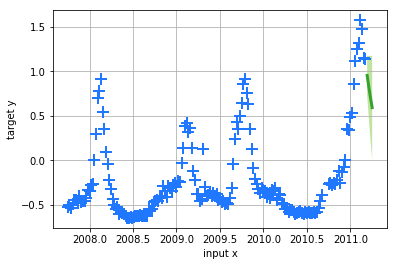

Number of line searches 40


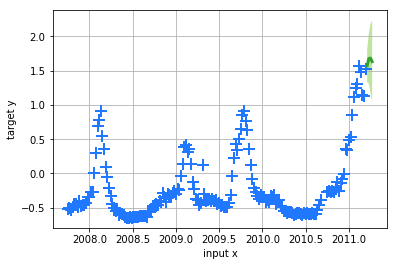

Number of line searches 40


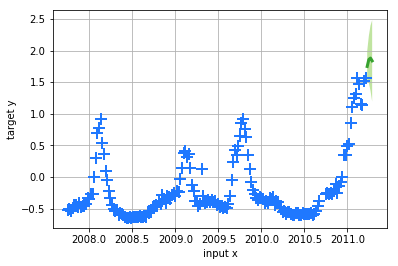

Number of line searches 40


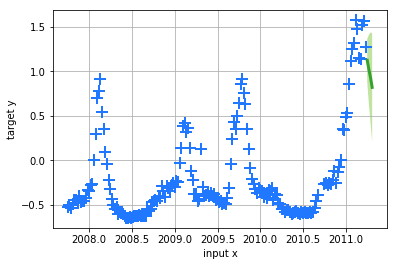

Number of line searches 40


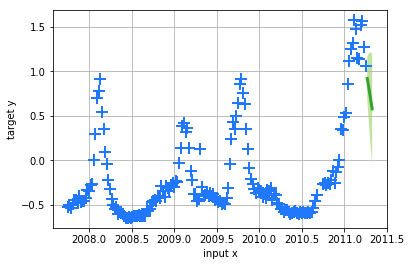

Number of line searches 40


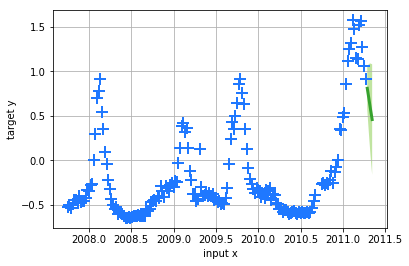

Number of line searches 40


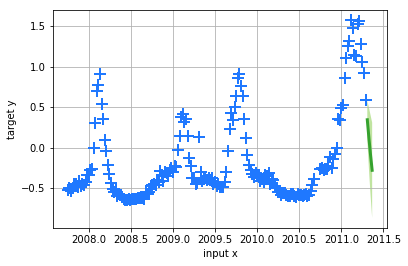

Number of line searches 40


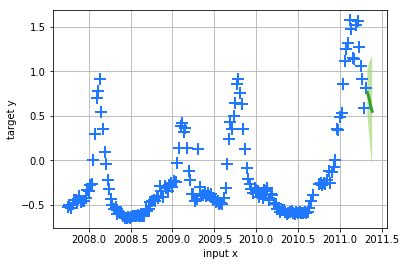

Number of line searches 40


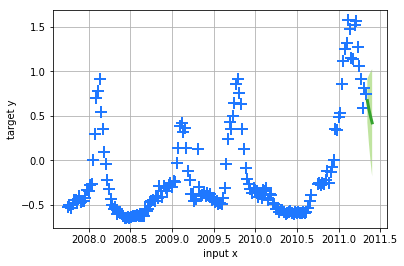

adding jitter of 5.2279162842e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2279162842e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2279162842e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2279162842e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2279162842e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0848696279e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0848696279e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0848696279e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0848696279e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0848696279e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9341611279e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9341611279e+11 to diagnol of kernel

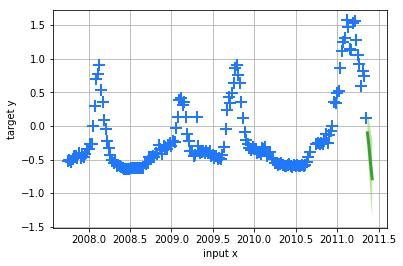

adding jitter of 7.1689579899e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 7.1689579899e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.1689579899e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.1689579899e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.1689579899e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4847862145e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4847862145e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4847862145e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4847862145e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4847862145e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2716307323e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2716307323e+08 to diagnol of kernel

adding jitter of 4.0860550672e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0860550672e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0860550672e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0860550672e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2456300591e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2456300591e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2456300591e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2456300591e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2456300591e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2255982522e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2255982522e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2255982522e+09 to diagnol of kernel

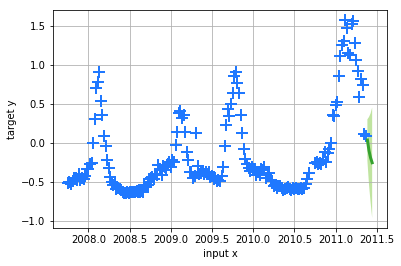

Number of line searches 40


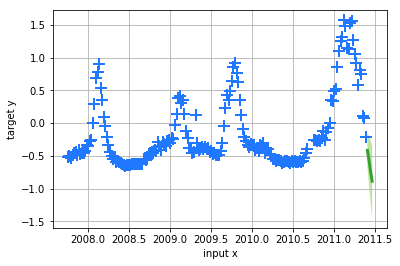

adding jitter of 2.0197106980e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0197106980e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0197106980e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0197106980e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0197106980e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 6.7329404345e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 6.7329404345e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 6.7329404345e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 6.7329404345e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 6.7329404345e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1101964190e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1101964190e+10 to diagnol of kernel

adding jitter of 6.3486031052e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3486031052e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3486031052e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3486031052e+13 to diagnol of kernel matrix for numerical stability
Number of line searches 40


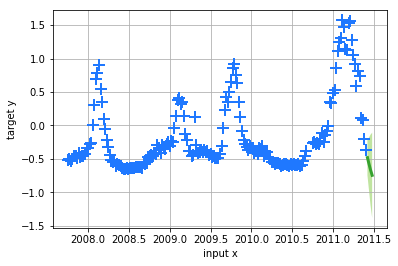

Number of line searches 40


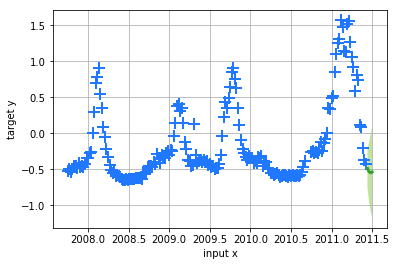

adding jitter of 1.5358412802e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5358412802e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5358412802e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5358412802e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5358412802e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8924524761e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8924524761e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8924524761e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8924524761e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8924524761e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0584255088e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0584255088e+08 to diagnol of kernel

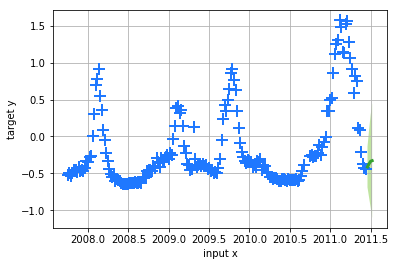

Number of line searches 40


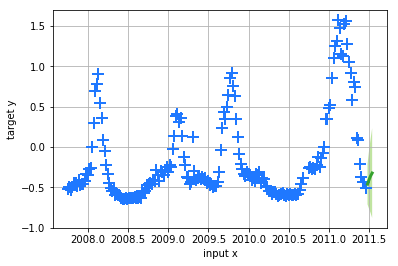

Number of line searches 40


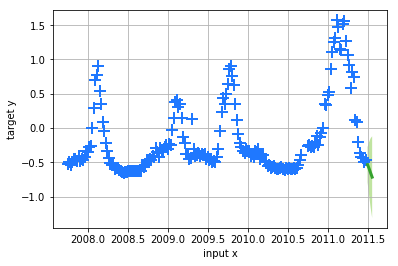

Number of line searches 40


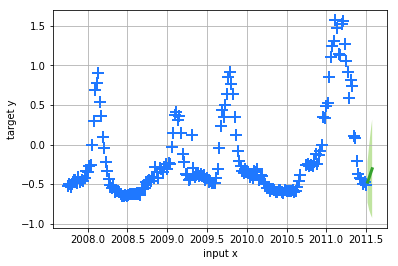

Number of line searches 40


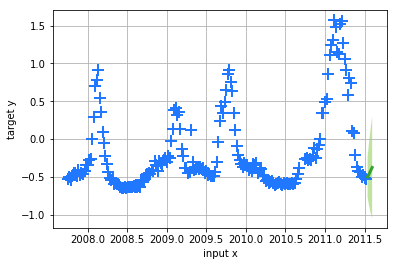

Number of line searches 40


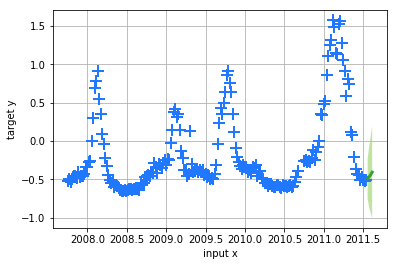

Number of line searches 40


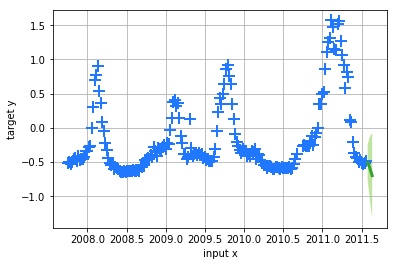

Number of line searches 40


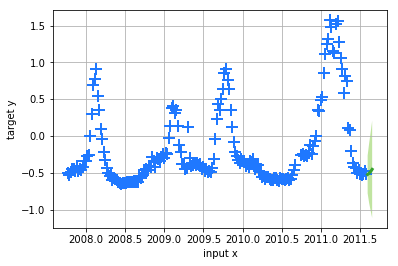

Number of line searches 40


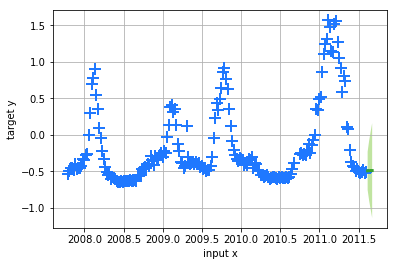

adding jitter of 2.7768634941e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7768634941e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7768634941e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7768634941e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7768634941e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9213342665e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9213342665e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9213342665e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9213342665e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9213342665e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4772094814e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4772094814e+09 to diagnol of kernel

adding jitter of 1.0539095057e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0539095057e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0539095057e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0539095057e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0371090492e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0371090492e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0371090492e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0371090492e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0371090492e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0288095341e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0288095341e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0288095341e+09 to diagnol of kernel

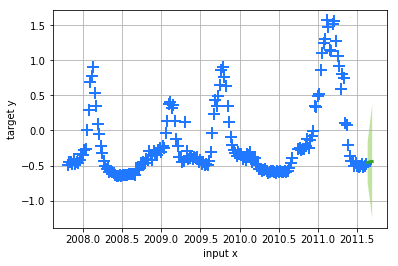

Number of line searches 40


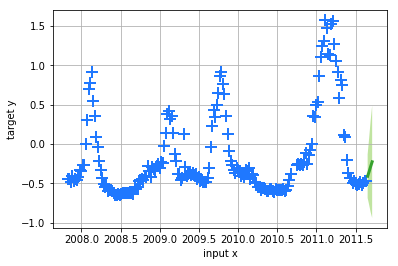

Number of line searches 40


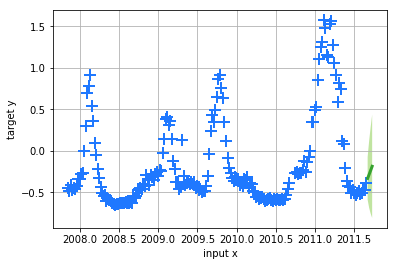

Number of line searches 40


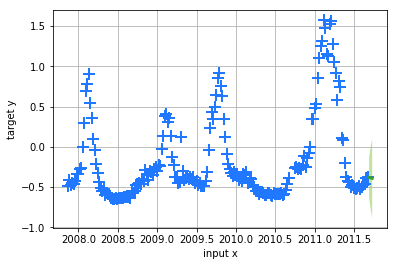

Number of line searches 40


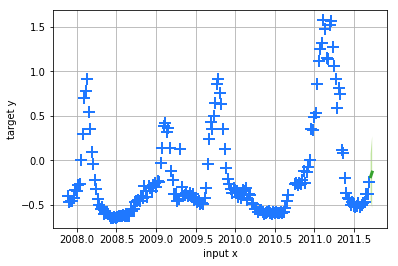

Number of line searches 40


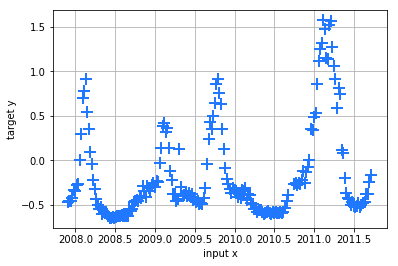

In [84]:
results_1 = SMRoll(x_train, word_1_train, x_test, word_1_test)

In [74]:
results_2 = SMRoll(x_train, word_2_train, x_test, word_2_test)
results_3 = SMRoll(x_train, word_3_train, x_test, word_3_test)
results_4 = SMRoll(x_train, word_4_train, x_test, word_4_test)
results_5 = SMRoll(x_train, word_5_train, x_test, word_5_test)


Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
adding jitter of 1.1308076050e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1308076050e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1308076050e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1308076050e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1308076050e+17 to diagnol of kernel matrix for numerical stability
Num

adding jitter of 2.4297694414e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4297694414e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4297694414e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7616486305e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7616486305e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7616486305e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7616486305e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7616486305e+10 to diagnol of kernel matrix for numerical stability
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
adding jitter o

adding jitter of 1.1817605335e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1817605335e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1817605335e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1817605335e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1817605335e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0166144579e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0166144579e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0166144579e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0166144579e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0166144579e+11 to diagnol of kernel matrix for numerical stability
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Numbe

In [128]:
results_6 = SMRoll(x_train, word_6_train, x_test, word_6_test)
results_7 = SMRoll(x_train, word_7_train, x_test, word_7_test)
results_8 = SMRoll(x_train, word_8_train, x_test, word_8_test)
results_9 = SMRoll(x_train, word_9_train, x_test, word_9_test)
results_10 = SMRoll(x_train, word_10_train, x_test, word_10_test)
results_11 = SMRoll(x_train, word_11_train, x_test, word_11_test)
results_12 = SMRoll(x_train, word_12_train, x_test, word_12_test)
results_13 = SMRoll(x_train, word_13_train, x_test, word_13_test)
results_14 = SMRoll(x_train, word_14_train, x_test, word_14_test)
results_15 = SMRoll(x_train, word_15_train, x_test, word_15_test)
results_16 = SMRoll(x_train, word_16_train, x_test, word_16_test)
results_17 = SMRoll(x_train, word_17_train, x_test, word_17_test)
results_18 = SMRoll(x_train, word_18_train, x_test, word_18_test)

Number of line searches 40
Number of line searches 40
Number of line searches 40
adding jitter of 6.4621625871e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4621625871e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4621625871e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4621625871e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4621625871e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.3412910681e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.3412910681e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.3412910681e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.3412910681e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.3412910681e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9239351502e+07 to diagnol of kernel matr

adding jitter of 3.1370551820e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1370551820e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1370551820e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1370551820e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1370551820e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0119657816e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0119657816e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0119657816e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0119657816e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0119657816e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9513308019e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9513308019e+08 to diagnol of kernel

adding jitter of 2.8919343361e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8919343361e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8919343361e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8919343361e+11 to diagnol of kernel matrix for numerical stability
Number of line searches 37
adding jitter of 7.2756961435e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2756961435e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2756961435e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2756961435e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2756961435e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1233009469e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1233009469e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.12330094

adding jitter of 7.5272303218e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5272303218e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5272303218e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5272303218e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5786406872e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5786406872e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5786406872e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5786406872e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5786406872e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3879365876e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3879365876e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3879365876e+10 to diagnol of kernel

adding jitter of 1.1623469482e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1623469482e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1623469482e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1623469482e+21 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2682214707e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2682214707e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2682214707e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2682214707e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2682214707e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 8.5011560936e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.5011560936e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.5011560936e+12 to diagnol of kernel

adding jitter of 5.9301028778e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9301028778e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9301028778e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9301028778e+10 to diagnol of kernel matrix for numerical stability
Number of line searches 37
adding jitter of 2.0605117024e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0605117024e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0605117024e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0605117024e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0605117024e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1607067538e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1607067538e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.16070675

adding jitter of 3.7499806536e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7499806536e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7499806536e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7499806536e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7434955250e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7434955250e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7434955250e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7434955250e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7434955250e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7405814915e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7405814915e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7405814915e+09 to diagnol of kernel

adding jitter of 4.6701642150e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6701642150e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6701642150e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6701642150e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3034186437e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3034186437e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3034186437e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3034186437e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3034186437e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9018332760e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9018332760e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9018332760e+11 to diagnol of kernel

adding jitter of 5.5377608825e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5377608825e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5377608825e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2242490956e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2242490956e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2242490956e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2242490956e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2242490956e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4578270554e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4578270554e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4578270554e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4578270554e+10 to diagnol of kernel

adding jitter of 1.3501544716e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3501544716e+21 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5214079254e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5214079254e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5214079254e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5214079254e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5214079254e+11 to diagnol of kernel matrix for numerical stability
Number of line searches 40
adding jitter of 5.0399224552e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.0399224552e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.0399224552e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.0399224552e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.03992245

adding jitter of 1.3418746847e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3418746847e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3417626487e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3417626487e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3417626487e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3417626487e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3417626487e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3418186655e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3418186655e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3418186655e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3418186655e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3418186655e+11 to diagnol of kernel

adding jitter of 8.4935113057e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4935113057e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4922578059e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4922578059e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4922578059e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4922578059e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4922578059e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4916311429e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4916311429e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4916311429e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4916311429e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4916311429e+11 to diagnol of kernel

adding jitter of 1.0414736839e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0414736839e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1113333792e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1113333792e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1113333792e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1113333792e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1113333792e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1951241405e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1951241405e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1951241405e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1951241405e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1951241405e+12 to diagnol of kernel

adding jitter of 8.5780579425e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3585545328e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3585545328e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3585545328e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3585545328e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3585545328e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1418460467e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1418460467e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1418460467e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1418460467e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1418460467e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5886117146e+09 to diagnol of kernel

adding jitter of 1.1516674490e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1516674490e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1516674490e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1516674490e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1516674490e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.4680135576e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 7.4680135576e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.4680135576e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.4680135576e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.4680135576e+10 to diagnol of kernel matrix for numerical stability
Number of line searches 40
Number of line searches 40
adding jitter of 4.6866052157e+07 to diagnol of kernel matrix for numerical stability


adding jitter of 1.1458591704e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1458591704e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1458591704e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1458591704e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1458591704e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1695587696e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1695587696e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1695587696e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1695587696e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1695587696e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5569261682e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5569261682e+08 to diagnol of kernel

adding jitter of 1.8254322471e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8254322471e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8254322471e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8254322471e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0638750184e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0638750184e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0638750184e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0638750184e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0638750184e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7108715552e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7108715552e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7108715552e+09 to diagnol of kernel

adding jitter of 1.5750230837e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5750230837e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5750230837e+21 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5919181381e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5919181381e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5919181381e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5919181381e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5919181381e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2602060511e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2602060511e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2602060511e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2602060511e+10 to diagnol of kernel

adding jitter of 1.1898616146e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1898616146e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1898282082e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1898282082e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1898282082e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1898282082e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1898282082e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1897964730e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1897964730e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1897964730e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1897964730e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1897964730e+12 to diagnol of kernel

adding jitter of 2.4110441675e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4110441675e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4109377649e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4109377649e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4109377649e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4109377649e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4109377649e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4108863978e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4108863978e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4108863978e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4108863978e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4108863978e+11 to diagnol of kernel

adding jitter of 1.5101291254e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5101291254e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0667169909e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0667169909e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0667169909e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0667169909e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0667169909e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0519896155e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0519896155e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0519896155e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0519896155e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0519896155e+12 to diagnol of kernel

adding jitter of 1.1177492931e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0887409966e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0887409966e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0887409966e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0887409966e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0887409966e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3236986971e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3236986971e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3236986971e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3236986971e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3236986971e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4407304838e+08 to diagnol of kernel

adding jitter of 4.1370678364e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1370678364e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1370678364e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1370678364e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1370678364e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1354435990e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1354435990e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1354435990e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1354435990e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1354435990e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1346317203e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1346317203e+08 to diagnol of kernel

adding jitter of 1.7057551509e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7057551509e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7057551509e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7057551509e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0456657266e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0456657266e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0456657266e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0456657266e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0456657266e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1841543233e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1841543233e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1841543233e+10 to diagnol of kernel

adding jitter of 7.8585205794e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8585205794e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8585205794e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8585205794e+11 to diagnol of kernel matrix for numerical stability
Number of line searches 40
adding jitter of 2.0077904676e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0077904676e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0077904676e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0077904676e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0077904676e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0774258863e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0774258863e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.07742588

adding jitter of 6.5561962334e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5561962334e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5561962334e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5561962334e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5550038150e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5550038150e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5550038150e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5550038150e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5550038150e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5538714993e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5538714993e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5538714993e+09 to diagnol of kernel

adding jitter of 1.6020369348e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6020369348e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6020369348e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6862690178e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6862690178e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6862690178e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6862690178e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6862690178e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4705214448e+22 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4705214448e+23 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4705214448e+24 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4705214448e+25 to diagnol of kernel

adding jitter of 1.5277910353e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5277910353e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7212932325e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7212932325e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7212932325e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7212932325e+21 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7212932325e+22 to diagnol of kernel matrix for numerical stability
adding jitter of 5.3899563531e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.3899563531e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 5.3899563531e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 5.3899563531e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 5.3899563531e+16 to diagnol of kernel

adding jitter of 4.1632152074e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1632152074e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9116168859e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9116168859e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9116168859e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9116168859e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9116168859e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2262212112e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2262212112e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2262212112e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2262212112e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2262212112e+11 to diagnol of kernel

adding jitter of 1.9667728925e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9667728925e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1066250737e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1066250737e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1066250737e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1066250737e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1066250737e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0165660147e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0165660147e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0165660147e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0165660147e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0165660147e+12 to diagnol of kernel

adding jitter of 4.4907603357e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4905881995e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4905881995e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4905881995e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4905881995e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4905881995e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4904246762e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4904246762e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4904246762e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4904246762e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4904246762e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4056001426e+10 to diagnol of kernel

adding jitter of 1.2427596382e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2427596382e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2427596382e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2427596382e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2427596382e+11 to diagnol of kernel matrix for numerical stability
Number of line searches 40
Number of line searches 40
Number of line searches 40
adding jitter of 1.8487873490e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8487873490e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8487873490e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8487873490e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8487873490e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1983289083e+07 to diagnol of kernel matr

adding jitter of 2.3176635264e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3176635264e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3176635264e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3176635264e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3176635264e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3165485172e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3165485172e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3165485172e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3165485172e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3165485172e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3159912140e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3159912140e+08 to diagnol of kernel

adding jitter of 2.0655825346e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0655825346e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0655825346e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0655825346e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0655825346e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8074687554e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8074687554e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8074687554e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8074687554e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8074687554e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9154225836e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9154225836e+08 to diagnol of kernel

adding jitter of 2.0868070526e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0868070526e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0868070526e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0868070526e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0868070526e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8880631573e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8880631573e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8880631573e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8880631573e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8880631573e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1511032641e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1511032641e+10 to diagnol of kernel

adding jitter of 4.3133714680e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3133714680e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3133714680e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3133714680e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3136407778e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3136407778e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3136407778e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3136407778e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3136407778e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1157208676e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1157208676e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1157208676e+10 to diagnol of kernel

adding jitter of 1.9011844107e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9011844107e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9011844107e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7938142492e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7938142492e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7938142492e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7938142492e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7938142492e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6108382263e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6108382263e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6108382263e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6108382263e+10 to diagnol of kernel

adding jitter of 2.3515575056e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3515575056e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3515423177e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3515423177e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3515423177e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3515423177e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3515423177e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3515347238e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3515347238e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3515347238e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3515347238e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3515347238e+11 to diagnol of kernel

adding jitter of 4.0745582934e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0745582934e+11 to diagnol of kernel matrix for numerical stability
Number of line searches 40
adding jitter of 1.6410046298e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6410046298e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6410046298e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6410046298e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6410046298e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8856325124e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8856325124e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8856325124e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8856325124e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.88563251

adding jitter of 2.4439154270e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4439154270e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2229522540e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2229522540e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2229522540e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2229522540e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2229522540e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.1443237608e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.1443237608e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.1443237608e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.1443237608e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 9.1443237608e+11 to diagnol of kernel

adding jitter of 1.2119315564e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2119315564e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1662094303e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1662094303e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1662094303e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1662094303e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1662094303e+12 to diagnol of kernel matrix for numerical stability
Number of line searches 40
adding jitter of 3.3397774128e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3397774128e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3397774128e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3397774128e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.33977741

adding jitter of 4.8683724286e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.8683724286e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6544392447e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6544392447e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6544392447e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6544392447e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6544392447e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4837032617e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4837032617e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4837032617e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4837032617e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4837032617e+11 to diagnol of kernel

adding jitter of 1.8858386207e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3067898428e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3067898428e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3067898428e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3067898428e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3067898428e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0623589995e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0623589995e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0623589995e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0623589995e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0623589995e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7919419280e+09 to diagnol of kernel

adding jitter of 1.0453004786e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0453004786e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0453004786e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0453004786e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0453004786e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0106259344e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0106259344e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0106259344e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0106259344e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0106259344e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2052289047e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2052289047e+17 to diagnol of kernel

adding jitter of 1.4378076128e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4378076128e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4378076128e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4378076128e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2753084375e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2753084375e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2753084375e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2753084375e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2753084375e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1832722089e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1832722089e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1832722089e+09 to diagnol of kernel

adding jitter of 1.7697393857e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7697393857e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7697393857e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7697393857e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5671108007e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5671108007e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5671108007e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5671108007e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5671108007e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4746839693e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4746839693e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4746839693e+13 to diagnol of kernel

adding jitter of 9.0420494944e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0420494944e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0420494944e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0850749564e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0850749564e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0850749564e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0850749564e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0850749564e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.6872391023e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 6.6872391023e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.6872391023e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.6872391023e+10 to diagnol of kernel

Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
N

adding jitter of 1.6121861300e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6121861300e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6121861300e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6121861300e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6121861300e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5829405235e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5829405235e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5829405235e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5829405235e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5829405235e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5685188065e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5685188065e+11 to diagnol of kernel

adding jitter of 1.5542216535e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5542216535e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5542216535e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5542216535e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5542255107e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5542255107e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5542255107e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5542255107e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5542255107e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5542274872e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5542274872e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5542274872e+12 to diagnol of kernel

adding jitter of 1.1874586697e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1874586697e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1874586697e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1874586697e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1142075728e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1142075728e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1142075728e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1142075728e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1142075728e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.0093191181e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.0093191181e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.0093191181e+09 to diagnol of kernel

adding jitter of 2.0343326434e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0343326434e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0343326434e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0343326434e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6617884795e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6617884795e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6617884795e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6617884795e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6617884795e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.1056640743e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 9.1056640743e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.1056640743e+08 to diagnol of kernel

adding jitter of 2.7893117104e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7893117104e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7893117104e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7893117104e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1414205014e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1414205014e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1414205014e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1414205014e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1414205014e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.2663436265e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.2663436265e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 8.2663436265e+13 to diagnol of kernel

adding jitter of 1.4354551577e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4354551577e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4354551577e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4354551577e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3549757257e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3549757257e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3549757257e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3549757257e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3549757257e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1198931181e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1198931181e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1198931181e+10 to diagnol of kernel

adding jitter of 2.1247531017e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1247531017e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1247531017e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1247531017e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1247531017e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2297256179e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2297256179e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2297256179e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2297256179e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2297256179e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5062385822e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5062385822e+08 to diagnol of kernel

adding jitter of 3.8173763296e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8173763296e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8173763296e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8173763296e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0353025276e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0353025276e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0353025276e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0353025276e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0353025276e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1296584169e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1296584169e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1296584169e+14 to diagnol of kernel

adding jitter of 3.5950996311e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5950996311e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5950996311e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5950958845e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5950958845e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5950958845e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5950958845e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5950958845e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5950940112e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5950940112e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5950940112e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5950940112e+10 to diagnol of kernel

adding jitter of 1.0091443789e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0091443789e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0091443789e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0581188711e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0581188711e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0581188711e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0581188711e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0581188711e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1473580587e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1473580587e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1473580587e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1473580587e+10 to diagnol of kernel

adding jitter of 6.2550844590e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2550844590e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2550844590e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2550844590e+11 to diagnol of kernel matrix for numerical stability
Number of line searches 40
adding jitter of 5.7563367913e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.7563367913e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.7563367913e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.7563367913e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 5.7563367913e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9112328358e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9112328358e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.91123283

adding jitter of 1.2974382609e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2974382609e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2974382609e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2974382609e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2701543267e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2701543267e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2701543267e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2701543267e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2701543267e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5062142598e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5062142598e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5062142598e+09 to diagnol of kernel

adding jitter of 1.9311924524e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9311924524e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9311924524e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9311924524e+15 to diagnol of kernel matrix for numerical stability
Number of line searches 40
adding jitter of 6.0247090590e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.0247090590e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 6.0247090590e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 6.0247090590e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 6.0247090590e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2145207064e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2145207064e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 1.21452070

adding jitter of 2.0543441713e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0543441713e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0543441713e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0543441713e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4379722800e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4379722800e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4379722800e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4379722800e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4379722800e+21 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5613970032e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5613970032e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5613970032e+10 to diagnol of kernel

adding jitter of 1.8283847155e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8283847155e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8283847155e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6151592938e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6151592938e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6151592938e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6151592938e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6151592938e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4160958535e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4160958535e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4160958535e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4160958535e+10 to diagnol of kernel

adding jitter of 2.1363284087e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1363284087e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1363284087e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9953645234e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9953645234e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9953645234e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9953645234e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9953645234e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2171948020e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2171948020e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2171948020e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2171948020e+14 to diagnol of kernel

adding jitter of 7.0634768812e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0634768812e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0634768812e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7820320835e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7820320835e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7820320835e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7820320835e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7820320835e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 9.3644721991e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 9.3644721991e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.3644721991e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.3644721991e+09 to diagnol of kernel

adding jitter of 2.2213758487e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2213758487e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9515674741e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9515674741e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9515674741e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9515674741e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9515674741e+20 to diagnol of kernel matrix for numerical stability
Number of line searches 40
Number of line searches 40
adding jitter of 1.1841814660e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1841814660e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1841814660e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1841814660e+10 to diagnol of kernel matrix for numerical stability


adding jitter of 1.8929820720e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8929820720e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4032740798e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4032740798e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4032740798e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4032740798e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4032740798e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1009140923e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1009140923e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1009140923e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1009140923e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1009140923e+11 to diagnol of kernel

adding jitter of 3.0541940643e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0541940643e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0541940643e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0541940643e+21 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0541940643e+22 to diagnol of kernel matrix for numerical stability
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
adding jitter of 9.1960213790e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 9.1960213790e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 9.1960213790e+17 to diagnol of

adding jitter of 1.3492454315e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3492454315e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3492454315e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1329017979e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1329017979e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1329017979e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1329017979e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1329017979e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0326071279e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0326071279e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0326071279e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0326071279e+19 to diagnol of kernel

adding jitter of 2.4209545627e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4209545627e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0446758566e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0446758566e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0446758566e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0446758566e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0446758566e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2125977148e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2125977148e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2125977148e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2125977148e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2125977148e+11 to diagnol of kernel

adding jitter of 1.5875198136e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5875278598e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5875278598e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5875278598e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5875278598e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5875278598e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5875318829e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5875318829e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5875318829e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5875318829e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5875318829e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5901555482e+08 to diagnol of kernel

Number of line searches 33
Number of line searches 40
adding jitter of 2.0333906583e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0333906583e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0333906583e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0333906583e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0333906583e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8167470109e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8167470109e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8167470109e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8167470109e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8167470109e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2328652912e+07 to diagnol of kernel matrix for numerical stability


adding jitter of 1.8146699321e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8146699321e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8146699321e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8146699321e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8146699321e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3204467998e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3204467998e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3204467998e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3204467998e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3204467998e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5470171642e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5470171642e+08 to diagnol of kernel

adding jitter of 1.6658420557e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6658420557e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6658420557e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6658420557e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9185714658e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9185714658e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9185714658e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9185714658e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9185714658e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6612604901e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6612604901e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6612604901e+08 to diagnol of kernel

adding jitter of 2.4931754327e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4931754327e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4931754327e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5908989211e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5908989211e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5908989211e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5908989211e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5908989211e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5488993137e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5488993137e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5488993137e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5488993137e+10 to diagnol of kernel

adding jitter of 2.7814362551e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7814362551e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7359091788e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7359091788e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7359091788e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7359091788e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7359091788e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7309978899e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7309978899e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7309978899e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7309978899e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7309978899e+11 to diagnol of kernel

adding jitter of 1.5258059737e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4619081450e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4619081450e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4619081450e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4619081450e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4619081450e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0487207141e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0487207141e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0487207141e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0487207141e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0487207141e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2527612066e+08 to diagnol of kernel

adding jitter of 1.7487071835e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7487071835e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7487071835e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7487071835e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7487071835e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3857055137e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3857055137e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3857055137e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3857055137e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3857055137e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4783295500e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4783295500e+09 to diagnol of kernel

adding jitter of 7.4712709752e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.4712709752e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.4712709752e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.4712709752e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.4712709752e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1626202660e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1626202660e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1626202660e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1626202660e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1626202660e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6588147165e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6588147165e+07 to diagnol of kernel

adding jitter of 4.9711036231e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9711036231e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9711036231e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9711036231e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9510744773e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9510744773e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9510744773e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9510744773e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9510744773e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9420892220e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9420892220e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9420892220e+09 to diagnol of kernel

adding jitter of 2.9115371486e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9115371486e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9115371486e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9115371486e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3188740136e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3188740136e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3188740136e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3188740136e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3188740136e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9566094581e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9566094581e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9566094581e+11 to diagnol of kernel

adding jitter of 2.8903665806e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8903665806e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8903665806e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8903662421e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8903662421e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8903662421e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8903662421e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8903662421e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8903660352e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8903660352e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8903660352e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8903660352e+10 to diagnol of kernel

adding jitter of 1.6561058352e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6561058352e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6075022994e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6075022994e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6075022994e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6075022994e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6075022994e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5668562889e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5668562889e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5668562889e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5668562889e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5668562889e+11 to diagnol of kernel

adding jitter of 1.0495030602e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0031617342e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0031617342e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0031617342e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0031617342e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0031617342e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6526424767e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6526424767e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6526424767e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6526424767e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6526424767e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0385073088e+07 to diagnol of kernel

adding jitter of 6.7669947426e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 6.7669947426e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 6.7669947426e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 6.7669947426e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 6.7669947426e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7496298247e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7496298247e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7496298247e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7496298247e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7496298247e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3439584882e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3439584882e+11 to diagnol of kernel

adding jitter of 1.0606938969e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0606938969e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0606938969e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0606938969e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0592307209e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0592307209e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0592307209e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0592307209e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0592307209e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0585000218e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0585000218e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0585000218e+10 to diagnol of kernel

adding jitter of 3.1828178074e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1828178074e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1828178074e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1828178074e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4798302379e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4798302379e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4798302379e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4798302379e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4798302379e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1510234400e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1510234400e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1510234400e+09 to diagnol of kernel

adding jitter of 6.9196906856e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9196906856e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9196906856e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1047951014e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1047951014e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1047951014e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1047951014e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1047951014e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9485589730e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9485589730e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9485589730e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9485589730e+10 to diagnol of kernel

adding jitter of 2.2255788822e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2255788822e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2235622637e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2235622637e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2235622637e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2235622637e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2235622637e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2225546428e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2225546428e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2225546428e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2225546428e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2225546428e+11 to diagnol of kernel

adding jitter of 3.1933748306e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1933748306e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2606970676e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2606970676e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2606970676e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2606970676e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2606970676e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1868253663e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1868253663e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1868253663e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1868253663e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1868253663e+11 to diagnol of kernel

adding jitter of 3.1906895460e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1906889401e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1906889401e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1906889401e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1906889401e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1906889401e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1906886372e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1906886372e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1906886372e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1906886372e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1906886372e+11 to diagnol of kernel matrix for numerical stability
Number of line searches 27
adding jitter of 3.83994753

adding jitter of 6.4800136611e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4633151672e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4633151672e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4633151672e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4633151672e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4633151672e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4549821567e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4549821567e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4549821567e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4549821567e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4549821567e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4508197044e+07 to diagnol of kernel

adding jitter of 2.0292248963e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0292248963e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0292248963e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0292248963e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0292248963e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0898283480e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0898283480e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0898283480e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0898283480e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0898283480e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.9986530252e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.9986530252e+08 to diagnol of kernel

adding jitter of 1.9874314083e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9874314083e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9874314083e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9874314083e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9871385476e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9871385476e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9871385476e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9871385476e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9871385476e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9869921334e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9869921334e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9869921334e+10 to diagnol of kernel

adding jitter of 3.9604305333e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9604305333e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9604305333e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2923886389e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2923886389e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2923886389e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2923886389e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2923886389e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1407846753e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1407846753e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1407846753e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1407846753e+19 to diagnol of kernel

adding jitter of 1.8498446081e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8498446081e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9328322369e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9328322369e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9328322369e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9328322369e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9328322369e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2205561358e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2205561358e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2205561358e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2205561358e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2205561358e+20 to diagnol of kernel

adding jitter of 9.9045612645e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9045612645e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5035805959e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5035805959e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5035805959e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5035805959e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5035805959e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9795208164e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9795208164e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9795208164e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9795208164e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9795208164e+12 to diagnol of kernel

adding jitter of 1.5867156506e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6003364619e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6003364619e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6003364619e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6003364619e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6003364619e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5878070302e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5878070302e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5878070302e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5878070302e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5878070302e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5824024975e+07 to diagnol of kernel

adding jitter of 7.4758084025e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6346330378e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6346330378e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6346330378e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6346330378e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6346330378e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6459647297e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6459647297e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6459647297e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6459647297e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6459647297e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4075072028e+08 to diagnol of kernel

adding jitter of 3.2444451132e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2444451132e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2444451132e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2444451132e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2444451132e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4382911648e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4382911648e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4382911648e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4382911648e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4382911648e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4882738903e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4882738903e+10 to diagnol of kernel

adding jitter of 3.3951810826e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3951810826e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3951810826e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3951810826e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4160190429e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4160190429e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4160190429e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4160190429e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4160190429e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4121778943e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4121778943e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4121778943e+10 to diagnol of kernel

adding jitter of 2.1628601059e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1628601059e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1628601059e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1628601059e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4700772281e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4700772281e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4700772281e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4700772281e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4700772281e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1160582773e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1160582773e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1160582773e+14 to diagnol of kernel

adding jitter of 2.5644652777e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5644652777e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5644652777e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5644652777e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5437218619e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5437218619e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5437218619e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5437218619e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5437218619e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 8.2289076504e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.2289076504e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.2289076504e+09 to diagnol of kernel

adding jitter of 1.2278645903e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2278645903e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2278645903e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2278645903e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2250080314e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2250080314e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2250080314e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2250080314e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2250080314e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2221581473e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2221581473e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2221581473e+09 to diagnol of kernel

adding jitter of 9.3993453643e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.3993453643e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.3993453643e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.3993453643e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2634868369e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2634868369e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2634868369e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2634868369e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2634868369e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6566084380e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6566084380e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6566084380e+09 to diagnol of kernel

adding jitter of 6.2210080100e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2210080100e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2210080100e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.2210080100e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1513794676e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1513794676e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1513794676e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1513794676e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1513794676e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1168634966e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1168634966e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.1168634966e+09 to diagnol of kernel

adding jitter of 1.1918419212e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1918419212e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1918419212e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8239561240e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8239561240e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8239561240e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8239561240e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8239561240e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.7237273220e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 9.7237273220e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 9.7237273220e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 9.7237273220e+16 to diagnol of kernel

adding jitter of 9.2308023403e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2308023403e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2308023403e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3517477355e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3517477355e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3517477355e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3517477355e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3517477355e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2714220163e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2714220163e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2714220163e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2714220163e+10 to diagnol of kernel

adding jitter of 2.3455065857e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3455065857e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3455065857e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4413395335e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4413395335e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4413395335e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4413395335e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4413395335e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6260540602e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6260540602e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6260540602e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6260540602e+10 to diagnol of kernel

adding jitter of 7.9916706187e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.9916706187e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8422575911e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8422575911e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8422575911e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8422575911e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8422575911e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7686161122e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7686161122e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7686161122e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7686161122e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7686161122e+11 to diagnol of kernel

adding jitter of 2.7639302112e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7459058335e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7459058335e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7459058335e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7459058335e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7459058335e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1904804062e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1904804062e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1904804062e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1904804062e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1904804062e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1119877712e+12 to diagnol of kernel

adding jitter of 9.0396362034e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0396362034e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0396362034e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0396362034e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0396362034e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1013441966e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1013441966e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1013441966e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1013441966e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1013441966e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8563313860e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8563313860e+07 to diagnol of kernel

adding jitter of 2.2436364775e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2436364775e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2436364775e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2436364775e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1323224650e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1323224650e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1323224650e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1323224650e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1323224650e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1707196689e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1707196689e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1707196689e+09 to diagnol of kernel

adding jitter of 5.4871484984e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4871484984e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4871484984e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4871484984e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1985636096e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1985636096e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1985636096e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1985636096e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1985636096e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2375371737e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2375371737e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2375371737e+10 to diagnol of kernel

adding jitter of 8.0648093987e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0648093987e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0648093987e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0647753419e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0647753419e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0647753419e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0647753419e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0647753419e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0647583135e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0647583135e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0647583135e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0647583135e+10 to diagnol of kernel

adding jitter of 1.4979956893e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4979956893e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1110023179e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1110023179e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1110023179e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1110023179e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1110023179e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8126087751e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8126087751e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8126087751e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8126087751e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8126087751e+12 to diagnol of kernel

adding jitter of 5.5247111756e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5225884758e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5225884758e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5225884758e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5225884758e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5225884758e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5215287138e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5215287138e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5215287138e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5215287138e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5215287138e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5209992292e+07 to diagnol of kernel

adding jitter of 6.0327542653e+24 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0462349615e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0462349615e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0462349615e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0462349615e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0462349615e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4157692814e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4157692814e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4157692814e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4157692814e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4157692814e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4719841705e+07 to diagnol of kernel

adding jitter of 2.9980519335e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9980519335e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9980519335e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9980519335e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9980519335e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2402174302e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2402174302e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2402174302e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2402174302e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2402174302e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9370158788e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9370158788e+08 to diagnol of kernel

adding jitter of 5.3478246285e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 5.3478246285e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 5.3478246285e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 5.3478246285e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 5.3478246285e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9905917555e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9905917555e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9905917555e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9905917555e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9905917555e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3785521934e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3785521934e+10 to diagnol of kernel

adding jitter of 1.3271493810e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3271493810e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3271493810e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3271493810e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3271493810e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2604918657e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2604918657e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2604918657e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2604918657e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2604918657e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6800447160e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6800447160e+08 to diagnol of kernel

adding jitter of 1.0568404933e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0568404933e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0568404933e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0568404933e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0568404933e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0813011063e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0813011063e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0813011063e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0813011063e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0813011063e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5853154475e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5853154475e+08 to diagnol of kernel

adding jitter of 3.3532456971e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3532456971e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3532456971e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3532456971e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3486737659e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3486737659e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3486737659e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3486737659e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3486737659e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3463902742e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3463902742e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3463902742e+09 to diagnol of kernel

adding jitter of 2.7641244230e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7641244230e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7641244230e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7641244230e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 7.1377703152e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.1377703152e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.1377703152e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 7.1377703152e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 7.1377703152e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9447775147e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9447775147e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9447775147e+09 to diagnol of kernel

adding jitter of 2.7551607681e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7551607681e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7551607681e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7513308196e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7513308196e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7513308196e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7513308196e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7513308196e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7494179228e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7494179228e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7494179228e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7494179228e+10 to diagnol of kernel

adding jitter of 1.1142638409e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1142638409e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1142638409e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2122801991e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2122801991e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2122801991e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2122801991e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2122801991e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1952166381e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1952166381e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1952166381e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1952166381e+11 to diagnol of kernel

adding jitter of 1.0445260481e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0445260481e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0445260481e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8869728037e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8869728037e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8869728037e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8869728037e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8869728037e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5830017066e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5830017066e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5830017066e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5830017066e+10 to diagnol of kernel

adding jitter of 2.5603092540e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5603092540e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5603092540e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0285226915e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0285226915e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0285226915e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0285226915e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0285226915e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9504763217e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9504763217e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9504763217e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.9504763217e+11 to diagnol of kernel

adding jitter of 6.9055670808e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9055670808e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9760090730e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9760090730e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9760090730e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9760090730e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9760090730e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9745289994e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9745289994e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9745289994e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9745289994e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9745289994e+10 to diagnol of kernel

adding jitter of 6.6464116419e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.6464116419e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1266392553e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1266392553e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1266392553e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1266392553e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1266392553e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5601242943e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5601242943e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5601242943e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5601242943e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5601242943e+12 to diagnol of kernel

adding jitter of 8.9884608383e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1543811793e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1543811793e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1543811793e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1543811793e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1543811793e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6237884118e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6237884118e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6237884118e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6237884118e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6237884118e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4072034082e+08 to diagnol of kernel

adding jitter of 6.1175007395e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8067013265e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8067013265e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8067013265e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8067013265e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8067013265e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6254534984e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6254534984e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6254534984e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6254534984e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6254534984e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6977103991e+16 to diagnol of kernel

adding jitter of 2.4565041312e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7314545000e+25 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7314545000e+26 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7314545000e+27 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7314545000e+28 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7314545000e+29 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1424974908e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1424974908e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1424974908e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1424974908e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1424974908e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 8.3714568752e+20 to diagnol of kernel

adding jitter of 6.6225638818e+23 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3884309323e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3884309323e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3884309323e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3884309323e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3884309323e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2270423459e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2270423459e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2270423459e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2270423459e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2270423459e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.1853737537e+06 to diagnol of kernel

adding jitter of 1.8787113376e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8787113376e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1644182726e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1644182726e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1644182726e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1644182726e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1644182726e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6225813974e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6225813974e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6225813974e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6225813974e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6225813974e+12 to diagnol of kernel

adding jitter of 2.3636279803e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7966791604e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7966791604e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7966791604e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7966791604e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7966791604e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5241913695e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5241913695e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5241913695e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5241913695e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5241913695e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4496844313e+07 to diagnol of kernel

adding jitter of 1.2028384976e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7514865526e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7514865526e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7514865526e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7514865526e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7514865526e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7291659945e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7291659945e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7291659945e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7291659945e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7291659945e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.1162873216e+07 to diagnol of kernel

Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
N

In [130]:
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word1.csv", X = results_1, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word2.csv", X = results_2, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word3.csv", X = results_3, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word4.csv", X = results_4, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word5.csv", X = results_5, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word6.csv", X = results_6, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word7.csv", X = results_7, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word8.csv", X = results_8, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word9.csv", X = results_9, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word10.csv", X = results_10, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word11.csv", X = results_11, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word12.csv", X = results_12, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word13.csv", X = results_13, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word14.csv", X = results_14, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word15.csv", X = results_15, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word16.csv", X = results_16, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word17.csv", X = results_17, delimiter = ",")
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word18.csv", X = results_18, delimiter = ",")

In [23]:
results_1 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word1.csv", delimiter = ",")
results_2 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word2.csv", delimiter = ",")
results_3 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word3.csv", delimiter = ",")
results_4 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word4.csv", delimiter = ",")
results_5 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word5.csv", delimiter = ",")
results_6 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word6.csv", delimiter = ",")
results_7 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word7.csv", delimiter = ",")
results_8 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word8.csv", delimiter = ",")
results_9 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word9.csv", delimiter = ",")
results_10 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word10.csv", delimiter = ",")
results_11 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word11.csv", delimiter = ",")
results_12 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word12.csv", delimiter = ",")
results_13 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word13.csv", delimiter = ",")
results_14 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word14.csv", delimiter = ",")
results_15 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word15.csv", delimiter = ",")
results_16 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word16.csv", delimiter = ",")
results_17 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word17.csv", delimiter = ",")
results_18 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/word18.csv", delimiter = ",")


Number of line searches 40


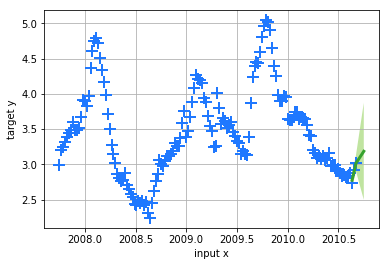

Number of line searches 40


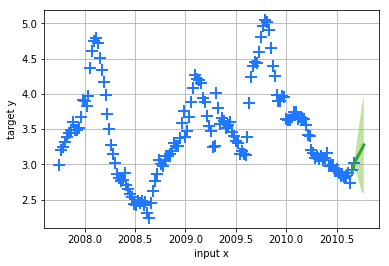

Number of line searches 40


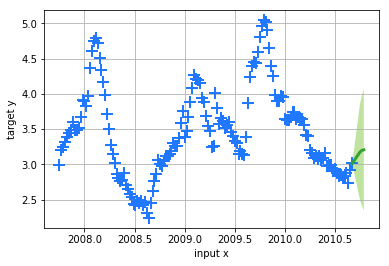

adding jitter of 5.9423212113e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9423212113e+21 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9423212113e+22 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9423212113e+23 to diagnol of kernel matrix for numerical stability
adding jitter of 5.9423212113e+24 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9608405767e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9608405767e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9608405767e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9608405767e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 6.9608405767e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0223068746e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0223068746e+16 to diagnol of kernel

adding jitter of 1.0804876116e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0804876116e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0804876116e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0804876116e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0762440003e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0762440003e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0762440003e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0762440003e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0762440003e+11 to diagnol of kernel matrix for numerical stability
Number of line searches 40


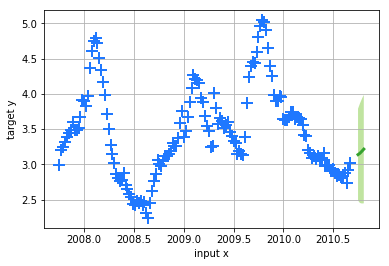

Number of line searches 40


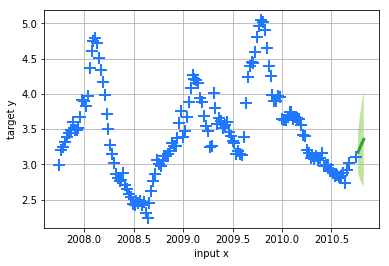

Number of line searches 40


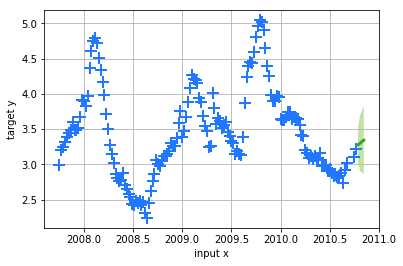

Number of line searches 40


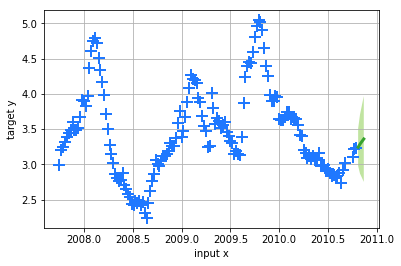

adding jitter of 5.1473559604e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1473559604e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1473559604e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1473559604e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1473559604e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6358532500e+41 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6358532500e+42 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6358532500e+43 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6358532500e+44 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6358532500e+45 to diagnol of kernel matrix for numerical stability
adding jitter of 4.8985351963e+21 to diagnol of kernel matrix for numerical stability
adding jitter of 4.8985351963e+22 to diagnol of kernel

adding jitter of 5.3524937128e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.3524937128e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.3524937128e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.3524937128e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3937633213e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3937633213e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3937633213e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3937633213e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3937633213e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7304034046e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7304034046e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7304034046e+09 to diagnol of kernel

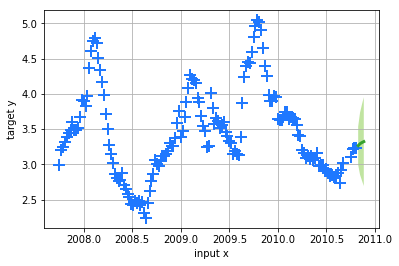

Number of line searches 40


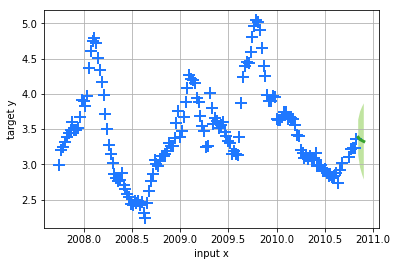

Number of line searches 40


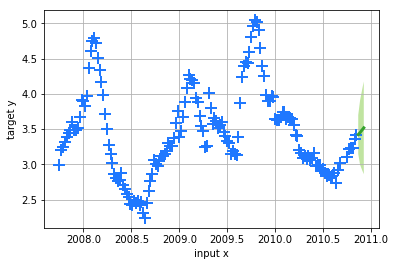

Number of line searches 40


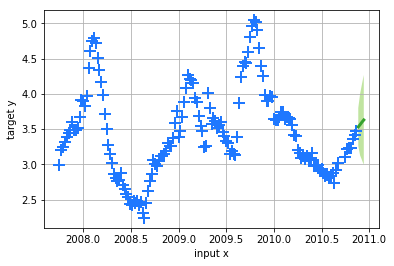

Number of line searches 40


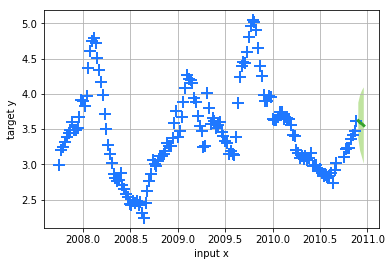

Number of line searches 40


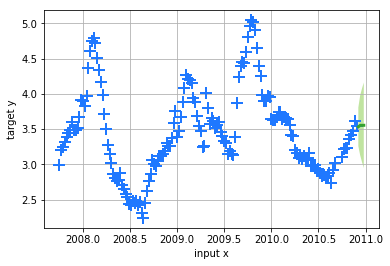

Number of line searches 40


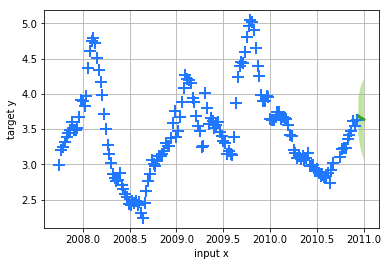

adding jitter of 2.3052495524e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3052495524e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3052495524e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3052495524e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3052495524e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2315097665e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2315097665e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2315097665e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2315097665e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2315097665e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9568723718e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9568723718e+08 to diagnol of kernel

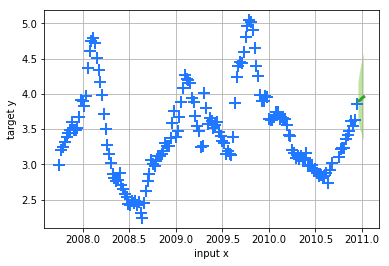

adding jitter of 3.5897123559e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5897123559e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5897123559e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5897123559e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5897123559e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6726173811e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6726173811e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6726173811e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6726173811e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6726173811e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5757672906e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5757672906e+09 to diagnol of kernel

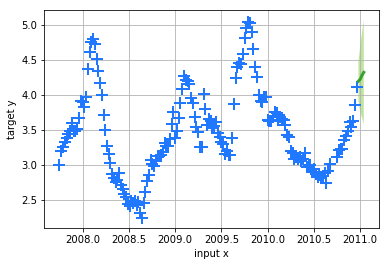

adding jitter of 1.0127205569e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0127205569e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0127205569e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0127205569e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0127205569e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2122873657e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2122873657e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2122873657e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2122873657e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2122873657e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9279217048e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9279217048e+08 to diagnol of kernel

adding jitter of 1.7018763485e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7018763485e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7018763485e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7018763485e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6733904467e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6733904467e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6733904467e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6733904467e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6733904467e+14 to diagnol of kernel matrix for numerical stability
Number of line searches 40


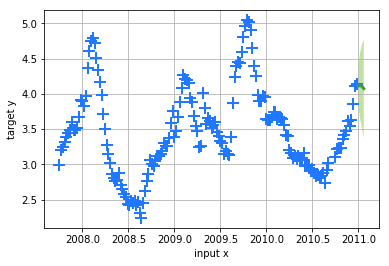

Number of line searches 40


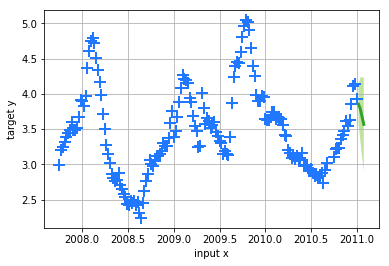

adding jitter of 2.3780783208e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3780783208e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3780783208e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3780783208e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3780783208e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6194652202e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6194652202e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6194652202e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6194652202e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6194652202e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0771158144e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0771158144e+08 to diagnol of kernel

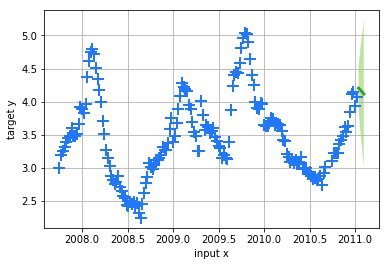

Number of line searches 40


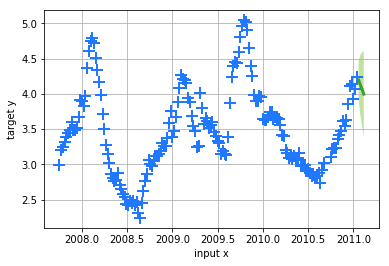

Number of line searches 40


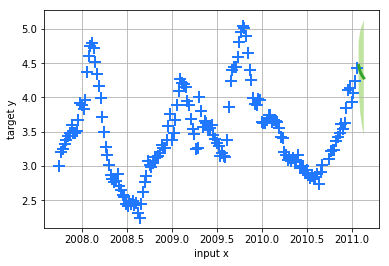

adding jitter of 5.1316839921e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1316839921e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1316839921e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1316839921e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1316839921e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.8826887831e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.8826887831e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 9.8826887831e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.8826887831e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 9.8826887831e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 9.3066197593e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 9.3066197593e+07 to diagnol of kernel

adding jitter of 1.2537567876e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2537567876e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2537567876e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2537567876e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2573944799e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2573944799e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2573944799e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2573944799e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2573944799e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6720468059e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6720468059e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6720468059e+13 to diagnol of kernel

adding jitter of 8.6533108917e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6533108917e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6533108917e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2733230770e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2733230770e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2733230770e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2733230770e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2733230770e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6570211519e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6570211519e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6570211519e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6570211519e+11 to diagnol of kernel

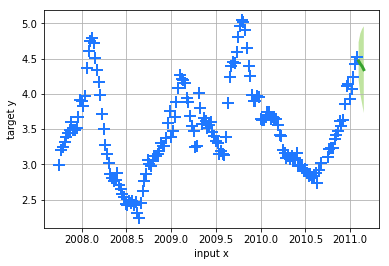

adding jitter of 1.5754855392e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5754855392e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5754855392e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5754855392e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5754855392e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4732226993e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4732226993e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4732226993e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4732226993e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4732226993e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0624375378e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0624375378e+21 to diagnol of kernel

adding jitter of 3.8826625628e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8826625628e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8826625628e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8826625628e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 4.8045669113e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.8045669113e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.8045669113e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.8045669113e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.8045669113e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2590966216e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2590966216e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2590966216e+09 to diagnol of kernel

adding jitter of 2.5553720703e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5553720703e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5553720703e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0378098787e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0378098787e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0378098787e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0378098787e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0378098787e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5666899512e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5666899512e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5666899512e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5666899512e+10 to diagnol of kernel

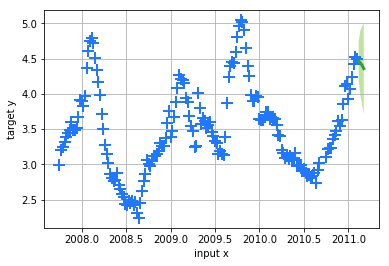

Number of line searches 40


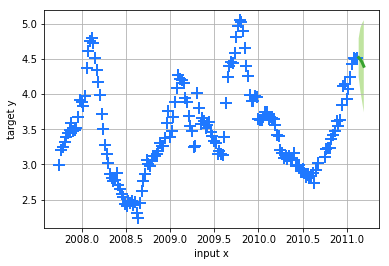

adding jitter of 2.8262108657e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8262108657e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8262108657e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8262108657e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8262108657e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4347953632e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4347953632e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4347953632e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4347953632e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4347953632e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2666773594e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2666773594e+09 to diagnol of kernel

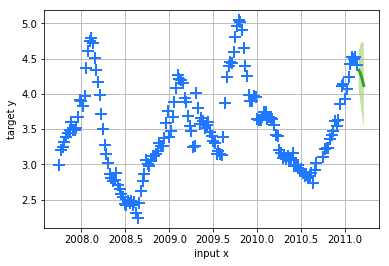

Number of line searches 40


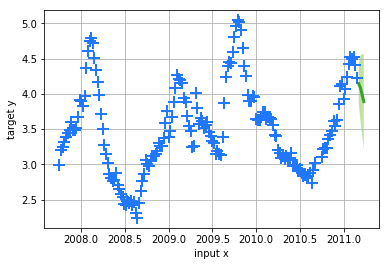

Number of line searches 40


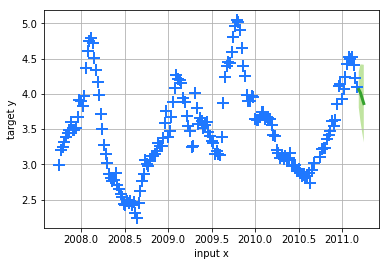

adding jitter of 1.3748470413e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3748470413e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3748470413e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3748470413e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3748470413e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3364722856e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3364722856e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3364722856e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3364722856e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3364722856e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4757642184e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4757642184e+08 to diagnol of kernel

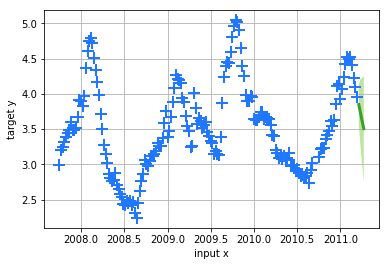

adding jitter of 8.3514645245e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.3514645245e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.3514645245e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.3514645245e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.3514645245e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4066740858e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4066740858e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4066740858e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4066740858e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4066740858e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4169227203e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4169227203e+09 to diagnol of kernel

adding jitter of 1.8645979233e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8645979233e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8645979233e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8645979233e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6960571410e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6960571410e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6960571410e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6960571410e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.6960571410e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5894105299e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5894105299e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5894105299e+09 to diagnol of kernel

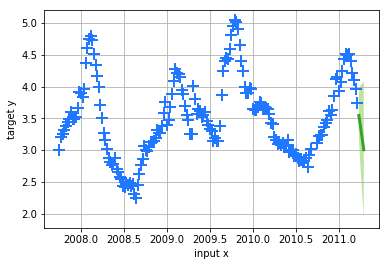

adding jitter of 3.6222995987e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6222995987e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6222995987e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6222995987e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6222995987e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.5098837173e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 8.5098837173e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.5098837173e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.5098837173e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.5098837173e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0532648709e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0532648709e+08 to diagnol of kernel

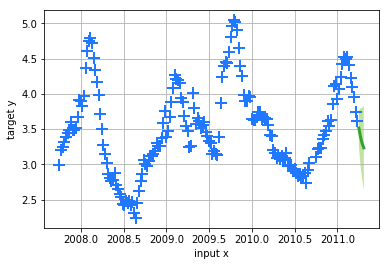

adding jitter of 1.3074551840e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3074551840e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3074551840e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3074551840e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3074551840e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1548237231e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1548237231e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1548237231e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1548237231e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1548237231e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4001429651e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.4001429651e+08 to diagnol of kernel

adding jitter of 1.4932586982e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4932586982e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4932586982e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4932586982e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3863837708e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3863837708e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3863837708e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3863837708e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3863837708e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4127452566e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4127452566e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4127452566e+10 to diagnol of kernel

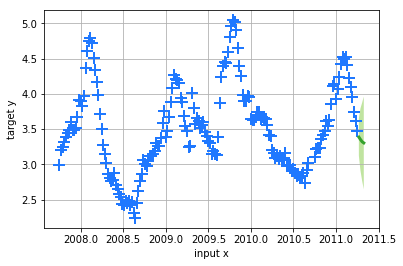

adding jitter of 3.2571844635e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2571844635e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2571844635e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2571844635e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2571844635e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6628805094e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6628805094e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6628805094e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6628805094e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6628805094e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2746819260e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2746819260e+15 to diagnol of kernel

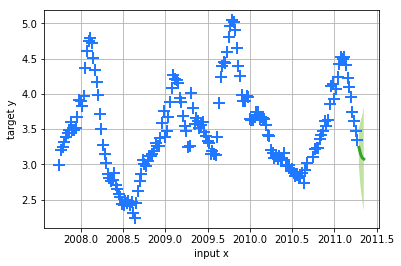

Number of line searches 40


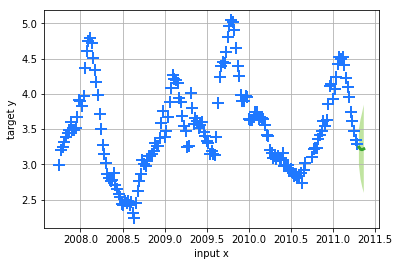

Number of line searches 40


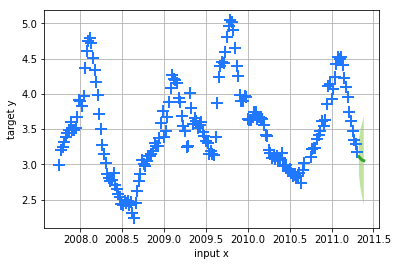

Number of line searches 40


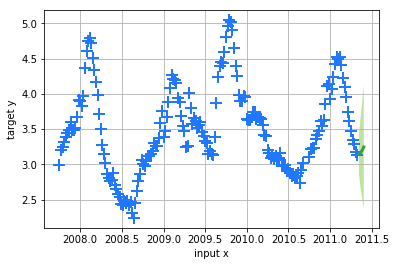

Number of line searches 40


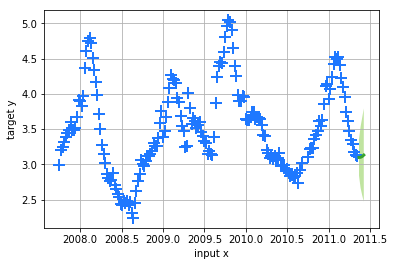

Number of line searches 40


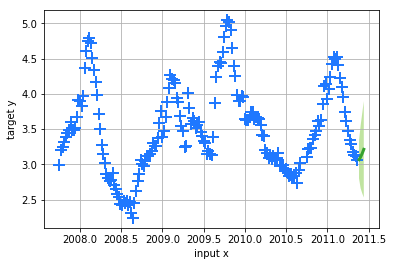

adding jitter of 1.2105879971e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2105879971e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2105879971e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2105879971e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2105879971e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7057491128e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7057491128e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7057491128e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7057491128e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7057491128e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0293762931e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0293762931e+09 to diagnol of kernel

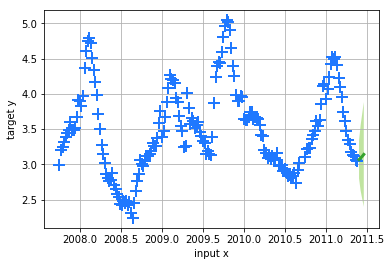

adding jitter of 1.1476319309e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1476319309e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1476319309e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1476319309e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1476319309e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4798434256e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4798434256e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4798434256e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4798434256e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4798434256e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2064092554e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2064092554e+08 to diagnol of kernel

adding jitter of 3.6532008224e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6532008224e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6532008224e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6532008224e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6523069674e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6523069674e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6523069674e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6523069674e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6523069674e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6518601244e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6518601244e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6518601244e+09 to diagnol of kernel

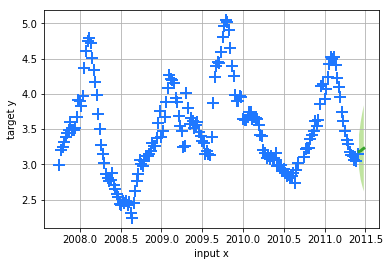

adding jitter of 2.7243913799e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7243913799e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7243913799e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7243913799e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.7243913799e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9554369904e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9554369904e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9554369904e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9554369904e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9554369904e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5222099786e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5222099786e+08 to diagnol of kernel

adding jitter of 1.7334428667e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7334428667e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7334428667e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7334428667e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7372705684e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7372705684e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7372705684e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7372705684e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7372705684e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7353556016e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7353556016e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7353556016e+09 to diagnol of kernel

adding jitter of 9.8072569747e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.8072569747e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 9.8072569747e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8675317785e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8675317785e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8675317785e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8675317785e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8675317785e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8459568252e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8459568252e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8459568252e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.8459568252e+09 to diagnol of kernel

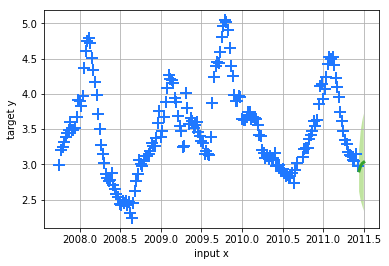

adding jitter of 1.6423341072e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6423341072e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6423341072e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6423341072e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6423341072e+12 to diagnol of kernel matrix for numerical stability
Number of line searches 40


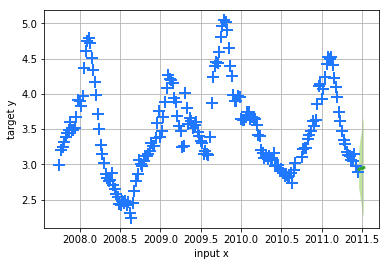

adding jitter of 1.9436462324e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9436462324e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9436462324e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9436462324e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9436462324e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4177460333e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4177460333e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4177460333e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4177460333e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.4177460333e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4340049272e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4340049272e+08 to diagnol of kernel

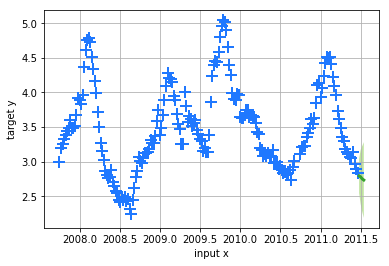

adding jitter of 8.5034841904e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 8.5034841904e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.5034841904e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.5034841904e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.5034841904e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8256497658e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8256497658e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8256497658e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8256497658e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8256497658e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7970455259e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7970455259e+07 to diagnol of kernel

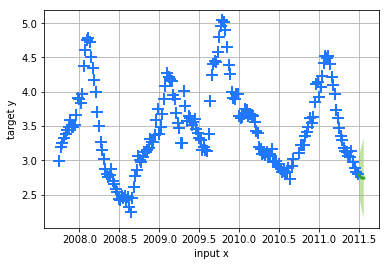

adding jitter of 1.8520317344e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8520317344e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8520317344e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8520317344e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8520317344e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0675033030e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0675033030e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0675033030e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0675033030e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0675033030e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8841968847e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8841968847e+08 to diagnol of kernel

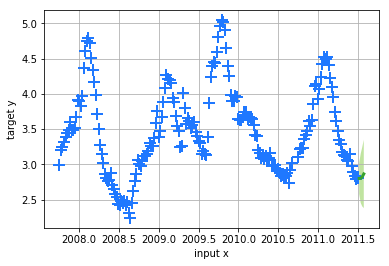

Number of line searches 40


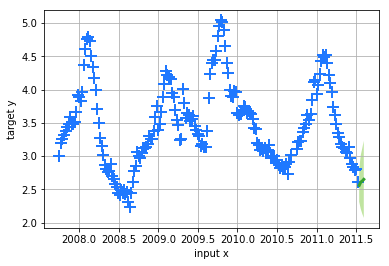

Number of line searches 40


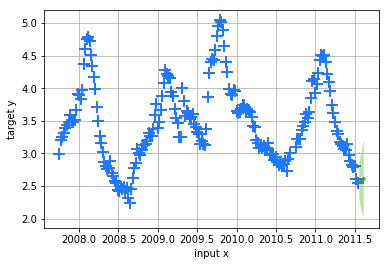

adding jitter of 9.0580132593e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0580132593e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0580132593e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0580132593e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0580132593e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3073573106e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3073573106e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3073573106e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3073573106e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3073573106e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0181423688e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0181423688e+10 to diagnol of kernel

adding jitter of 5.8080625826e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8080625826e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8080625826e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8080625826e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8066506149e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8066506149e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8066506149e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8066506149e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8066506149e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8053095658e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8053095658e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8053095658e+09 to diagnol of kernel

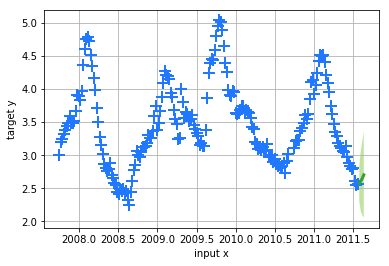

Number of line searches 40


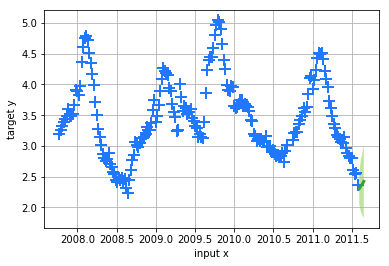

Number of line searches 40


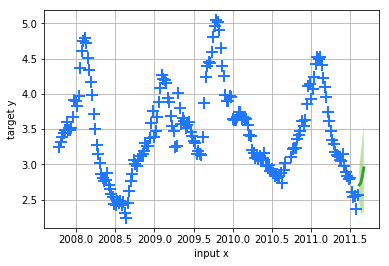

Number of line searches 40


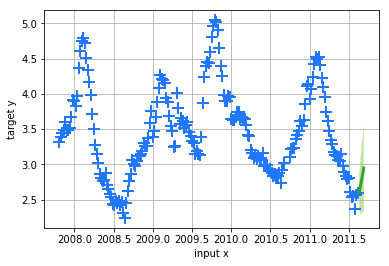

Number of line searches 40


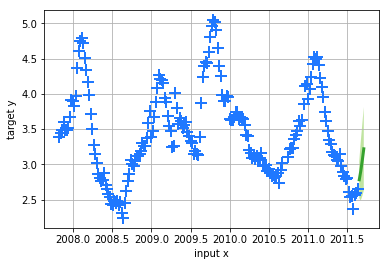

adding jitter of 8.4007687982e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4007687982e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4007687982e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4007687982e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4007687982e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0300165552e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0300165552e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0300165552e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0300165552e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0300165552e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5685041111e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.5685041111e+08 to diagnol of kernel

adding jitter of 1.6958387722e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6958387722e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6958387722e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6958387722e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4076576631e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4076576631e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4076576631e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4076576631e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4076576631e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8839648091e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8839648091e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8839648091e+10 to diagnol of kernel

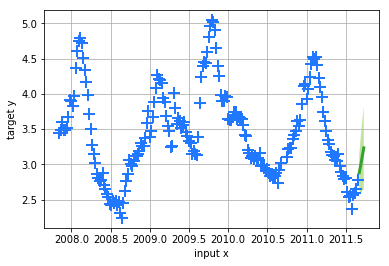

adding jitter of 2.1186645403e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1186645403e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1186645403e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1186645403e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1186645403e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7829802160e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7829802160e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7829802160e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7829802160e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7829802160e+11 to diagnol of kernel matrix for numerical stability
Number of line searches 40


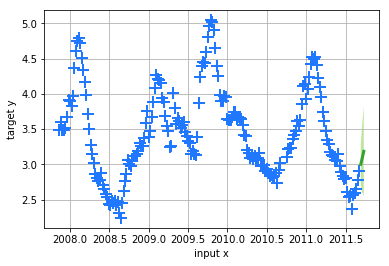

adding jitter of 2.2070191626e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2070191626e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2070191626e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2070191626e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2070191626e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1557134027e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1557134027e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1557134027e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1557134027e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1557134027e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0920250116e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0920250116e+08 to diagnol of kernel

adding jitter of 1.2158536638e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2158536638e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2158536638e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2158536638e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8606997774e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8606997774e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8606997774e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8606997774e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8606997774e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9827750704e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9827750704e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9827750704e+13 to diagnol of kernel

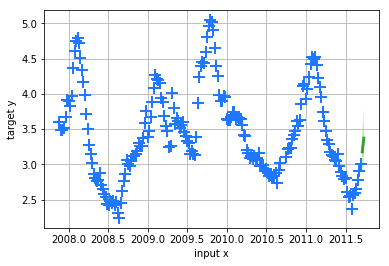

adding jitter of 9.7490675341e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 9.7490675341e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.7490675341e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.7490675341e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.7490675341e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9012036682e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9012036682e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9012036682e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9012036682e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.9012036682e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6607554651e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6607554651e+07 to diagnol of kernel

adding jitter of 2.0478895182e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0478895182e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0478895182e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0478895182e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6694562047e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6694562047e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6694562047e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6694562047e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6694562047e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5819023602e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5819023602e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5819023602e+09 to diagnol of kernel

adding jitter of 7.7725970060e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7725970060e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7725970060e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7703533752e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7703533752e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7703533752e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7703533752e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7703533752e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7682225597e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7682225597e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7682225597e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7682225597e+10 to diagnol of kernel

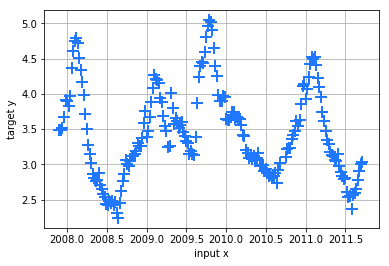

In [112]:
results_gp = SMRoll(x_train, y_train, x_test, y_test)

In [20]:
results_gp = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_gp.csv", delimiter = ",")

ARIMAX Top 18 + GP 

In [59]:
y_train_curr = y_train.reshape(y_train.size)
y_train_curr = y_train_curr[0:-3]
y_test_curr = y_test.reshape(y_test.size)
y_test_curr = np.concatenate((y_train_curr[-3:], y_test_curr))
word_1_train_curr = word_1_train.reshape(word_1_train.size)
word_1_train_curr = word_1_train_curr[0:-3]
word_1_test_curr = word_1_test.reshape(word_1_test.size)
word_1_test_curr = np.concatenate((word_1_train_curr[-3:], word_1_test_curr))
results_1_train = np.array([0,0,0,0]).reshape(1,4)
results_1_test = results_1

word_2_train_curr = word_2_train.reshape(word_2_train.size)
word_2_train_curr = word_2_train_curr[0:-3]
word_2_test_curr = word_2_test.reshape(word_2_test.size)
word_2_test_curr = np.concatenate((word_2_train_curr[-3:], word_2_test_curr))
results_2_train = np.array([0,0,0,0]).reshape(1,4)
results_2_test = results_2

word_3_train_curr = word_3_train.reshape(word_3_train.size)
word_3_train_curr = word_3_train_curr[0:-3]
word_3_test_curr = word_3_test.reshape(word_3_test.size)
word_3_test_curr = np.concatenate((word_3_train_curr[-3:], word_3_test_curr))
results_3_train = np.array([0,0,0,0]).reshape(1,4)
results_3_test = results_3

word_4_train_curr = word_4_train.reshape(word_4_train.size)
word_4_train_curr = word_4_train_curr[0:-3]
word_4_test_curr = word_4_test.reshape(word_4_test.size)
word_4_test_curr = np.concatenate((word_4_train_curr[-3:], word_4_test_curr))
results_4_train = np.array([0,0,0,0]).reshape(1,4)
results_4_test = results_4

word_5_train_curr = word_5_train.reshape(word_5_train.size)
word_5_train_curr = word_5_train_curr[0:-3]
word_5_test_curr = word_5_test.reshape(word_5_test.size)
word_5_test_curr = np.concatenate((word_5_train_curr[-3:], word_5_test_curr))
results_5_train = np.array([0,0,0,0]).reshape(1,4)
results_5_test = results_5

word_6_train_curr = word_6_train.reshape(word_6_train.size)
word_6_train_curr = word_6_train_curr[0:-3]
word_6_test_curr = word_6_test.reshape(word_6_test.size)
word_6_test_curr = np.concatenate((word_6_train_curr[-3:], word_6_test_curr))
results_6_train = np.array([0,0,0,0]).reshape(1,4)
results_6_test = results_6

word_7_train_curr = word_7_train.reshape(word_7_train.size)
word_7_train_curr = word_7_train_curr[0:-3]
word_7_test_curr = word_7_test.reshape(word_7_test.size)
word_7_test_curr = np.concatenate((word_7_train_curr[-3:], word_7_test_curr))
results_7_train = np.array([0,0,0,0]).reshape(1,4)
results_7_test = results_7

word_8_train_curr = word_8_train.reshape(word_8_train.size)
word_8_train_curr = word_8_train_curr[0:-3]
word_8_test_curr = word_8_test.reshape(word_8_test.size)
word_8_test_curr = np.concatenate((word_8_train_curr[-3:], word_8_test_curr))
results_8_train = np.array([0,0,0,0]).reshape(1,4)
results_8_test = results_8

word_9_train_curr = word_9_train.reshape(word_9_train.size)
word_9_train_curr = word_9_train_curr[0:-3]
word_9_test_curr = word_9_test.reshape(word_9_test.size)
word_9_test_curr = np.concatenate((word_9_train_curr[-3:], word_9_test_curr))
results_9_train = np.array([0,0,0,0]).reshape(1,4)
results_9_test = results_9

word_10_train_curr = word_10_train.reshape(word_10_train.size)
word_10_train_curr = word_10_train_curr[0:-3]
word_10_test_curr = word_10_test.reshape(word_10_test.size)
word_10_test_curr = np.concatenate((word_10_train_curr[-3:], word_10_test_curr))
results_10_train = np.array([0,0,0,0]).reshape(1,4)
results_10_test = results_10

word_11_train_curr = word_11_train.reshape(word_11_train.size)
word_11_train_curr = word_11_train_curr[0:-3]
word_11_test_curr = word_11_test.reshape(word_11_test.size)
word_11_test_curr = np.concatenate((word_11_train_curr[-3:], word_11_test_curr))
results_11_train = np.array([0,0,0,0]).reshape(1,4)
results_11_test = results_11

word_12_train_curr = word_12_train.reshape(word_12_train.size)
word_12_train_curr = word_12_train_curr[0:-3]
word_12_test_curr = word_12_test.reshape(word_12_test.size)
word_12_test_curr = np.concatenate((word_12_train_curr[-3:], word_12_test_curr))
results_12_train = np.array([0,0,0,0]).reshape(1,4)
results_12_test = results_12

word_13_train_curr = word_13_train.reshape(word_13_train.size)
word_13_train_curr = word_13_train_curr[0:-3]
word_13_test_curr = word_13_test.reshape(word_13_test.size)
word_13_test_curr = np.concatenate((word_13_train_curr[-3:], word_13_test_curr))
results_13_train = np.array([0,0,0,0]).reshape(1,4)
results_13_test = results_13

word_14_train_curr = word_14_train.reshape(word_14_train.size)
word_14_train_curr = word_14_train_curr[0:-3]
word_14_test_curr = word_14_test.reshape(word_14_test.size)
word_14_test_curr = np.concatenate((word_14_train_curr[-3:], word_14_test_curr))
results_14_train = np.array([0,0,0,0]).reshape(1,4)
results_14_test = results_14

word_15_train_curr = word_15_train.reshape(word_15_train.size)
word_15_train_curr = word_15_train_curr[0:-3]
word_15_test_curr = word_15_test.reshape(word_15_test.size)
word_15_test_curr = np.concatenate((word_15_train_curr[-3:], word_15_test_curr))
results_15_train = np.array([0,0,0,0]).reshape(1,4)
results_15_test = results_15

word_16_train_curr = word_16_train.reshape(word_16_train.size)
word_16_train_curr = word_16_train_curr[0:-3]
word_16_test_curr = word_16_test.reshape(word_16_test.size)
word_16_test_curr = np.concatenate((word_16_train_curr[-3:], word_16_test_curr))
results_16_train = np.array([0,0,0,0]).reshape(1,4)
results_16_test = results_16

word_17_train_curr = word_17_train.reshape(word_17_train.size)
word_17_train_curr = word_17_train_curr[0:-3]
word_17_test_curr = word_17_test.reshape(word_17_test.size)
word_17_test_curr = np.concatenate((word_17_train_curr[-3:], word_17_test_curr))
results_17_train = np.array([0,0,0,0]).reshape(1,4)
results_17_test = results_17

word_18_train_curr = word_18_train.reshape(word_18_train.size)
word_18_train_curr = word_18_train_curr[0:-3]
word_18_test_curr = word_18_test.reshape(word_18_test.size)
word_18_test_curr = np.concatenate((word_18_train_curr[-3:], word_18_test_curr))
results_18_train = np.array([0,0,0,0]).reshape(1,4)
results_18_test = results_18

gp_train_curr = y_train_curr
results_train_gp = np.array([0,0,0,0]).reshape(1,4)
results_test_gp = results_gp 

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'word_11':word_11_train_curr, 'word_12':word_12_train_curr, 'word_13':word_13_train_curr,
           'word_14':word_14_train_curr, 'word_15':word_15_train_curr, 'word_16':word_16_train_curr,
           'word_17':word_17_train_curr, 'word_18':word_18_train_curr,
           'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:]), 
          'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:]),
          'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:]),
          'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:]),
          'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:]),
          'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:]),
          'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:]),
          'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:]),
          'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:]),
          'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:]),
          'word_11':np.append(word_11_test_curr[0:1], results_11_test[0,1:]),
          'word_12':np.append(word_12_test_curr[0:1], results_12_test[0,1:]),
          'word_13':np.append(word_13_test_curr[0:1], results_13_test[0,1:]),
          'word_14':np.append(word_14_test_curr[0:1], results_14_test[0,1:]),
          'word_15':np.append(word_15_test_curr[0:1], results_15_test[0,1:]),
          'word_16':np.append(word_16_test_curr[0:1], results_16_test[0,1:]),
          'word_17':np.append(word_17_test_curr[0:1], results_17_test[0,1:]),
          'word_18':np.append(word_18_test_curr[0:1], results_18_test[0,1:]),
          'gp':results_test_gp[0,]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+word_11+word_12+word_13+word_14+word_15+word_16+word_17+word_18+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
results_word= np.array(forecast).reshape(1,forecast.size)
for i in range(1, y_test.size) :
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
    word_1_train_curr = word_1_train_curr[-200:]
    word_1_test_curr = word_1_test_curr[1:]
    results_1_train = np.vstack((results_1_train, results_1_test[0,]))
    results_1_test = results_1_test[1:,]
    
    word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
    word_2_train_curr = word_2_train_curr[-200:]
    word_2_test_curr = word_2_test_curr[1:]
    results_2_train = np.vstack((results_2_train, results_2_test[0,]))
    results_2_test = results_2_test[1:,]
    
    word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
    word_3_train_curr = word_3_train_curr[-200:]
    word_3_test_curr = word_3_test_curr[1:]
    results_3_train = np.vstack((results_3_train, results_3_test[0,]))
    results_3_test = results_3_test[1:,]
    
    word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
    word_4_train_curr = word_4_train_curr[-200:]
    word_4_test_curr = word_4_test_curr[1:]
    results_4_train = np.vstack((results_4_train, results_4_test[0,]))
    results_4_test = results_4_test[1:,]
    
    word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
    word_5_train_curr = word_5_train_curr[-200:]
    word_5_test_curr = word_5_test_curr[1:]
    results_5_train = np.vstack((results_5_train, results_5_test[0,]))
    results_5_test = results_5_test[1:,]
    
    word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
    word_6_train_curr = word_6_train_curr[-200:]
    word_6_test_curr = word_6_test_curr[1:]
    results_6_train = np.vstack((results_6_train, results_6_test[0,]))
    results_6_test = results_6_test[1:,]
    
    word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
    word_7_train_curr = word_7_train_curr[-200:]
    word_7_test_curr = word_7_test_curr[1:]
    results_7_train = np.vstack((results_7_train, results_7_test[0,]))
    results_7_test = results_7_test[1:,]
    
    word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
    word_8_train_curr = word_8_train_curr[-200:]
    word_8_test_curr = word_8_test_curr[1:]
    results_8_train = np.vstack((results_8_train, results_8_test[0,]))
    results_8_test = results_8_test[1:,]
    
    word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
    word_9_train_curr = word_9_train_curr[-200:]
    word_9_test_curr = word_9_test_curr[1:]
    results_9_train = np.vstack((results_9_train, results_9_test[0,]))
    results_9_test = results_9_test[1:,]
    
    word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
    word_10_train_curr = word_10_train_curr[-200:]
    word_10_test_curr = word_10_test_curr[1:]
    results_10_train = np.vstack((results_10_train, results_10_test[0,]))
    results_10_test = results_10_test[1:,]
    
    word_11_train_curr = np.append(word_11_train_curr, word_11_test_curr[0])
    word_11_train_curr = word_11_train_curr[-200:]
    word_11_test_curr = word_11_test_curr[1:]
    results_11_train = np.vstack((results_11_train, results_11_test[0,]))
    results_11_test = results_11_test[1:,]
    
    word_12_train_curr = np.append(word_12_train_curr, word_12_test_curr[0])
    word_12_train_curr = word_12_train_curr[-200:]
    word_12_test_curr = word_12_test_curr[1:]
    results_12_train = np.vstack((results_12_train, results_12_test[0,]))
    results_12_test = results_12_test[1:,]
    
    word_13_train_curr = np.append(word_13_train_curr, word_13_test_curr[0])
    word_13_train_curr = word_13_train_curr[-200:]
    word_13_test_curr = word_13_test_curr[1:]
    results_13_train = np.vstack((results_13_train, results_13_test[0,]))
    results_13_test = results_13_test[1:,]
    
    word_14_train_curr = np.append(word_14_train_curr, word_14_test_curr[0])
    word_14_train_curr = word_14_train_curr[-200:]
    word_14_test_curr = word_14_test_curr[1:]
    results_14_train = np.vstack((results_14_train, results_14_test[0,]))
    results_14_test = results_14_test[1:,]
    
    word_15_train_curr = np.append(word_15_train_curr, word_15_test_curr[0])
    word_15_train_curr = word_15_train_curr[-200:]
    word_15_test_curr = word_15_test_curr[1:]
    results_15_train = np.vstack((results_15_train, results_15_test[0,]))
    results_15_test = results_15_test[1:,]
    
    word_16_train_curr = np.append(word_16_train_curr, word_16_test_curr[0])
    word_16_train_curr = word_16_train_curr[-200:]
    word_16_test_curr = word_16_test_curr[1:]
    results_16_train = np.vstack((results_16_train, results_16_test[0,]))
    results_16_test = results_16_test[1:,]
    
    word_17_train_curr = np.append(word_17_train_curr, word_17_test_curr[0])
    word_17_train_curr = word_17_train_curr[-200:]
    word_17_test_curr = word_17_test_curr[1:]
    results_17_train = np.vstack((results_17_train, results_17_test[0,]))
    results_17_test = results_17_test[1:,]
     
    word_18_train_curr = np.append(word_18_train_curr, word_18_test_curr[0])
    word_18_train_curr = word_18_train_curr[-200:]
    word_18_test_curr = word_18_test_curr[1:]
    results_18_train = np.vstack((results_18_train, results_18_test[0,]))
    results_18_test = results_18_test[1:,]
    
    gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
    gp_train_curr = gp_train_curr[-200:]
    results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
    results_test_gp = results_test_gp[1:,]
    
    d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'word_11':word_11_train_curr, 'word_12':word_12_train_curr, 'word_13':word_13_train_curr,
           'word_14':word_14_train_curr, 'word_15':word_15_train_curr, 'word_16':word_16_train_curr,
           'word_17':word_17_train_curr, 'word_18':word_18_train_curr,
           'gp':gp_train_curr}
    df_train = pd.DataFrame(data=d_train)
    d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:]), 
          'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:]),
          'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:]),
          'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:]),
          'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:]),
          'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:]),
          'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:]),
          'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:]),
          'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:]),
          'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:]),
          'word_11':np.append(word_11_test_curr[0:1], results_11_test[0,1:]),
          'word_12':np.append(word_12_test_curr[0:1], results_12_test[0,1:]),
          'word_13':np.append(word_13_test_curr[0:1], results_13_test[0,1:]),
          'word_14':np.append(word_14_test_curr[0:1], results_14_test[0,1:]),
          'word_15':np.append(word_15_test_curr[0:1], results_15_test[0,1:]),
          'word_16':np.append(word_16_test_curr[0:1], results_16_test[0,1:]),
          'word_17':np.append(word_17_test_curr[0:1], results_17_test[0,1:]),
          'word_18':np.append(word_18_test_curr[0:1], results_18_test[0,1:]),
          'gp':results_test_gp[0,]}
    df_test = pd.DataFrame.from_dict(data=d_test)
    model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+word_11+word_12+word_13+word_14+word_15+word_16+word_17+word_18+gp', ar=2, ma=0, family=pf.Normal())
    model.fit(method="MLE")
    forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
    results_word = np.vstack((results_word, np.array(forecast).reshape(1, forecast.size)))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]

word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
word_6_train_curr = word_6_train_curr[-200:]
word_6_test_curr = word_6_test_curr[1:]
results_6_train = np.vstack((results_6_train, results_6_test[0,]))
results_6_test = results_6_test[1:,]

word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
word_7_train_curr = word_7_train_curr[-200:]
word_7_test_curr = word_7_test_curr[1:]
results_7_train = np.vstack((results_7_train, results_7_test[0,]))
results_7_test = results_7_test[1:,]

word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
word_8_train_curr = word_8_train_curr[-200:]
word_8_test_curr = word_8_test_curr[1:]
results_8_train = np.vstack((results_8_train, results_8_test[0,]))
results_8_test = results_8_test[1:,]

word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
word_9_train_curr = word_9_train_curr[-200:]
word_9_test_curr = word_9_test_curr[1:]
results_9_train = np.vstack((results_9_train, results_9_test[0,]))
results_9_test = results_9_test[1:,]

word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
word_10_train_curr = word_10_train_curr[-200:]
word_10_test_curr = word_10_test_curr[1:]
results_10_train = np.vstack((results_10_train, results_10_test[0,]))
results_10_test = results_10_test[1:,]

word_11_train_curr = np.append(word_11_train_curr, word_11_test_curr[0])
word_11_train_curr = word_11_train_curr[-200:]
word_11_test_curr = word_11_test_curr[1:]
results_11_train = np.vstack((results_11_train, results_11_test[0,]))
results_11_test = results_11_test[1:,]

word_12_train_curr = np.append(word_12_train_curr, word_12_test_curr[0])
word_12_train_curr = word_12_train_curr[-200:]
word_12_test_curr = word_12_test_curr[1:]
results_12_train = np.vstack((results_12_train, results_12_test[0,]))
results_12_test = results_12_test[1:,]

word_13_train_curr = np.append(word_13_train_curr, word_13_test_curr[0])
word_13_train_curr = word_13_train_curr[-200:]
word_13_test_curr = word_13_test_curr[1:]
results_13_train = np.vstack((results_13_train, results_13_test[0,]))
results_13_test = results_13_test[1:,]

word_14_train_curr = np.append(word_14_train_curr, word_14_test_curr[0])
word_14_train_curr = word_14_train_curr[-200:]
word_14_test_curr = word_14_test_curr[1:]
results_14_train = np.vstack((results_14_train, results_14_test[0,]))
results_14_test = results_14_test[1:,]

word_15_train_curr = np.append(word_15_train_curr, word_15_test_curr[0])
word_15_train_curr = word_15_train_curr[-200:]
word_15_test_curr = word_15_test_curr[1:]
results_15_train = np.vstack((results_15_train, results_15_test[0,]))
results_15_test = results_15_test[1:,]

word_16_train_curr = np.append(word_16_train_curr, word_16_test_curr[0])
word_16_train_curr = word_16_train_curr[-200:]
word_16_test_curr = word_16_test_curr[1:]
results_16_train = np.vstack((results_16_train, results_16_test[0,]))
results_16_test = results_16_test[1:,]

word_17_train_curr = np.append(word_17_train_curr, word_17_test_curr[0])
word_17_train_curr = word_17_train_curr[-200:]
word_17_test_curr = word_17_test_curr[1:]
results_17_train = np.vstack((results_17_train, results_17_test[0,]))
results_17_test = results_17_test[1:,]

word_18_train_curr = np.append(word_18_train_curr, word_18_test_curr[0])
word_18_train_curr = word_18_train_curr[-200:]
word_18_test_curr = word_18_test_curr[1:]
results_18_train = np.vstack((results_18_train, results_18_test[0,]))
results_18_test = results_18_test[1:,]

gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
gp_train_curr = gp_train_curr[-200:]
results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
results_test_gp = results_test_gp[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'word_11':word_11_train_curr, 'word_12':word_12_train_curr, 'word_13':word_13_train_curr,
           'word_14':word_14_train_curr, 'word_15':word_15_train_curr, 'word_16':word_16_train_curr,
           'word_17':word_17_train_curr, 'word_18':word_18_train_curr,
           'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:3]),
         'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:3]),
         'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:3]),
         'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:3]),
         'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:3]),
         'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:3]),
         'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:3]),
         'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:3]),
         'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:3]),
         'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:3]),
         'word_11':np.append(word_11_test_curr[0:1], results_11_test[0,1:3]),
         'word_12':np.append(word_12_test_curr[0:1], results_12_test[0,1:3]),
         'word_13':np.append(word_13_test_curr[0:1], results_13_test[0,1:3]),
         'word_14':np.append(word_14_test_curr[0:1], results_14_test[0,1:3]),
         'word_15':np.append(word_15_test_curr[0:1], results_15_test[0,1:3]),
         'word_16':np.append(word_16_test_curr[0:1], results_16_test[0,1:3]),
         'word_17':np.append(word_17_test_curr[0:1], results_17_test[0,1:3]),
         'word_18':np.append(word_18_test_curr[0:1], results_18_test[0,1:3]),
         'gp':results_test_gp[0,:-1]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+word_11+word_12+word_13+word_14+word_15+word_16+word_17+word_18+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 3, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), 0)))


y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
word_6_train_curr = word_6_train_curr[-200:]
word_6_test_curr = word_6_test_curr[1:]
results_6_train = np.vstack((results_6_train, results_6_test[0,]))
results_6_test = results_6_test[1:,]

word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
word_7_train_curr = word_7_train_curr[-200:]
word_7_test_curr = word_7_test_curr[1:]
results_7_train = np.vstack((results_7_train, results_7_test[0,]))
results_7_test = results_7_test[1:,]

word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
word_8_train_curr = word_8_train_curr[-200:]
word_8_test_curr = word_8_test_curr[1:]
results_8_train = np.vstack((results_8_train, results_8_test[0,]))
results_8_test = results_8_test[1:,]

word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
word_9_train_curr = word_9_train_curr[-200:]
word_9_test_curr = word_9_test_curr[1:]
results_9_train = np.vstack((results_9_train, results_9_test[0,]))
results_9_test = results_9_test[1:,]

word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
word_10_train_curr = word_10_train_curr[-200:]
word_10_test_curr = word_10_test_curr[1:]
results_10_train = np.vstack((results_10_train, results_10_test[0,]))
results_10_test = results_10_test[1:,]

word_11_train_curr = np.append(word_11_train_curr, word_11_test_curr[0])
word_11_train_curr = word_11_train_curr[-200:]
word_11_test_curr = word_11_test_curr[1:]
results_11_train = np.vstack((results_11_train, results_11_test[0,]))
results_11_test = results_11_test[1:,]

word_12_train_curr = np.append(word_12_train_curr, word_12_test_curr[0])
word_12_train_curr = word_12_train_curr[-200:]
word_12_test_curr = word_12_test_curr[1:]
results_12_train = np.vstack((results_12_train, results_12_test[0,]))
results_12_test = results_12_test[1:,]

word_13_train_curr = np.append(word_13_train_curr, word_13_test_curr[0])
word_13_train_curr = word_13_train_curr[-200:]
word_13_test_curr = word_13_test_curr[1:]
results_13_train = np.vstack((results_13_train, results_13_test[0,]))
results_13_test = results_13_test[1:,]

word_14_train_curr = np.append(word_14_train_curr, word_14_test_curr[0])
word_14_train_curr = word_14_train_curr[-200:]
word_14_test_curr = word_14_test_curr[1:]
results_14_train = np.vstack((results_14_train, results_14_test[0,]))
results_14_test = results_14_test[1:,]

word_15_train_curr = np.append(word_15_train_curr, word_15_test_curr[0])
word_15_train_curr = word_15_train_curr[-200:]
word_15_test_curr = word_15_test_curr[1:]
results_15_train = np.vstack((results_15_train, results_15_test[0,]))
results_15_test = results_15_test[1:,]

word_16_train_curr = np.append(word_16_train_curr, word_16_test_curr[0])
word_16_train_curr = word_16_train_curr[-200:]
word_16_test_curr = word_16_test_curr[1:]
results_16_train = np.vstack((results_16_train, results_16_test[0,]))
results_16_test = results_16_test[1:,]

word_17_train_curr = np.append(word_17_train_curr, word_17_test_curr[0])
word_17_train_curr = word_17_train_curr[-200:]
word_17_test_curr = word_17_test_curr[1:]
results_17_train = np.vstack((results_17_train, results_17_test[0,]))
results_17_test = results_17_test[1:,]

word_18_train_curr = np.append(word_18_train_curr, word_18_test_curr[0])
word_18_train_curr = word_18_train_curr[-200:]
word_18_test_curr = word_18_test_curr[1:]
results_18_train = np.vstack((results_18_train, results_18_test[0,]))
results_18_test = results_18_test[1:,]

gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
gp_train_curr = gp_train_curr[-200:]
results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
results_test_gp = results_test_gp[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'word_11':word_11_train_curr, 'word_12':word_12_train_curr, 'word_13':word_13_train_curr,
           'word_14':word_14_train_curr, 'word_15':word_15_train_curr, 'word_16':word_16_train_curr,
           'word_17':word_17_train_curr, 'word_18':word_18_train_curr,
           'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:2]),
         'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:2]),
         'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:2]),
         'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:2]),
         'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:2]),
         'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:2]),
         'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:2]),
         'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:2]),
         'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:2]),
         'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:2]),
         'word_11':np.append(word_11_test_curr[0:1], results_11_test[0,1:2]),
         'word_12':np.append(word_12_test_curr[0:1], results_12_test[0,1:2]),
         'word_13':np.append(word_13_test_curr[0:1], results_13_test[0,1:2]),
         'word_14':np.append(word_14_test_curr[0:1], results_14_test[0,1:2]),
         'word_15':np.append(word_15_test_curr[0:1], results_15_test[0,1:2]),
         'word_16':np.append(word_16_test_curr[0:1], results_16_test[0,1:2]),
         'word_17':np.append(word_17_test_curr[0:1], results_17_test[0,1:2]),
         'word_18':np.append(word_18_test_curr[0:1], results_18_test[0,1:2]),
         'gp':results_test_gp[0,:-2]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+word_11+word_12+word_13+word_14+word_15+word_16+word_17+word_18+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 2, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0]))))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
word_6_train_curr = word_6_train_curr[-200:]
word_6_test_curr = word_6_test_curr[1:]
results_6_train = np.vstack((results_6_train, results_6_test[0,]))
results_6_test = results_6_test[1:,]

word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
word_7_train_curr = word_7_train_curr[-200:]
word_7_test_curr = word_7_test_curr[1:]
results_7_train = np.vstack((results_7_train, results_7_test[0,]))
results_7_test = results_7_test[1:,]

word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
word_8_train_curr = word_8_train_curr[-200:]
word_8_test_curr = word_8_test_curr[1:]
results_8_train = np.vstack((results_8_train, results_8_test[0,]))
results_8_test = results_8_test[1:,]

word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
word_9_train_curr = word_9_train_curr[-200:]
word_9_test_curr = word_9_test_curr[1:]
results_9_train = np.vstack((results_9_train, results_9_test[0,]))
results_9_test = results_9_test[1:,]

word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
word_10_train_curr = word_10_train_curr[-200:]
word_10_test_curr = word_10_test_curr[1:]
results_10_train = np.vstack((results_10_train, results_10_test[0,]))
results_10_test = results_10_test[1:,]

word_11_train_curr = np.append(word_11_train_curr, word_11_test_curr[0])
word_11_train_curr = word_11_train_curr[-200:]
word_11_test_curr = word_11_test_curr[1:]
results_11_train = np.vstack((results_11_train, results_11_test[0,]))
results_11_test = results_11_test[1:,]

word_12_train_curr = np.append(word_12_train_curr, word_12_test_curr[0])
word_12_train_curr = word_12_train_curr[-200:]
word_12_test_curr = word_12_test_curr[1:]
results_12_train = np.vstack((results_12_train, results_12_test[0,]))
results_12_test = results_12_test[1:,]

word_13_train_curr = np.append(word_13_train_curr, word_13_test_curr[0])
word_13_train_curr = word_13_train_curr[-200:]
word_13_test_curr = word_13_test_curr[1:]
results_13_train = np.vstack((results_13_train, results_13_test[0,]))
results_13_test = results_13_test[1:,]

word_14_train_curr = np.append(word_14_train_curr, word_14_test_curr[0])
word_14_train_curr = word_14_train_curr[-200:]
word_14_test_curr = word_14_test_curr[1:]
results_14_train = np.vstack((results_14_train, results_14_test[0,]))
results_14_test = results_14_test[1:,]

word_15_train_curr = np.append(word_15_train_curr, word_15_test_curr[0])
word_15_train_curr = word_15_train_curr[-200:]
word_15_test_curr = word_15_test_curr[1:]
results_15_train = np.vstack((results_15_train, results_15_test[0,]))
results_15_test = results_15_test[1:,]

word_16_train_curr = np.append(word_16_train_curr, word_16_test_curr[0])
word_16_train_curr = word_16_train_curr[-200:]
word_16_test_curr = word_16_test_curr[1:]
results_16_train = np.vstack((results_16_train, results_16_test[0,]))
results_16_test = results_16_test[1:,]

word_17_train_curr = np.append(word_17_train_curr, word_17_test_curr[0])
word_17_train_curr = word_17_train_curr[-200:]
word_17_test_curr = word_17_test_curr[1:]
results_17_train = np.vstack((results_17_train, results_17_test[0,]))
results_17_test = results_17_test[1:,]

word_18_train_curr = np.append(word_18_train_curr, word_18_test_curr[0])
word_18_train_curr = word_18_train_curr[-200:]
word_18_test_curr = word_18_test_curr[1:]
results_18_train = np.vstack((results_18_train, results_18_test[0,]))
results_18_test = results_18_test[1:,]

gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
gp_train_curr = gp_train_curr[-200:]
results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
results_test_gp = results_test_gp[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'word_11':word_11_train_curr, 'word_12':word_12_train_curr, 'word_13':word_13_train_curr,
           'word_14':word_14_train_curr, 'word_15':word_15_train_curr, 'word_16':word_16_train_curr,
           'word_17':word_17_train_curr, 'word_18':word_18_train_curr,
           'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:1], 'word_1':word_1_test_curr[0:1], 'word_2':word_2_test_curr[0:1],
         'word_3':word_3_test_curr[0:1], 'word_4':word_4_test_curr[0:1], 'word_5':word_5_test_curr[0:1],
          'word_6':word_6_test_curr[0:1],
          'word_7':word_7_test_curr[0:1],
          'word_8':word_8_test_curr[0:1],
          'word_9':word_9_test_curr[0:1],
          'word_10':word_10_test_curr[0:1],
          'word_11':word_11_test_curr[0:1],
          'word_12':word_12_test_curr[0:1],
          'word_13':word_13_test_curr[0:1],
          'word_14':word_14_test_curr[0:1],
          'word_15':word_15_test_curr[0:1],
          'word_16':word_16_test_curr[0:1],
          'word_17':word_17_test_curr[0:1],
          'word_18':word_18_test_curr[0:1],
          'gp':results_test_gp[0,:-3]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+word_11+word_12+word_13+word_14+word_15+word_16+word_17+word_18+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 1, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0,0]))))

In [60]:
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_top18_gp.csv", X = results_word, delimiter = ",")

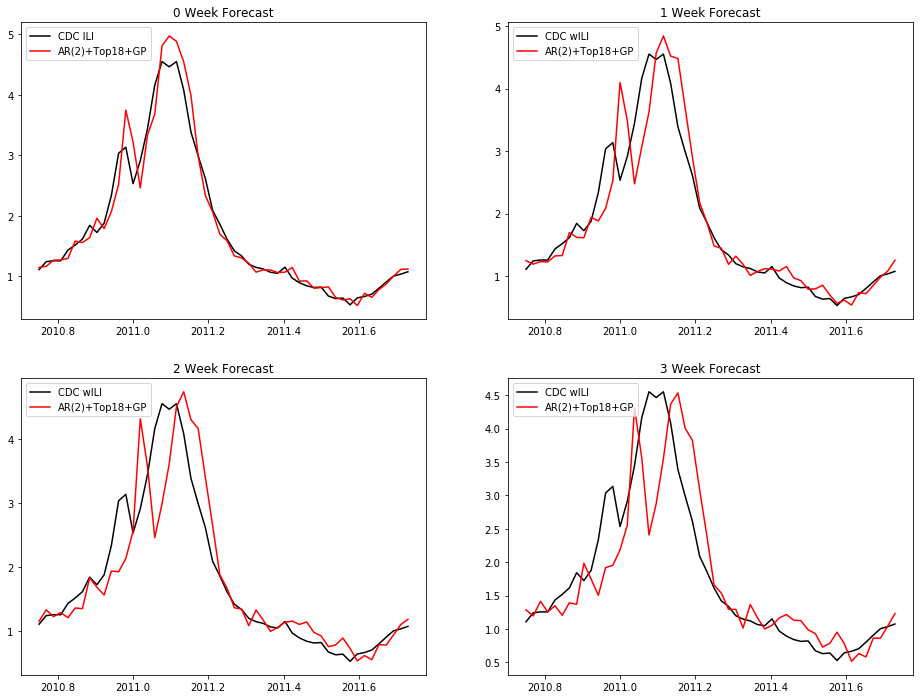

      Correlation       MAE       MSE      RMSE
0 wk     0.981475  0.155881  0.058159  0.241161
1 wk     0.930010  0.260282  0.188325  0.433964
2 wk     0.890340  0.315996  0.283423  0.532375
3 wk     0.849470  0.406677  0.372769  0.610548


In [61]:
plotGraphs(label = "AR(2)+Top18+GP", results_gp = results_word)

In [55]:
y_train_curr = y_train.reshape(y_train.size)
y_train_curr = y_train_curr[0:-3]
y_test_curr = y_test.reshape(y_test.size)
y_test_curr = np.concatenate((y_train_curr[-3:], y_test_curr))
word_1_train_curr = word_1_train.reshape(word_1_train.size)
word_1_train_curr = word_1_train_curr[0:-3]
word_1_test_curr = word_1_test.reshape(word_1_test.size)
word_1_test_curr = np.concatenate((word_1_train_curr[-3:], word_1_test_curr))
results_1_train = np.array([0,0,0,0]).reshape(1,4)
results_1_test = results_1

word_2_train_curr = word_2_train.reshape(word_2_train.size)
word_2_train_curr = word_2_train_curr[0:-3]
word_2_test_curr = word_2_test.reshape(word_2_test.size)
word_2_test_curr = np.concatenate((word_2_train_curr[-3:], word_2_test_curr))
results_2_train = np.array([0,0,0,0]).reshape(1,4)
results_2_test = results_2

word_3_train_curr = word_3_train.reshape(word_3_train.size)
word_3_train_curr = word_3_train_curr[0:-3]
word_3_test_curr = word_3_test.reshape(word_3_test.size)
word_3_test_curr = np.concatenate((word_3_train_curr[-3:], word_3_test_curr))
results_3_train = np.array([0,0,0,0]).reshape(1,4)
results_3_test = results_3

word_4_train_curr = word_4_train.reshape(word_4_train.size)
word_4_train_curr = word_4_train_curr[0:-3]
word_4_test_curr = word_4_test.reshape(word_4_test.size)
word_4_test_curr = np.concatenate((word_4_train_curr[-3:], word_4_test_curr))
results_4_train = np.array([0,0,0,0]).reshape(1,4)
results_4_test = results_4

word_5_train_curr = word_5_train.reshape(word_5_train.size)
word_5_train_curr = word_5_train_curr[0:-3]
word_5_test_curr = word_5_test.reshape(word_5_test.size)
word_5_test_curr = np.concatenate((word_5_train_curr[-3:], word_5_test_curr))
results_5_train = np.array([0,0,0,0]).reshape(1,4)
results_5_test = results_5

word_6_train_curr = word_6_train.reshape(word_6_train.size)
word_6_train_curr = word_6_train_curr[0:-3]
word_6_test_curr = word_6_test.reshape(word_6_test.size)
word_6_test_curr = np.concatenate((word_6_train_curr[-3:], word_6_test_curr))
results_6_train = np.array([0,0,0,0]).reshape(1,4)
results_6_test = results_6

word_7_train_curr = word_7_train.reshape(word_7_train.size)
word_7_train_curr = word_7_train_curr[0:-3]
word_7_test_curr = word_7_test.reshape(word_7_test.size)
word_7_test_curr = np.concatenate((word_7_train_curr[-3:], word_7_test_curr))
results_7_train = np.array([0,0,0,0]).reshape(1,4)
results_7_test = results_7

word_8_train_curr = word_8_train.reshape(word_8_train.size)
word_8_train_curr = word_8_train_curr[0:-3]
word_8_test_curr = word_8_test.reshape(word_8_test.size)
word_8_test_curr = np.concatenate((word_8_train_curr[-3:], word_8_test_curr))
results_8_train = np.array([0,0,0,0]).reshape(1,4)
results_8_test = results_8

word_9_train_curr = word_9_train.reshape(word_9_train.size)
word_9_train_curr = word_9_train_curr[0:-3]
word_9_test_curr = word_9_test.reshape(word_9_test.size)
word_9_test_curr = np.concatenate((word_9_train_curr[-3:], word_9_test_curr))
results_9_train = np.array([0,0,0,0]).reshape(1,4)
results_9_test = results_9

word_10_train_curr = word_10_train.reshape(word_10_train.size)
word_10_train_curr = word_10_train_curr[0:-3]
word_10_test_curr = word_10_test.reshape(word_10_test.size)
word_10_test_curr = np.concatenate((word_10_train_curr[-3:], word_10_test_curr))
results_10_train = np.array([0,0,0,0]).reshape(1,4)
results_10_test = results_10

word_11_train_curr = word_11_train.reshape(word_11_train.size)
word_11_train_curr = word_11_train_curr[0:-3]
word_11_test_curr = word_11_test.reshape(word_11_test.size)
word_11_test_curr = np.concatenate((word_11_train_curr[-3:], word_11_test_curr))
results_11_train = np.array([0,0,0,0]).reshape(1,4)
results_11_test = results_11

word_12_train_curr = word_12_train.reshape(word_12_train.size)
word_12_train_curr = word_12_train_curr[0:-3]
word_12_test_curr = word_12_test.reshape(word_12_test.size)
word_12_test_curr = np.concatenate((word_12_train_curr[-3:], word_12_test_curr))
results_12_train = np.array([0,0,0,0]).reshape(1,4)
results_12_test = results_12

word_13_train_curr = word_13_train.reshape(word_13_train.size)
word_13_train_curr = word_13_train_curr[0:-3]
word_13_test_curr = word_13_test.reshape(word_13_test.size)
word_13_test_curr = np.concatenate((word_13_train_curr[-3:], word_13_test_curr))
results_13_train = np.array([0,0,0,0]).reshape(1,4)
results_13_test = results_13

word_14_train_curr = word_14_train.reshape(word_14_train.size)
word_14_train_curr = word_14_train_curr[0:-3]
word_14_test_curr = word_14_test.reshape(word_14_test.size)
word_14_test_curr = np.concatenate((word_14_train_curr[-3:], word_14_test_curr))
results_14_train = np.array([0,0,0,0]).reshape(1,4)
results_14_test = results_14

word_15_train_curr = word_15_train.reshape(word_15_train.size)
word_15_train_curr = word_15_train_curr[0:-3]
word_15_test_curr = word_15_test.reshape(word_15_test.size)
word_15_test_curr = np.concatenate((word_15_train_curr[-3:], word_15_test_curr))
results_15_train = np.array([0,0,0,0]).reshape(1,4)
results_15_test = results_15

word_16_train_curr = word_16_train.reshape(word_16_train.size)
word_16_train_curr = word_16_train_curr[0:-3]
word_16_test_curr = word_16_test.reshape(word_16_test.size)
word_16_test_curr = np.concatenate((word_16_train_curr[-3:], word_16_test_curr))
results_16_train = np.array([0,0,0,0]).reshape(1,4)
results_16_test = results_16

word_17_train_curr = word_17_train.reshape(word_17_train.size)
word_17_train_curr = word_17_train_curr[0:-3]
word_17_test_curr = word_17_test.reshape(word_17_test.size)
word_17_test_curr = np.concatenate((word_17_train_curr[-3:], word_17_test_curr))
results_17_train = np.array([0,0,0,0]).reshape(1,4)
results_17_test = results_17

word_18_train_curr = word_18_train.reshape(word_18_train.size)
word_18_train_curr = word_18_train_curr[0:-3]
word_18_test_curr = word_18_test.reshape(word_18_test.size)
word_18_test_curr = np.concatenate((word_18_train_curr[-3:], word_18_test_curr))
results_18_train = np.array([0,0,0,0]).reshape(1,4)
results_18_test = results_18

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'word_11':word_11_train_curr, 'word_12':word_12_train_curr, 'word_13':word_13_train_curr,
           'word_14':word_14_train_curr, 'word_15':word_15_train_curr, 'word_16':word_16_train_curr,
           'word_17':word_17_train_curr, 'word_18':word_18_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:]), 
          'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:]),
          'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:]),
          'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:]),
          'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:]),
          'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:]),
          'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:]),
          'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:]),
          'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:]),
          'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:]),
          'word_11':np.append(word_11_test_curr[0:1], results_11_test[0,1:]),
          'word_12':np.append(word_12_test_curr[0:1], results_12_test[0,1:]),
          'word_13':np.append(word_13_test_curr[0:1], results_13_test[0,1:]),
          'word_14':np.append(word_14_test_curr[0:1], results_14_test[0,1:]),
          'word_15':np.append(word_15_test_curr[0:1], results_15_test[0,1:]),
          'word_16':np.append(word_16_test_curr[0:1], results_16_test[0,1:]),
          'word_17':np.append(word_17_test_curr[0:1], results_17_test[0,1:]),
          'word_18':np.append(word_18_test_curr[0:1], results_18_test[0,1:])}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+word_11+word_12+word_13+word_14+word_15+word_16+word_17+word_18', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
results_word= np.array(forecast).reshape(1,forecast.size)
for i in range(1, y_test.size) :
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
    word_1_train_curr = word_1_train_curr[-200:]
    word_1_test_curr = word_1_test_curr[1:]
    results_1_train = np.vstack((results_1_train, results_1_test[0,]))
    results_1_test = results_1_test[1:,]
    
    word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
    word_2_train_curr = word_2_train_curr[-200:]
    word_2_test_curr = word_2_test_curr[1:]
    results_2_train = np.vstack((results_2_train, results_2_test[0,]))
    results_2_test = results_2_test[1:,]
    
    word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
    word_3_train_curr = word_3_train_curr[-200:]
    word_3_test_curr = word_3_test_curr[1:]
    results_3_train = np.vstack((results_3_train, results_3_test[0,]))
    results_3_test = results_3_test[1:,]
    
    word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
    word_4_train_curr = word_4_train_curr[-200:]
    word_4_test_curr = word_4_test_curr[1:]
    results_4_train = np.vstack((results_4_train, results_4_test[0,]))
    results_4_test = results_4_test[1:,]
    
    word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
    word_5_train_curr = word_5_train_curr[-200:]
    word_5_test_curr = word_5_test_curr[1:]
    results_5_train = np.vstack((results_5_train, results_5_test[0,]))
    results_5_test = results_5_test[1:,]
    
    word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
    word_6_train_curr = word_6_train_curr[-200:]
    word_6_test_curr = word_6_test_curr[1:]
    results_6_train = np.vstack((results_6_train, results_6_test[0,]))
    results_6_test = results_6_test[1:,]
    
    word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
    word_7_train_curr = word_7_train_curr[-200:]
    word_7_test_curr = word_7_test_curr[1:]
    results_7_train = np.vstack((results_7_train, results_7_test[0,]))
    results_7_test = results_7_test[1:,]
    
    word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
    word_8_train_curr = word_8_train_curr[-200:]
    word_8_test_curr = word_8_test_curr[1:]
    results_8_train = np.vstack((results_8_train, results_8_test[0,]))
    results_8_test = results_8_test[1:,]
    
    word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
    word_9_train_curr = word_9_train_curr[-200:]
    word_9_test_curr = word_9_test_curr[1:]
    results_9_train = np.vstack((results_9_train, results_9_test[0,]))
    results_9_test = results_9_test[1:,]
    
    word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
    word_10_train_curr = word_10_train_curr[-200:]
    word_10_test_curr = word_10_test_curr[1:]
    results_10_train = np.vstack((results_10_train, results_10_test[0,]))
    results_10_test = results_10_test[1:,]
    
    word_11_train_curr = np.append(word_11_train_curr, word_11_test_curr[0])
    word_11_train_curr = word_11_train_curr[-200:]
    word_11_test_curr = word_11_test_curr[1:]
    results_11_train = np.vstack((results_11_train, results_11_test[0,]))
    results_11_test = results_11_test[1:,]
    
    word_12_train_curr = np.append(word_12_train_curr, word_12_test_curr[0])
    word_12_train_curr = word_12_train_curr[-200:]
    word_12_test_curr = word_12_test_curr[1:]
    results_12_train = np.vstack((results_12_train, results_12_test[0,]))
    results_12_test = results_12_test[1:,]
    
    word_13_train_curr = np.append(word_13_train_curr, word_13_test_curr[0])
    word_13_train_curr = word_13_train_curr[-200:]
    word_13_test_curr = word_13_test_curr[1:]
    results_13_train = np.vstack((results_13_train, results_13_test[0,]))
    results_13_test = results_13_test[1:,]
    
    word_14_train_curr = np.append(word_14_train_curr, word_14_test_curr[0])
    word_14_train_curr = word_14_train_curr[-200:]
    word_14_test_curr = word_14_test_curr[1:]
    results_14_train = np.vstack((results_14_train, results_14_test[0,]))
    results_14_test = results_14_test[1:,]
    
    word_15_train_curr = np.append(word_15_train_curr, word_15_test_curr[0])
    word_15_train_curr = word_15_train_curr[-200:]
    word_15_test_curr = word_15_test_curr[1:]
    results_15_train = np.vstack((results_15_train, results_15_test[0,]))
    results_15_test = results_15_test[1:,]
    
    word_16_train_curr = np.append(word_16_train_curr, word_16_test_curr[0])
    word_16_train_curr = word_16_train_curr[-200:]
    word_16_test_curr = word_16_test_curr[1:]
    results_16_train = np.vstack((results_16_train, results_16_test[0,]))
    results_16_test = results_16_test[1:,]
    
    word_17_train_curr = np.append(word_17_train_curr, word_17_test_curr[0])
    word_17_train_curr = word_17_train_curr[-200:]
    word_17_test_curr = word_17_test_curr[1:]
    results_17_train = np.vstack((results_17_train, results_17_test[0,]))
    results_17_test = results_17_test[1:,]
     
    word_18_train_curr = np.append(word_18_train_curr, word_18_test_curr[0])
    word_18_train_curr = word_18_train_curr[-200:]
    word_18_test_curr = word_18_test_curr[1:]
    results_18_train = np.vstack((results_18_train, results_18_test[0,]))
    results_18_test = results_18_test[1:,]
    
    d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'word_11':word_11_train_curr, 'word_12':word_12_train_curr, 'word_13':word_13_train_curr,
           'word_14':word_14_train_curr, 'word_15':word_15_train_curr, 'word_16':word_16_train_curr,
           'word_17':word_17_train_curr, 'word_18':word_18_train_curr}
    df_train = pd.DataFrame(data=d_train)
    d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:]), 
          'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:]),
          'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:]),
          'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:]),
          'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:]),
          'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:]),
          'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:]),
          'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:]),
          'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:]),
          'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:]),
          'word_11':np.append(word_11_test_curr[0:1], results_11_test[0,1:]),
          'word_12':np.append(word_12_test_curr[0:1], results_12_test[0,1:]),
          'word_13':np.append(word_13_test_curr[0:1], results_13_test[0,1:]),
          'word_14':np.append(word_14_test_curr[0:1], results_14_test[0,1:]),
          'word_15':np.append(word_15_test_curr[0:1], results_15_test[0,1:]),
          'word_16':np.append(word_16_test_curr[0:1], results_16_test[0,1:]),
          'word_17':np.append(word_17_test_curr[0:1], results_17_test[0,1:]),
          'word_18':np.append(word_18_test_curr[0:1], results_18_test[0,1:])}
    df_test = pd.DataFrame.from_dict(data=d_test)
    model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+word_11+word_12+word_13+word_14+word_15+word_16+word_17+word_18', ar=2, ma=0, family=pf.Normal())
    model.fit(method="MLE")
    forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
    results_word = np.vstack((results_word, np.array(forecast).reshape(1, forecast.size)))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]

word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
word_6_train_curr = word_6_train_curr[-200:]
word_6_test_curr = word_6_test_curr[1:]
results_6_train = np.vstack((results_6_train, results_6_test[0,]))
results_6_test = results_6_test[1:,]

word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
word_7_train_curr = word_7_train_curr[-200:]
word_7_test_curr = word_7_test_curr[1:]
results_7_train = np.vstack((results_7_train, results_7_test[0,]))
results_7_test = results_7_test[1:,]

word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
word_8_train_curr = word_8_train_curr[-200:]
word_8_test_curr = word_8_test_curr[1:]
results_8_train = np.vstack((results_8_train, results_8_test[0,]))
results_8_test = results_8_test[1:,]

word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
word_9_train_curr = word_9_train_curr[-200:]
word_9_test_curr = word_9_test_curr[1:]
results_9_train = np.vstack((results_9_train, results_9_test[0,]))
results_9_test = results_9_test[1:,]

word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
word_10_train_curr = word_10_train_curr[-200:]
word_10_test_curr = word_10_test_curr[1:]
results_10_train = np.vstack((results_10_train, results_10_test[0,]))
results_10_test = results_10_test[1:,]

word_11_train_curr = np.append(word_11_train_curr, word_11_test_curr[0])
word_11_train_curr = word_11_train_curr[-200:]
word_11_test_curr = word_11_test_curr[1:]
results_11_train = np.vstack((results_11_train, results_11_test[0,]))
results_11_test = results_11_test[1:,]

word_12_train_curr = np.append(word_12_train_curr, word_12_test_curr[0])
word_12_train_curr = word_12_train_curr[-200:]
word_12_test_curr = word_12_test_curr[1:]
results_12_train = np.vstack((results_12_train, results_12_test[0,]))
results_12_test = results_12_test[1:,]

word_13_train_curr = np.append(word_13_train_curr, word_13_test_curr[0])
word_13_train_curr = word_13_train_curr[-200:]
word_13_test_curr = word_13_test_curr[1:]
results_13_train = np.vstack((results_13_train, results_13_test[0,]))
results_13_test = results_13_test[1:,]

word_14_train_curr = np.append(word_14_train_curr, word_14_test_curr[0])
word_14_train_curr = word_14_train_curr[-200:]
word_14_test_curr = word_14_test_curr[1:]
results_14_train = np.vstack((results_14_train, results_14_test[0,]))
results_14_test = results_14_test[1:,]

word_15_train_curr = np.append(word_15_train_curr, word_15_test_curr[0])
word_15_train_curr = word_15_train_curr[-200:]
word_15_test_curr = word_15_test_curr[1:]
results_15_train = np.vstack((results_15_train, results_15_test[0,]))
results_15_test = results_15_test[1:,]

word_16_train_curr = np.append(word_16_train_curr, word_16_test_curr[0])
word_16_train_curr = word_16_train_curr[-200:]
word_16_test_curr = word_16_test_curr[1:]
results_16_train = np.vstack((results_16_train, results_16_test[0,]))
results_16_test = results_16_test[1:,]

word_17_train_curr = np.append(word_17_train_curr, word_17_test_curr[0])
word_17_train_curr = word_17_train_curr[-200:]
word_17_test_curr = word_17_test_curr[1:]
results_17_train = np.vstack((results_17_train, results_17_test[0,]))
results_17_test = results_17_test[1:,]

word_18_train_curr = np.append(word_18_train_curr, word_18_test_curr[0])
word_18_train_curr = word_18_train_curr[-200:]
word_18_test_curr = word_18_test_curr[1:]
results_18_train = np.vstack((results_18_train, results_18_test[0,]))
results_18_test = results_18_test[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'word_11':word_11_train_curr, 'word_12':word_12_train_curr, 'word_13':word_13_train_curr,
           'word_14':word_14_train_curr, 'word_15':word_15_train_curr, 'word_16':word_16_train_curr,
           'word_17':word_17_train_curr, 'word_18':word_18_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:3]),
         'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:3]),
         'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:3]),
         'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:3]),
         'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:3]),
         'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:3]),
         'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:3]),
         'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:3]),
         'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:3]),
         'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:3]),
         'word_11':np.append(word_11_test_curr[0:1], results_11_test[0,1:3]),
         'word_12':np.append(word_12_test_curr[0:1], results_12_test[0,1:3]),
         'word_13':np.append(word_13_test_curr[0:1], results_13_test[0,1:3]),
         'word_14':np.append(word_14_test_curr[0:1], results_14_test[0,1:3]),
         'word_15':np.append(word_15_test_curr[0:1], results_15_test[0,1:3]),
         'word_16':np.append(word_16_test_curr[0:1], results_16_test[0,1:3]),
         'word_17':np.append(word_17_test_curr[0:1], results_17_test[0,1:3]),
         'word_18':np.append(word_18_test_curr[0:1], results_18_test[0,1:3])}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+word_11+word_12+word_13+word_14+word_15+word_16+word_17+word_18', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 3, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), 0)))


y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
word_6_train_curr = word_6_train_curr[-200:]
word_6_test_curr = word_6_test_curr[1:]
results_6_train = np.vstack((results_6_train, results_6_test[0,]))
results_6_test = results_6_test[1:,]

word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
word_7_train_curr = word_7_train_curr[-200:]
word_7_test_curr = word_7_test_curr[1:]
results_7_train = np.vstack((results_7_train, results_7_test[0,]))
results_7_test = results_7_test[1:,]

word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
word_8_train_curr = word_8_train_curr[-200:]
word_8_test_curr = word_8_test_curr[1:]
results_8_train = np.vstack((results_8_train, results_8_test[0,]))
results_8_test = results_8_test[1:,]

word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
word_9_train_curr = word_9_train_curr[-200:]
word_9_test_curr = word_9_test_curr[1:]
results_9_train = np.vstack((results_9_train, results_9_test[0,]))
results_9_test = results_9_test[1:,]

word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
word_10_train_curr = word_10_train_curr[-200:]
word_10_test_curr = word_10_test_curr[1:]
results_10_train = np.vstack((results_10_train, results_10_test[0,]))
results_10_test = results_10_test[1:,]

word_11_train_curr = np.append(word_11_train_curr, word_11_test_curr[0])
word_11_train_curr = word_11_train_curr[-200:]
word_11_test_curr = word_11_test_curr[1:]
results_11_train = np.vstack((results_11_train, results_11_test[0,]))
results_11_test = results_11_test[1:,]

word_12_train_curr = np.append(word_12_train_curr, word_12_test_curr[0])
word_12_train_curr = word_12_train_curr[-200:]
word_12_test_curr = word_12_test_curr[1:]
results_12_train = np.vstack((results_12_train, results_12_test[0,]))
results_12_test = results_12_test[1:,]

word_13_train_curr = np.append(word_13_train_curr, word_13_test_curr[0])
word_13_train_curr = word_13_train_curr[-200:]
word_13_test_curr = word_13_test_curr[1:]
results_13_train = np.vstack((results_13_train, results_13_test[0,]))
results_13_test = results_13_test[1:,]

word_14_train_curr = np.append(word_14_train_curr, word_14_test_curr[0])
word_14_train_curr = word_14_train_curr[-200:]
word_14_test_curr = word_14_test_curr[1:]
results_14_train = np.vstack((results_14_train, results_14_test[0,]))
results_14_test = results_14_test[1:,]

word_15_train_curr = np.append(word_15_train_curr, word_15_test_curr[0])
word_15_train_curr = word_15_train_curr[-200:]
word_15_test_curr = word_15_test_curr[1:]
results_15_train = np.vstack((results_15_train, results_15_test[0,]))
results_15_test = results_15_test[1:,]

word_16_train_curr = np.append(word_16_train_curr, word_16_test_curr[0])
word_16_train_curr = word_16_train_curr[-200:]
word_16_test_curr = word_16_test_curr[1:]
results_16_train = np.vstack((results_16_train, results_16_test[0,]))
results_16_test = results_16_test[1:,]

word_17_train_curr = np.append(word_17_train_curr, word_17_test_curr[0])
word_17_train_curr = word_17_train_curr[-200:]
word_17_test_curr = word_17_test_curr[1:]
results_17_train = np.vstack((results_17_train, results_17_test[0,]))
results_17_test = results_17_test[1:,]

word_18_train_curr = np.append(word_18_train_curr, word_18_test_curr[0])
word_18_train_curr = word_18_train_curr[-200:]
word_18_test_curr = word_18_test_curr[1:]
results_18_train = np.vstack((results_18_train, results_18_test[0,]))
results_18_test = results_18_test[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'word_11':word_11_train_curr, 'word_12':word_12_train_curr, 'word_13':word_13_train_curr,
           'word_14':word_14_train_curr, 'word_15':word_15_train_curr, 'word_16':word_16_train_curr,
           'word_17':word_17_train_curr, 'word_18':word_18_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:2]),
         'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:2]),
         'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:2]),
         'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:2]),
         'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:2]),
         'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:2]),
         'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:2]),
         'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:2]),
         'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:2]),
         'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:2]),
         'word_11':np.append(word_11_test_curr[0:1], results_11_test[0,1:2]),
         'word_12':np.append(word_12_test_curr[0:1], results_12_test[0,1:2]),
         'word_13':np.append(word_13_test_curr[0:1], results_13_test[0,1:2]),
         'word_14':np.append(word_14_test_curr[0:1], results_14_test[0,1:2]),
         'word_15':np.append(word_15_test_curr[0:1], results_15_test[0,1:2]),
         'word_16':np.append(word_16_test_curr[0:1], results_16_test[0,1:2]),
         'word_17':np.append(word_17_test_curr[0:1], results_17_test[0,1:2]),
         'word_18':np.append(word_18_test_curr[0:1], results_18_test[0,1:2])}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+word_11+word_12+word_13+word_14+word_15+word_16+word_17+word_18', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 2, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0]))))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
word_6_train_curr = word_6_train_curr[-200:]
word_6_test_curr = word_6_test_curr[1:]
results_6_train = np.vstack((results_6_train, results_6_test[0,]))
results_6_test = results_6_test[1:,]

word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
word_7_train_curr = word_7_train_curr[-200:]
word_7_test_curr = word_7_test_curr[1:]
results_7_train = np.vstack((results_7_train, results_7_test[0,]))
results_7_test = results_7_test[1:,]

word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
word_8_train_curr = word_8_train_curr[-200:]
word_8_test_curr = word_8_test_curr[1:]
results_8_train = np.vstack((results_8_train, results_8_test[0,]))
results_8_test = results_8_test[1:,]

word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
word_9_train_curr = word_9_train_curr[-200:]
word_9_test_curr = word_9_test_curr[1:]
results_9_train = np.vstack((results_9_train, results_9_test[0,]))
results_9_test = results_9_test[1:,]

word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
word_10_train_curr = word_10_train_curr[-200:]
word_10_test_curr = word_10_test_curr[1:]
results_10_train = np.vstack((results_10_train, results_10_test[0,]))
results_10_test = results_10_test[1:,]

word_11_train_curr = np.append(word_11_train_curr, word_11_test_curr[0])
word_11_train_curr = word_11_train_curr[-200:]
word_11_test_curr = word_11_test_curr[1:]
results_11_train = np.vstack((results_11_train, results_11_test[0,]))
results_11_test = results_11_test[1:,]

word_12_train_curr = np.append(word_12_train_curr, word_12_test_curr[0])
word_12_train_curr = word_12_train_curr[-200:]
word_12_test_curr = word_12_test_curr[1:]
results_12_train = np.vstack((results_12_train, results_12_test[0,]))
results_12_test = results_12_test[1:,]

word_13_train_curr = np.append(word_13_train_curr, word_13_test_curr[0])
word_13_train_curr = word_13_train_curr[-200:]
word_13_test_curr = word_13_test_curr[1:]
results_13_train = np.vstack((results_13_train, results_13_test[0,]))
results_13_test = results_13_test[1:,]

word_14_train_curr = np.append(word_14_train_curr, word_14_test_curr[0])
word_14_train_curr = word_14_train_curr[-200:]
word_14_test_curr = word_14_test_curr[1:]
results_14_train = np.vstack((results_14_train, results_14_test[0,]))
results_14_test = results_14_test[1:,]

word_15_train_curr = np.append(word_15_train_curr, word_15_test_curr[0])
word_15_train_curr = word_15_train_curr[-200:]
word_15_test_curr = word_15_test_curr[1:]
results_15_train = np.vstack((results_15_train, results_15_test[0,]))
results_15_test = results_15_test[1:,]

word_16_train_curr = np.append(word_16_train_curr, word_16_test_curr[0])
word_16_train_curr = word_16_train_curr[-200:]
word_16_test_curr = word_16_test_curr[1:]
results_16_train = np.vstack((results_16_train, results_16_test[0,]))
results_16_test = results_16_test[1:,]

word_17_train_curr = np.append(word_17_train_curr, word_17_test_curr[0])
word_17_train_curr = word_17_train_curr[-200:]
word_17_test_curr = word_17_test_curr[1:]
results_17_train = np.vstack((results_17_train, results_17_test[0,]))
results_17_test = results_17_test[1:,]

word_18_train_curr = np.append(word_18_train_curr, word_18_test_curr[0])
word_18_train_curr = word_18_train_curr[-200:]
word_18_test_curr = word_18_test_curr[1:]
results_18_train = np.vstack((results_18_train, results_18_test[0,]))
results_18_test = results_18_test[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'word_11':word_11_train_curr, 'word_12':word_12_train_curr, 'word_13':word_13_train_curr,
           'word_14':word_14_train_curr, 'word_15':word_15_train_curr, 'word_16':word_16_train_curr,
           'word_17':word_17_train_curr, 'word_18':word_18_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:1], 'word_1':word_1_test_curr[0:1], 'word_2':word_2_test_curr[0:1],
         'word_3':word_3_test_curr[0:1], 'word_4':word_4_test_curr[0:1], 'word_5':word_5_test_curr[0:1],
          'word_6':word_6_test_curr[0:1],
          'word_7':word_7_test_curr[0:1],
          'word_8':word_8_test_curr[0:1],
          'word_9':word_9_test_curr[0:1],
          'word_10':word_10_test_curr[0:1],
          'word_11':word_11_test_curr[0:1],
          'word_12':word_12_test_curr[0:1],
          'word_13':word_13_test_curr[0:1],
          'word_14':word_14_test_curr[0:1],
          'word_15':word_15_test_curr[0:1],
          'word_16':word_16_test_curr[0:1],
          'word_17':word_17_test_curr[0:1],
          'word_18':word_18_test_curr[0:1]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+word_11+word_12+word_13+word_14+word_15+word_16+word_17+word_18', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 1, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0,0]))))

In [57]:
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_top18.csv", X = results_word, delimiter = ",")

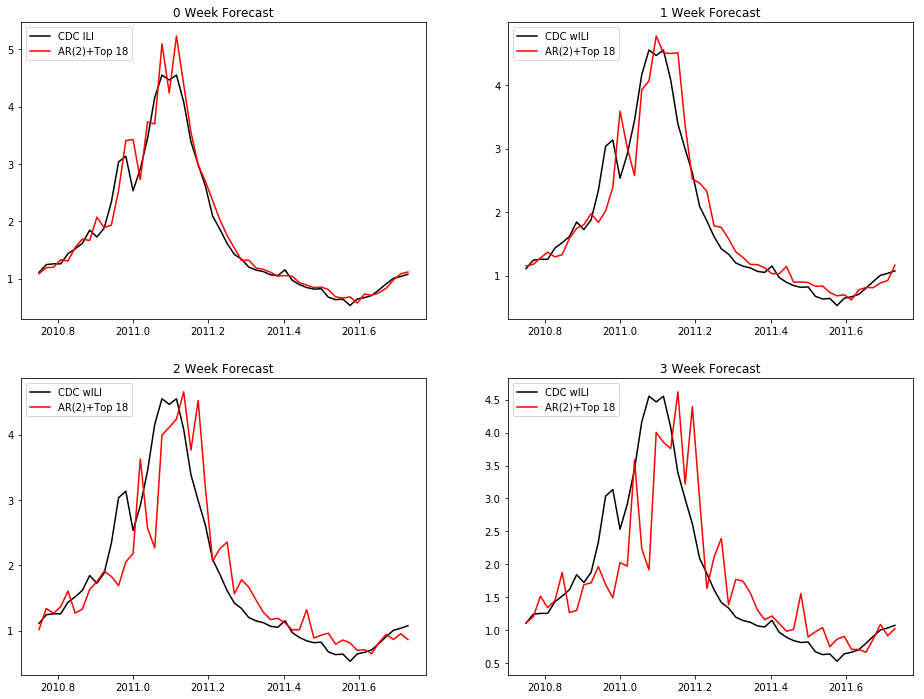

      Correlation       MAE       MSE      RMSE
0 wk     0.981930  0.153578  0.057363  0.239505
1 wk     0.952184  0.234692  0.127866  0.357583
2 wk     0.892154  0.340135  0.269783  0.519407
3 wk     0.783241  0.458495  0.513779  0.716783


In [58]:
plotGraphs(label = "AR(2)+Top 18", results_gp = results_word)

In [49]:
y_train_curr = y_train.reshape(y_train.size)
y_train_curr = y_train_curr[0:-3]
y_test_curr = y_test.reshape(y_test.size)
y_test_curr = np.concatenate((y_train_curr[-3:], y_test_curr))
word_1_train_curr = word_1_train.reshape(word_1_train.size)
word_1_train_curr = word_1_train_curr[0:-3]
word_1_test_curr = word_1_test.reshape(word_1_test.size)
word_1_test_curr = np.concatenate((word_1_train_curr[-3:], word_1_test_curr))
results_1_train = np.array([0,0,0,0]).reshape(1,4)
results_1_test = results_1

word_2_train_curr = word_2_train.reshape(word_2_train.size)
word_2_train_curr = word_2_train_curr[0:-3]
word_2_test_curr = word_2_test.reshape(word_2_test.size)
word_2_test_curr = np.concatenate((word_2_train_curr[-3:], word_2_test_curr))
results_2_train = np.array([0,0,0,0]).reshape(1,4)
results_2_test = results_2

word_3_train_curr = word_3_train.reshape(word_3_train.size)
word_3_train_curr = word_3_train_curr[0:-3]
word_3_test_curr = word_3_test.reshape(word_3_test.size)
word_3_test_curr = np.concatenate((word_3_train_curr[-3:], word_3_test_curr))
results_3_train = np.array([0,0,0,0]).reshape(1,4)
results_3_test = results_3

word_4_train_curr = word_4_train.reshape(word_4_train.size)
word_4_train_curr = word_4_train_curr[0:-3]
word_4_test_curr = word_4_test.reshape(word_4_test.size)
word_4_test_curr = np.concatenate((word_4_train_curr[-3:], word_4_test_curr))
results_4_train = np.array([0,0,0,0]).reshape(1,4)
results_4_test = results_4

word_5_train_curr = word_5_train.reshape(word_5_train.size)
word_5_train_curr = word_5_train_curr[0:-3]
word_5_test_curr = word_5_test.reshape(word_5_test.size)
word_5_test_curr = np.concatenate((word_5_train_curr[-3:], word_5_test_curr))
results_5_train = np.array([0,0,0,0]).reshape(1,4)
results_5_test = results_5

word_6_train_curr = word_6_train.reshape(word_6_train.size)
word_6_train_curr = word_6_train_curr[0:-3]
word_6_test_curr = word_6_test.reshape(word_6_test.size)
word_6_test_curr = np.concatenate((word_6_train_curr[-3:], word_6_test_curr))
results_6_train = np.array([0,0,0,0]).reshape(1,4)
results_6_test = results_6

word_7_train_curr = word_7_train.reshape(word_7_train.size)
word_7_train_curr = word_7_train_curr[0:-3]
word_7_test_curr = word_7_test.reshape(word_7_test.size)
word_7_test_curr = np.concatenate((word_7_train_curr[-3:], word_7_test_curr))
results_7_train = np.array([0,0,0,0]).reshape(1,4)
results_7_test = results_7

word_8_train_curr = word_8_train.reshape(word_8_train.size)
word_8_train_curr = word_8_train_curr[0:-3]
word_8_test_curr = word_8_test.reshape(word_8_test.size)
word_8_test_curr = np.concatenate((word_8_train_curr[-3:], word_8_test_curr))
results_8_train = np.array([0,0,0,0]).reshape(1,4)
results_8_test = results_8

word_9_train_curr = word_9_train.reshape(word_9_train.size)
word_9_train_curr = word_9_train_curr[0:-3]
word_9_test_curr = word_9_test.reshape(word_9_test.size)
word_9_test_curr = np.concatenate((word_9_train_curr[-3:], word_9_test_curr))
results_9_train = np.array([0,0,0,0]).reshape(1,4)
results_9_test = results_9

word_10_train_curr = word_10_train.reshape(word_10_train.size)
word_10_train_curr = word_10_train_curr[0:-3]
word_10_test_curr = word_10_test.reshape(word_10_test.size)
word_10_test_curr = np.concatenate((word_10_train_curr[-3:], word_10_test_curr))
results_10_train = np.array([0,0,0,0]).reshape(1,4)
results_10_test = results_10

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:]), 
          'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:]),
          'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:]),
          'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:]),
          'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:]),
          'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:]),
          'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:]),
          'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:]),
          'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:]),
          'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:])}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
results_word= np.array(forecast).reshape(1,forecast.size)
for i in range(1, y_test.size) :
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
    word_1_train_curr = word_1_train_curr[-200:]
    word_1_test_curr = word_1_test_curr[1:]
    results_1_train = np.vstack((results_1_train, results_1_test[0,]))
    results_1_test = results_1_test[1:,]
    
    word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
    word_2_train_curr = word_2_train_curr[-200:]
    word_2_test_curr = word_2_test_curr[1:]
    results_2_train = np.vstack((results_2_train, results_2_test[0,]))
    results_2_test = results_2_test[1:,]
    
    word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
    word_3_train_curr = word_3_train_curr[-200:]
    word_3_test_curr = word_3_test_curr[1:]
    results_3_train = np.vstack((results_3_train, results_3_test[0,]))
    results_3_test = results_3_test[1:,]
    
    word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
    word_4_train_curr = word_4_train_curr[-200:]
    word_4_test_curr = word_4_test_curr[1:]
    results_4_train = np.vstack((results_4_train, results_4_test[0,]))
    results_4_test = results_4_test[1:,]
    
    word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
    word_5_train_curr = word_5_train_curr[-200:]
    word_5_test_curr = word_5_test_curr[1:]
    results_5_train = np.vstack((results_5_train, results_5_test[0,]))
    results_5_test = results_5_test[1:,]
    
    word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
    word_6_train_curr = word_6_train_curr[-200:]
    word_6_test_curr = word_6_test_curr[1:]
    results_6_train = np.vstack((results_6_train, results_6_test[0,]))
    results_6_test = results_6_test[1:,]
    
    word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
    word_7_train_curr = word_7_train_curr[-200:]
    word_7_test_curr = word_7_test_curr[1:]
    results_7_train = np.vstack((results_7_train, results_7_test[0,]))
    results_7_test = results_7_test[1:,]
    
    word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
    word_8_train_curr = word_8_train_curr[-200:]
    word_8_test_curr = word_8_test_curr[1:]
    results_8_train = np.vstack((results_8_train, results_8_test[0,]))
    results_8_test = results_8_test[1:,]
    
    word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
    word_9_train_curr = word_9_train_curr[-200:]
    word_9_test_curr = word_9_test_curr[1:]
    results_9_train = np.vstack((results_9_train, results_9_test[0,]))
    results_9_test = results_9_test[1:,]
    
    word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
    word_10_train_curr = word_10_train_curr[-200:]
    word_10_test_curr = word_10_test_curr[1:]
    results_10_train = np.vstack((results_10_train, results_10_test[0,]))
    results_10_test = results_10_test[1:,]
    
    d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
          'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
            'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr}
    df_train = pd.DataFrame(data=d_train)
    d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:]), 
          'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:]),
          'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:]),
          'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:]),
          'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:]),
          'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:]),
          'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:]),
          'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:]),
          'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:]),
          'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:])}
    df_test = pd.DataFrame.from_dict(data=d_test)
    model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10', ar=2, ma=0, family=pf.Normal())
    model.fit(method="MLE")
    forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
    results_word = np.vstack((results_word, np.array(forecast).reshape(1, forecast.size)))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]

word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
word_6_train_curr = word_6_train_curr[-200:]
word_6_test_curr = word_6_test_curr[1:]
results_6_train = np.vstack((results_6_train, results_6_test[0,]))
results_6_test = results_6_test[1:,]

word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
word_7_train_curr = word_7_train_curr[-200:]
word_7_test_curr = word_7_test_curr[1:]
results_7_train = np.vstack((results_7_train, results_7_test[0,]))
results_7_test = results_7_test[1:,]

word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
word_8_train_curr = word_8_train_curr[-200:]
word_8_test_curr = word_8_test_curr[1:]
results_8_train = np.vstack((results_8_train, results_8_test[0,]))
results_8_test = results_8_test[1:,]

word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
word_9_train_curr = word_9_train_curr[-200:]
word_9_test_curr = word_9_test_curr[1:]
results_9_train = np.vstack((results_9_train, results_9_test[0,]))
results_9_test = results_9_test[1:,]

word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
word_10_train_curr = word_10_train_curr[-200:]
word_10_test_curr = word_10_test_curr[1:]
results_10_train = np.vstack((results_10_train, results_10_test[0,]))
results_10_test = results_10_test[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:3]),
         'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:3]),
         'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:3]),
         'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:3]),
         'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:3]),
         'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:3]),
         'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:3]),
         'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:3]),
         'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:3]),
         'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:3])}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 3, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), 0)))


y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
word_6_train_curr = word_6_train_curr[-200:]
word_6_test_curr = word_6_test_curr[1:]
results_6_train = np.vstack((results_6_train, results_6_test[0,]))
results_6_test = results_6_test[1:,]

word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
word_7_train_curr = word_7_train_curr[-200:]
word_7_test_curr = word_7_test_curr[1:]
results_7_train = np.vstack((results_7_train, results_7_test[0,]))
results_7_test = results_7_test[1:,]

word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
word_8_train_curr = word_8_train_curr[-200:]
word_8_test_curr = word_8_test_curr[1:]
results_8_train = np.vstack((results_8_train, results_8_test[0,]))
results_8_test = results_8_test[1:,]

word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
word_9_train_curr = word_9_train_curr[-200:]
word_9_test_curr = word_9_test_curr[1:]
results_9_train = np.vstack((results_9_train, results_9_test[0,]))
results_9_test = results_9_test[1:,]

word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
word_10_train_curr = word_10_train_curr[-200:]
word_10_test_curr = word_10_test_curr[1:]
results_10_train = np.vstack((results_10_train, results_10_test[0,]))
results_10_test = results_10_test[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:2]),
         'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:2]),
         'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:2]),
         'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:2]),
         'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:2]),
         'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:2]),
         'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:2]),
         'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:2]),
         'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:2]),
         'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:2])}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 2, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0]))))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
word_6_train_curr = word_6_train_curr[-200:]
word_6_test_curr = word_6_test_curr[1:]
results_6_train = np.vstack((results_6_train, results_6_test[0,]))
results_6_test = results_6_test[1:,]

word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
word_7_train_curr = word_7_train_curr[-200:]
word_7_test_curr = word_7_test_curr[1:]
results_7_train = np.vstack((results_7_train, results_7_test[0,]))
results_7_test = results_7_test[1:,]

word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
word_8_train_curr = word_8_train_curr[-200:]
word_8_test_curr = word_8_test_curr[1:]
results_8_train = np.vstack((results_8_train, results_8_test[0,]))
results_8_test = results_8_test[1:,]

word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
word_9_train_curr = word_9_train_curr[-200:]
word_9_test_curr = word_9_test_curr[1:]
results_9_train = np.vstack((results_9_train, results_9_test[0,]))
results_9_test = results_9_test[1:,]

word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
word_10_train_curr = word_10_train_curr[-200:]
word_10_test_curr = word_10_test_curr[1:]
results_10_train = np.vstack((results_10_train, results_10_test[0,]))
results_10_test = results_10_test[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:1], 'word_1':word_1_test_curr[0:1], 'word_2':word_2_test_curr[0:1],
         'word_3':word_3_test_curr[0:1], 'word_4':word_4_test_curr[0:1], 'word_5':word_5_test_curr[0:1],
          'word_6':word_6_test_curr[0:1],
          'word_7':word_7_test_curr[0:1],
          'word_8':word_8_test_curr[0:1],
          'word_9':word_9_test_curr[0:1],
          'word_10':word_10_test_curr[0:1]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 1, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0,0]))))

In [50]:
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_top10.csv", X = results_word, delimiter = ",")

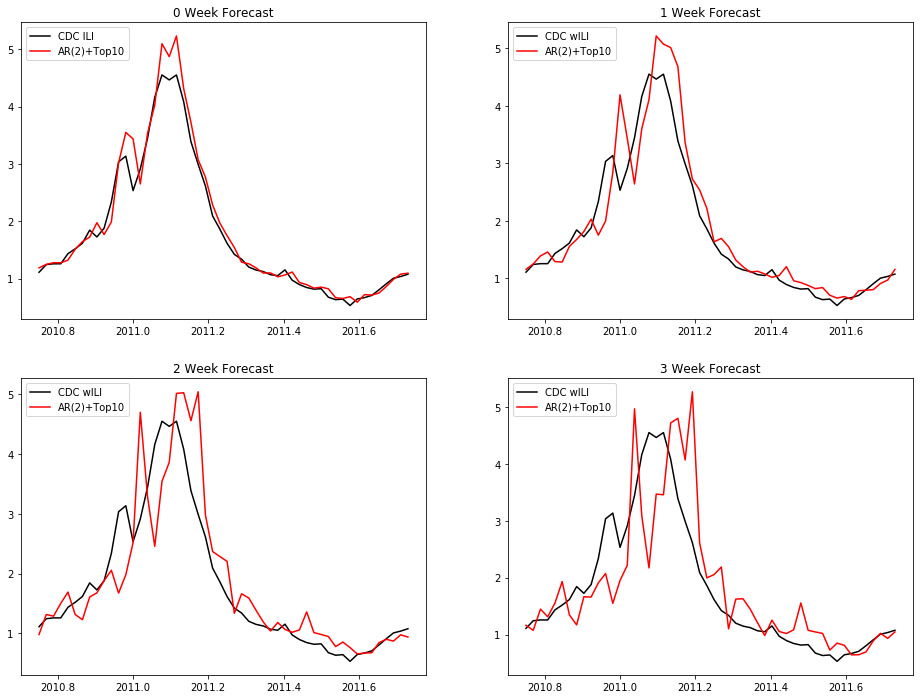

      Correlation       MAE       MSE      RMSE
0 wk     0.988978  0.137147  0.050345  0.224376
1 wk     0.940798  0.280257  0.195169  0.441779
2 wk     0.870577  0.378761  0.376308  0.613439
3 wk     0.783847  0.501905  0.577499  0.759934


In [51]:
plotGraphs(label = "AR(2)+Top10", results_gp = results_word)

In [46]:
y_train_curr = y_train.reshape(y_train.size)
y_train_curr = y_train_curr[0:-3]
y_test_curr = y_test.reshape(y_test.size)
y_test_curr = np.concatenate((y_train_curr[-3:], y_test_curr))
word_1_train_curr = word_1_train.reshape(word_1_train.size)
word_1_train_curr = word_1_train_curr[0:-3]
word_1_test_curr = word_1_test.reshape(word_1_test.size)
word_1_test_curr = np.concatenate((word_1_train_curr[-3:], word_1_test_curr))
results_1_train = np.array([0,0,0,0]).reshape(1,4)
results_1_test = results_1

word_2_train_curr = word_2_train.reshape(word_2_train.size)
word_2_train_curr = word_2_train_curr[0:-3]
word_2_test_curr = word_2_test.reshape(word_2_test.size)
word_2_test_curr = np.concatenate((word_2_train_curr[-3:], word_2_test_curr))
results_2_train = np.array([0,0,0,0]).reshape(1,4)
results_2_test = results_2

word_3_train_curr = word_3_train.reshape(word_3_train.size)
word_3_train_curr = word_3_train_curr[0:-3]
word_3_test_curr = word_3_test.reshape(word_3_test.size)
word_3_test_curr = np.concatenate((word_3_train_curr[-3:], word_3_test_curr))
results_3_train = np.array([0,0,0,0]).reshape(1,4)
results_3_test = results_3

word_4_train_curr = word_4_train.reshape(word_4_train.size)
word_4_train_curr = word_4_train_curr[0:-3]
word_4_test_curr = word_4_test.reshape(word_4_test.size)
word_4_test_curr = np.concatenate((word_4_train_curr[-3:], word_4_test_curr))
results_4_train = np.array([0,0,0,0]).reshape(1,4)
results_4_test = results_4

word_5_train_curr = word_5_train.reshape(word_5_train.size)
word_5_train_curr = word_5_train_curr[0:-3]
word_5_test_curr = word_5_test.reshape(word_5_test.size)
word_5_test_curr = np.concatenate((word_5_train_curr[-3:], word_5_test_curr))
results_5_train = np.array([0,0,0,0]).reshape(1,4)
results_5_test = results_5

word_6_train_curr = word_6_train.reshape(word_6_train.size)
word_6_train_curr = word_6_train_curr[0:-3]
word_6_test_curr = word_6_test.reshape(word_6_test.size)
word_6_test_curr = np.concatenate((word_6_train_curr[-3:], word_6_test_curr))
results_6_train = np.array([0,0,0,0]).reshape(1,4)
results_6_test = results_6

word_7_train_curr = word_7_train.reshape(word_7_train.size)
word_7_train_curr = word_7_train_curr[0:-3]
word_7_test_curr = word_7_test.reshape(word_7_test.size)
word_7_test_curr = np.concatenate((word_7_train_curr[-3:], word_7_test_curr))
results_7_train = np.array([0,0,0,0]).reshape(1,4)
results_7_test = results_7

word_8_train_curr = word_8_train.reshape(word_8_train.size)
word_8_train_curr = word_8_train_curr[0:-3]
word_8_test_curr = word_8_test.reshape(word_8_test.size)
word_8_test_curr = np.concatenate((word_8_train_curr[-3:], word_8_test_curr))
results_8_train = np.array([0,0,0,0]).reshape(1,4)
results_8_test = results_8

word_9_train_curr = word_9_train.reshape(word_9_train.size)
word_9_train_curr = word_9_train_curr[0:-3]
word_9_test_curr = word_9_test.reshape(word_9_test.size)
word_9_test_curr = np.concatenate((word_9_train_curr[-3:], word_9_test_curr))
results_9_train = np.array([0,0,0,0]).reshape(1,4)
results_9_test = results_9

word_10_train_curr = word_10_train.reshape(word_10_train.size)
word_10_train_curr = word_10_train_curr[0:-3]
word_10_test_curr = word_10_test.reshape(word_10_test.size)
word_10_test_curr = np.concatenate((word_10_train_curr[-3:], word_10_test_curr))
results_10_train = np.array([0,0,0,0]).reshape(1,4)
results_10_test = results_10

gp_train_curr = y_train_curr
results_train_gp = np.array([0,0,0,0]).reshape(1,4)
results_test_gp = results_gp 

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr,
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:]), 
          'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:]),
          'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:]),
          'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:]),
          'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:]),
          'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:]),
          'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:]),
          'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:]),
          'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:]),
          'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:]),
          'gp':results_test_gp[0,]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
results_word= np.array(forecast).reshape(1,forecast.size)
for i in range(1, y_test.size) :
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
    word_1_train_curr = word_1_train_curr[-200:]
    word_1_test_curr = word_1_test_curr[1:]
    results_1_train = np.vstack((results_1_train, results_1_test[0,]))
    results_1_test = results_1_test[1:,]
    
    word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
    word_2_train_curr = word_2_train_curr[-200:]
    word_2_test_curr = word_2_test_curr[1:]
    results_2_train = np.vstack((results_2_train, results_2_test[0,]))
    results_2_test = results_2_test[1:,]
    
    word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
    word_3_train_curr = word_3_train_curr[-200:]
    word_3_test_curr = word_3_test_curr[1:]
    results_3_train = np.vstack((results_3_train, results_3_test[0,]))
    results_3_test = results_3_test[1:,]
    
    word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
    word_4_train_curr = word_4_train_curr[-200:]
    word_4_test_curr = word_4_test_curr[1:]
    results_4_train = np.vstack((results_4_train, results_4_test[0,]))
    results_4_test = results_4_test[1:,]
    
    word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
    word_5_train_curr = word_5_train_curr[-200:]
    word_5_test_curr = word_5_test_curr[1:]
    results_5_train = np.vstack((results_5_train, results_5_test[0,]))
    results_5_test = results_5_test[1:,]
    
    word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
    word_6_train_curr = word_6_train_curr[-200:]
    word_6_test_curr = word_6_test_curr[1:]
    results_6_train = np.vstack((results_6_train, results_6_test[0,]))
    results_6_test = results_6_test[1:,]
    
    word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
    word_7_train_curr = word_7_train_curr[-200:]
    word_7_test_curr = word_7_test_curr[1:]
    results_7_train = np.vstack((results_7_train, results_7_test[0,]))
    results_7_test = results_7_test[1:,]
    
    word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
    word_8_train_curr = word_8_train_curr[-200:]
    word_8_test_curr = word_8_test_curr[1:]
    results_8_train = np.vstack((results_8_train, results_8_test[0,]))
    results_8_test = results_8_test[1:,]
    
    word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
    word_9_train_curr = word_9_train_curr[-200:]
    word_9_test_curr = word_9_test_curr[1:]
    results_9_train = np.vstack((results_9_train, results_9_test[0,]))
    results_9_test = results_9_test[1:,]
    
    word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
    word_10_train_curr = word_10_train_curr[-200:]
    word_10_test_curr = word_10_test_curr[1:]
    results_10_train = np.vstack((results_10_train, results_10_test[0,]))
    results_10_test = results_10_test[1:,]
    
    gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
    gp_train_curr = gp_train_curr[-200:]
    results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
    results_test_gp = results_test_gp[1:,]
    
    d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
            'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'gp':gp_train_curr}
    df_train = pd.DataFrame(data=d_train)
    d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:]), 
          'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:]),
          'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:]),
          'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:]),
          'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:]),
          'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:]),
          'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:]),
          'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:]),
          'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:]),
          'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:]),
          'gp':results_test_gp[0,]}
    df_test = pd.DataFrame.from_dict(data=d_test)
    model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+gp', ar=2, ma=0, family=pf.Normal())
    model.fit(method="MLE")
    forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
    results_word = np.vstack((results_word, np.array(forecast).reshape(1, forecast.size)))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]

word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
word_6_train_curr = word_6_train_curr[-200:]
word_6_test_curr = word_6_test_curr[1:]
results_6_train = np.vstack((results_6_train, results_6_test[0,]))
results_6_test = results_6_test[1:,]

word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
word_7_train_curr = word_7_train_curr[-200:]
word_7_test_curr = word_7_test_curr[1:]
results_7_train = np.vstack((results_7_train, results_7_test[0,]))
results_7_test = results_7_test[1:,]

word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
word_8_train_curr = word_8_train_curr[-200:]
word_8_test_curr = word_8_test_curr[1:]
results_8_train = np.vstack((results_8_train, results_8_test[0,]))
results_8_test = results_8_test[1:,]

word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
word_9_train_curr = word_9_train_curr[-200:]
word_9_test_curr = word_9_test_curr[1:]
results_9_train = np.vstack((results_9_train, results_9_test[0,]))
results_9_test = results_9_test[1:,]

word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
word_10_train_curr = word_10_train_curr[-200:]
word_10_test_curr = word_10_test_curr[1:]
results_10_train = np.vstack((results_10_train, results_10_test[0,]))
results_10_test = results_10_test[1:,]

gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
gp_train_curr = gp_train_curr[-200:]
results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
results_test_gp = results_test_gp[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:3]),
         'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:3]),
         'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:3]),
         'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:3]),
         'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:3]),
         'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:3]),
         'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:3]),
         'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:3]),
         'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:3]),
         'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:3]),
         'gp':results_test_gp[0,:-1]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 3, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), 0)))


y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
word_6_train_curr = word_6_train_curr[-200:]
word_6_test_curr = word_6_test_curr[1:]
results_6_train = np.vstack((results_6_train, results_6_test[0,]))
results_6_test = results_6_test[1:,]

word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
word_7_train_curr = word_7_train_curr[-200:]
word_7_test_curr = word_7_test_curr[1:]
results_7_train = np.vstack((results_7_train, results_7_test[0,]))
results_7_test = results_7_test[1:,]

word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
word_8_train_curr = word_8_train_curr[-200:]
word_8_test_curr = word_8_test_curr[1:]
results_8_train = np.vstack((results_8_train, results_8_test[0,]))
results_8_test = results_8_test[1:,]

word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
word_9_train_curr = word_9_train_curr[-200:]
word_9_test_curr = word_9_test_curr[1:]
results_9_train = np.vstack((results_9_train, results_9_test[0,]))
results_9_test = results_9_test[1:,]

word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
word_10_train_curr = word_10_train_curr[-200:]
word_10_test_curr = word_10_test_curr[1:]
results_10_train = np.vstack((results_10_train, results_10_test[0,]))
results_10_test = results_10_test[1:,]

gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
gp_train_curr = gp_train_curr[-200:]
results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
results_test_gp = results_test_gp[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:2]),
         'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:2]),
         'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:2]),
         'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:2]),
         'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:2]),
         'word_6':np.append(word_6_test_curr[0:1], results_6_test[0,1:2]),
         'word_7':np.append(word_7_test_curr[0:1], results_7_test[0,1:2]),
         'word_8':np.append(word_8_test_curr[0:1], results_8_test[0,1:2]),
         'word_9':np.append(word_9_test_curr[0:1], results_9_test[0,1:2]),
         'word_10':np.append(word_10_test_curr[0:1], results_10_test[0,1:2]),
         'gp':results_test_gp[0,:-2]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 2, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0]))))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

word_6_train_curr = np.append(word_6_train_curr, word_6_test_curr[0])
word_6_train_curr = word_6_train_curr[-200:]
word_6_test_curr = word_6_test_curr[1:]
results_6_train = np.vstack((results_6_train, results_6_test[0,]))
results_6_test = results_6_test[1:,]

word_7_train_curr = np.append(word_7_train_curr, word_7_test_curr[0])
word_7_train_curr = word_7_train_curr[-200:]
word_7_test_curr = word_7_test_curr[1:]
results_7_train = np.vstack((results_7_train, results_7_test[0,]))
results_7_test = results_7_test[1:,]

word_8_train_curr = np.append(word_8_train_curr, word_8_test_curr[0])
word_8_train_curr = word_8_train_curr[-200:]
word_8_test_curr = word_8_test_curr[1:]
results_8_train = np.vstack((results_8_train, results_8_test[0,]))
results_8_test = results_8_test[1:,]

word_9_train_curr = np.append(word_9_train_curr, word_9_test_curr[0])
word_9_train_curr = word_9_train_curr[-200:]
word_9_test_curr = word_9_test_curr[1:]
results_9_train = np.vstack((results_9_train, results_9_test[0,]))
results_9_test = results_9_test[1:,]

word_10_train_curr = np.append(word_10_train_curr, word_10_test_curr[0])
word_10_train_curr = word_10_train_curr[-200:]
word_10_test_curr = word_10_test_curr[1:]
results_10_train = np.vstack((results_10_train, results_10_test[0,]))
results_10_test = results_10_test[1:,]

gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
gp_train_curr = gp_train_curr[-200:]
results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
results_test_gp = results_test_gp[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_6':word_6_train_curr, 'word_7':word_7_train_curr,
           'word_8':word_8_train_curr, 'word_9':word_9_train_curr, 'word_10':word_10_train_curr,
           'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:1], 'word_1':word_1_test_curr[0:1], 'word_2':word_2_test_curr[0:1],
         'word_3':word_3_test_curr[0:1], 'word_4':word_4_test_curr[0:1], 'word_5':word_5_test_curr[0:1],
          'word_6':word_6_test_curr[0:1],
          'word_7':word_7_test_curr[0:1],
          'word_8':word_8_test_curr[0:1],
          'word_9':word_9_test_curr[0:1],
          'word_10':word_10_test_curr[0:1],
          'gp':results_test_gp[0,:-3]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+word_6+word_7+word_8+word_9+word_10+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 1, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0,0]))))

In [47]:
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_top10_gp.csv", X = results_word, delimiter = ",")

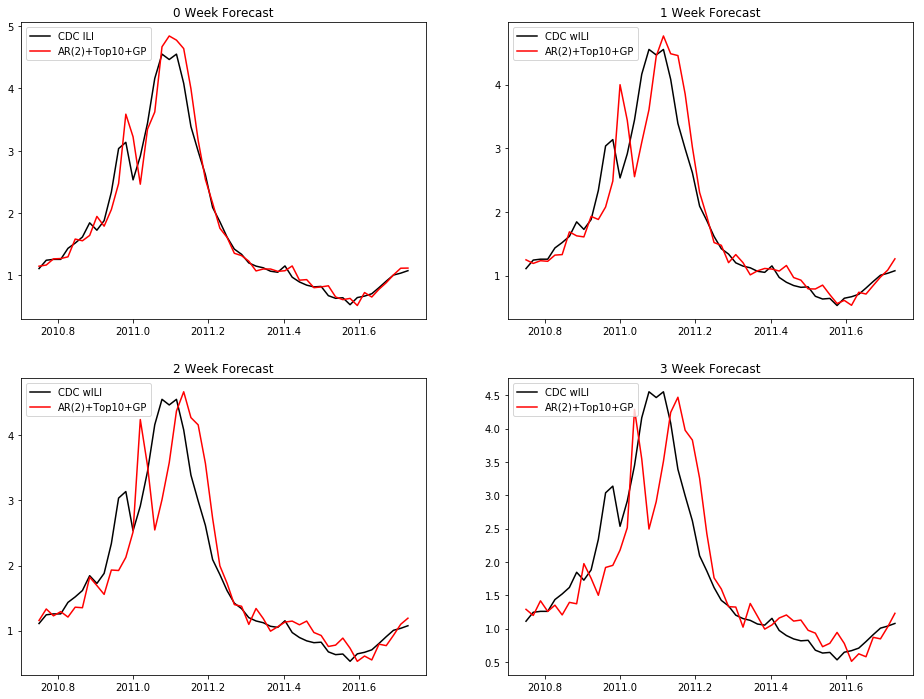

      Correlation       MAE       MSE      RMSE
0 wk     0.982153  0.147679  0.053447  0.231187
1 wk     0.931073  0.261337  0.183787  0.428703
2 wk     0.891039  0.321881  0.279832  0.528991
3 wk     0.850131  0.408494  0.370002  0.608278


In [48]:
plotGraphs(label = "AR(2)+Top10+GP", results_gp = results_word)

In [40]:
y_train_curr = y_train.reshape(y_train.size)
y_train_curr = y_train_curr[0:-3]
y_test_curr = y_test.reshape(y_test.size)
y_test_curr = np.concatenate((y_train_curr[-3:], y_test_curr))
word_1_train_curr = word_1_train.reshape(word_1_train.size)
word_1_train_curr = word_1_train_curr[0:-3]
word_1_test_curr = word_1_test.reshape(word_1_test.size)
word_1_test_curr = np.concatenate((word_1_train_curr[-3:], word_1_test_curr))
results_1_train = np.array([0,0,0,0]).reshape(1,4)
results_1_test = results_1

word_2_train_curr = word_2_train.reshape(word_2_train.size)
word_2_train_curr = word_2_train_curr[0:-3]
word_2_test_curr = word_2_test.reshape(word_2_test.size)
word_2_test_curr = np.concatenate((word_2_train_curr[-3:], word_2_test_curr))
results_2_train = np.array([0,0,0,0]).reshape(1,4)
results_2_test = results_2

word_3_train_curr = word_3_train.reshape(word_3_train.size)
word_3_train_curr = word_3_train_curr[0:-3]
word_3_test_curr = word_3_test.reshape(word_3_test.size)
word_3_test_curr = np.concatenate((word_3_train_curr[-3:], word_3_test_curr))
results_3_train = np.array([0,0,0,0]).reshape(1,4)
results_3_test = results_3

word_4_train_curr = word_4_train.reshape(word_4_train.size)
word_4_train_curr = word_4_train_curr[0:-3]
word_4_test_curr = word_4_test.reshape(word_4_test.size)
word_4_test_curr = np.concatenate((word_4_train_curr[-3:], word_4_test_curr))
results_4_train = np.array([0,0,0,0]).reshape(1,4)
results_4_test = results_4

word_5_train_curr = word_5_train.reshape(word_5_train.size)
word_5_train_curr = word_5_train_curr[0:-3]
word_5_test_curr = word_5_test.reshape(word_5_test.size)
word_5_test_curr = np.concatenate((word_5_train_curr[-3:], word_5_test_curr))
results_5_train = np.array([0,0,0,0]).reshape(1,4)
results_5_test = results_5

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:]), 
          'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:]),
          'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:]),
          'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:]),
          'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:])}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
results_word= np.array(forecast).reshape(1,forecast.size)
for i in range(1, y_test.size) :
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
    word_1_train_curr = word_1_train_curr[-200:]
    word_1_test_curr = word_1_test_curr[1:]
    results_1_train = np.vstack((results_1_train, results_1_test[0,]))
    results_1_test = results_1_test[1:,]
    
    word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
    word_2_train_curr = word_2_train_curr[-200:]
    word_2_test_curr = word_2_test_curr[1:]
    results_2_train = np.vstack((results_2_train, results_2_test[0,]))
    results_2_test = results_2_test[1:,]
    
    word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
    word_3_train_curr = word_3_train_curr[-200:]
    word_3_test_curr = word_3_test_curr[1:]
    results_3_train = np.vstack((results_3_train, results_3_test[0,]))
    results_3_test = results_3_test[1:,]
    
    word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
    word_4_train_curr = word_4_train_curr[-200:]
    word_4_test_curr = word_4_test_curr[1:]
    results_4_train = np.vstack((results_4_train, results_4_test[0,]))
    results_4_test = results_4_test[1:,]
    
    word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
    word_5_train_curr = word_5_train_curr[-200:]
    word_5_test_curr = word_5_test_curr[1:]
    results_5_train = np.vstack((results_5_train, results_5_test[0,]))
    results_5_test = results_5_test[1:,]
    
    d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_5':word_5_train_curr}
    df_train = pd.DataFrame(data=d_train)
    d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:]), 
          'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:]),
          'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:]),
          'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:]),
          'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:])}
    df_test = pd.DataFrame.from_dict(data=d_test)
    model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5', ar=2, ma=0, family=pf.Normal())
    model.fit(method="MLE")
    forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
    results_word = np.vstack((results_word, np.array(forecast).reshape(1, forecast.size)))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]

word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_5':word_5_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:3]),
         'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:3]),
         'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:3]),
         'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:3]),
         'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:3])}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 3, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), 0)))


y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:2]),
         'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:2]),
         'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:2]),
         'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:2]),
         'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:2])}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 2, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0]))))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_5':word_5_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:1], 'word_1':word_1_test_curr[0:1], 'word_2':word_2_test_curr[0:1],
         'word_3':word_3_test_curr[0:1], 'word_4':word_4_test_curr[0:1], 'word_5':word_5_test_curr[0:1]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 1, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0,0]))))

In [41]:
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_top5.csv", X = results_word, delimiter = ",")

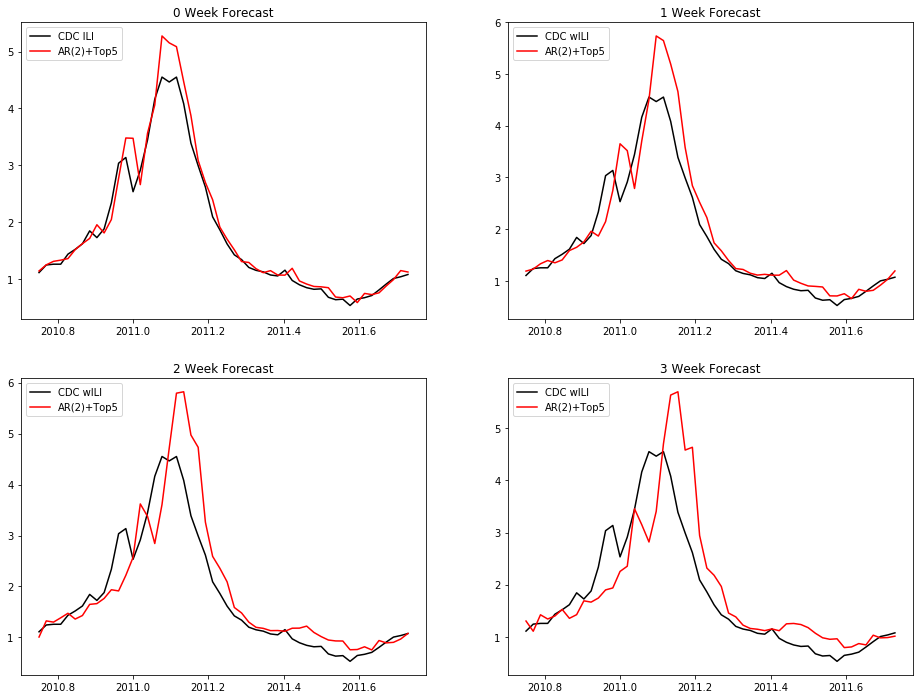

      Correlation       MAE       MSE      RMSE
0 wk     0.987035  0.155727  0.063482  0.251956
1 wk     0.952837  0.280828  0.198146  0.445136
2 wk     0.902602  0.366700  0.340426  0.583461
3 wk     0.828215  0.455083  0.505422  0.710930


In [42]:
plotGraphs(label = "AR(2)+Top5", results_gp = results_word)

In [43]:
y_train_curr = y_train.reshape(y_train.size)
y_train_curr = y_train_curr[0:-3]
y_test_curr = y_test.reshape(y_test.size)
y_test_curr = np.concatenate((y_train_curr[-3:], y_test_curr))
word_1_train_curr = word_1_train.reshape(word_1_train.size)
word_1_train_curr = word_1_train_curr[0:-3]
word_1_test_curr = word_1_test.reshape(word_1_test.size)
word_1_test_curr = np.concatenate((word_1_train_curr[-3:], word_1_test_curr))
results_1_train = np.array([0,0,0,0]).reshape(1,4)
results_1_test = results_1

word_2_train_curr = word_2_train.reshape(word_2_train.size)
word_2_train_curr = word_2_train_curr[0:-3]
word_2_test_curr = word_2_test.reshape(word_2_test.size)
word_2_test_curr = np.concatenate((word_2_train_curr[-3:], word_2_test_curr))
results_2_train = np.array([0,0,0,0]).reshape(1,4)
results_2_test = results_2

word_3_train_curr = word_3_train.reshape(word_3_train.size)
word_3_train_curr = word_3_train_curr[0:-3]
word_3_test_curr = word_3_test.reshape(word_3_test.size)
word_3_test_curr = np.concatenate((word_3_train_curr[-3:], word_3_test_curr))
results_3_train = np.array([0,0,0,0]).reshape(1,4)
results_3_test = results_3

word_4_train_curr = word_4_train.reshape(word_4_train.size)
word_4_train_curr = word_4_train_curr[0:-3]
word_4_test_curr = word_4_test.reshape(word_4_test.size)
word_4_test_curr = np.concatenate((word_4_train_curr[-3:], word_4_test_curr))
results_4_train = np.array([0,0,0,0]).reshape(1,4)
results_4_test = results_4

word_5_train_curr = word_5_train.reshape(word_5_train.size)
word_5_train_curr = word_5_train_curr[0:-3]
word_5_test_curr = word_5_test.reshape(word_5_test.size)
word_5_test_curr = np.concatenate((word_5_train_curr[-3:], word_5_test_curr))
results_5_train = np.array([0,0,0,0]).reshape(1,4)
results_5_test = results_5

gp_train_curr = y_train_curr
results_train_gp = np.array([0,0,0,0]).reshape(1,4)
results_test_gp = results_gp 

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:]), 
          'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:]),
          'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:]),
          'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:]),
          'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:]),
          'gp':results_test_gp[0,]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
results_word= np.array(forecast).reshape(1,forecast.size)
for i in range(1, y_test.size) :
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
    word_1_train_curr = word_1_train_curr[-200:]
    word_1_test_curr = word_1_test_curr[1:]
    results_1_train = np.vstack((results_1_train, results_1_test[0,]))
    results_1_test = results_1_test[1:,]
    
    word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
    word_2_train_curr = word_2_train_curr[-200:]
    word_2_test_curr = word_2_test_curr[1:]
    results_2_train = np.vstack((results_2_train, results_2_test[0,]))
    results_2_test = results_2_test[1:,]
    
    word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
    word_3_train_curr = word_3_train_curr[-200:]
    word_3_test_curr = word_3_test_curr[1:]
    results_3_train = np.vstack((results_3_train, results_3_test[0,]))
    results_3_test = results_3_test[1:,]
    
    word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
    word_4_train_curr = word_4_train_curr[-200:]
    word_4_test_curr = word_4_test_curr[1:]
    results_4_train = np.vstack((results_4_train, results_4_test[0,]))
    results_4_test = results_4_test[1:,]
    
    word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
    word_5_train_curr = word_5_train_curr[-200:]
    word_5_test_curr = word_5_test_curr[1:]
    results_5_train = np.vstack((results_5_train, results_5_test[0,]))
    results_5_test = results_5_test[1:,]
    
    gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
    gp_train_curr = gp_train_curr[-200:]
    results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
    results_test_gp = results_test_gp[1:,]
    
    d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'gp':gp_train_curr}
    df_train = pd.DataFrame(data=d_train)
    d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:]), 
          'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:]),
          'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:]),
          'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:]),
          'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:]),
          'gp':results_test_gp[0,]}
    df_test = pd.DataFrame.from_dict(data=d_test)
    model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+gp', ar=2, ma=0, family=pf.Normal())
    model.fit(method="MLE")
    forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
    results_word = np.vstack((results_word, np.array(forecast).reshape(1, forecast.size)))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]

word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
gp_train_curr = gp_train_curr[-200:]
results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
results_test_gp = results_test_gp[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr, 
           'word_5':word_5_train_curr,
           'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:3]),
         'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:3]),
         'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:3]),
         'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:3]),
         'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:3]),
         'gp':results_test_gp[0,:-1]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 3, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), 0)))


y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
gp_train_curr = gp_train_curr[-200:]
results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
results_test_gp = results_test_gp[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr,
           'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'word_1':np.append(word_1_test_curr[0:1], results_1_test[0,1:2]),
         'word_2':np.append(word_2_test_curr[0:1], results_2_test[0,1:2]),
         'word_3':np.append(word_3_test_curr[0:1], results_3_test[0,1:2]),
         'word_4':np.append(word_4_test_curr[0:1], results_4_test[0,1:2]),
         'word_5':np.append(word_5_test_curr[0:1], results_5_test[0,1:2]),
         'gp':results_test_gp[0,:-2]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 2, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0]))))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
word_1_train_curr = np.append(word_1_train_curr, word_1_test_curr[0])
word_1_train_curr = word_1_train_curr[-200:]
word_1_test_curr = word_1_test_curr[1:]
results_1_train = np.vstack((results_1_train, results_1_test[0,]))
results_1_test = results_1_test[1:,]

word_2_train_curr = np.append(word_2_train_curr, word_2_test_curr[0])
word_2_train_curr = word_2_train_curr[-200:]
word_2_test_curr = word_2_test_curr[1:]
results_2_train = np.vstack((results_2_train, results_2_test[0,]))
results_2_test = results_2_test[1:,]

word_3_train_curr = np.append(word_3_train_curr, word_3_test_curr[0])
word_3_train_curr = word_3_train_curr[-200:]
word_3_test_curr = word_3_test_curr[1:]
results_3_train = np.vstack((results_3_train, results_3_test[0,]))
results_3_test = results_3_test[1:,]

word_4_train_curr = np.append(word_4_train_curr, word_4_test_curr[0])
word_4_train_curr = word_4_train_curr[-200:]
word_4_test_curr = word_4_test_curr[1:]
results_4_train = np.vstack((results_4_train, results_4_test[0,]))
results_4_test = results_4_test[1:,]

word_5_train_curr = np.append(word_5_train_curr, word_5_test_curr[0])
word_5_train_curr = word_5_train_curr[-200:]
word_5_test_curr = word_5_test_curr[1:]
results_5_train = np.vstack((results_5_train, results_5_test[0,]))
results_5_test = results_5_test[1:,]

gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
gp_train_curr = gp_train_curr[-200:]
results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
results_test_gp = results_test_gp[1:,]

d_train = {'y':y_train_curr, 'word_1':word_1_train_curr, 'word_2':word_2_train_curr, 
           'word_3':word_3_train_curr, 'word_4':word_4_train_curr, 'word_5':word_5_train_curr,
           'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:1], 'word_1':word_1_test_curr[0:1], 'word_2':word_2_test_curr[0:1],
         'word_3':word_3_test_curr[0:1], 'word_4':word_4_test_curr[0:1], 'word_5':word_5_test_curr[0:1],
          'gp':results_test_gp[0,:-3]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~word_1+word_2+word_3+word_4+word_5+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 1, oos_data = df_test, intervals=False)
results_word = np.vstack((results_word, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0,0]))))

In [45]:
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_top5_gp.csv", X = results_word, delimiter = ",")

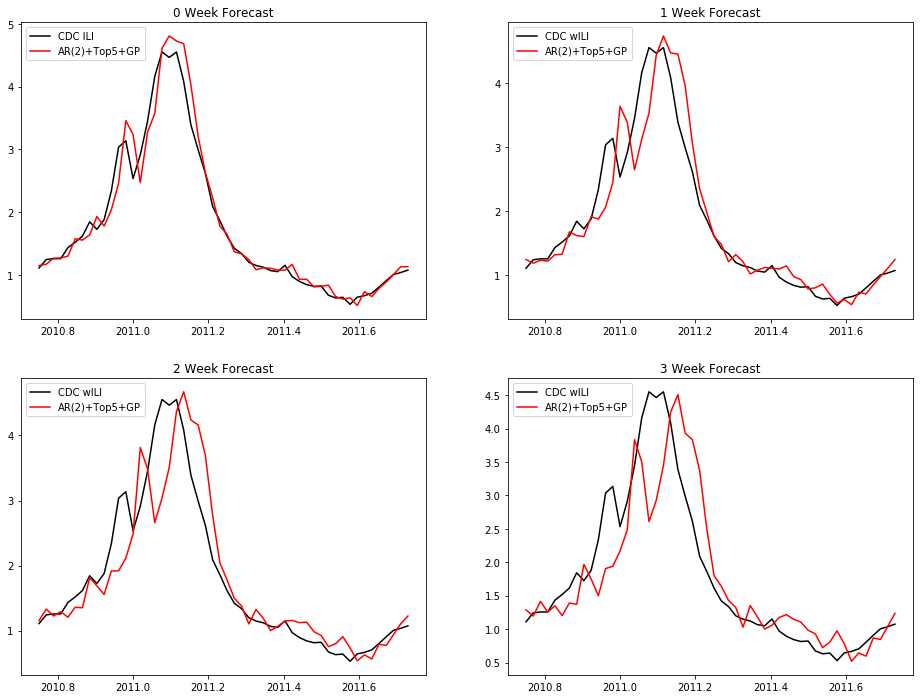

      Correlation       MAE       MSE      RMSE
0 wk     0.981029  0.148361  0.054994  0.234509
1 wk     0.935458  0.256483  0.169464  0.411660
2 wk     0.896408  0.319578  0.262695  0.512537
3 wk     0.851798  0.407601  0.362909  0.602419


In [44]:
plotGraphs(label = "AR(2)+Top5+GP", results_gp = results_word)